# STIMA DEL TASSO DI MUTAZIONE
In questo notebook sono contenuti i grafici utlizzatinel paragrafo dedicato alla stima del tasso di mutazione nel
capitolo dei risultati

In [1]:
import scipy.stats as stats #modulo di statistica
import numpy as np
import matplotlib.pyplot as plt
from numpy import random
import math
from scipy.special import factorial
from scipy.stats import poisson
import seaborn as sns

plt.rcParams.update({'font.size': 35})


## Tassi di mutazione $\mu_{standard}$,  $\mu_{simulazione}$ e  $\mu_{dati}$
Il grafico sottostante rappresenta il rate di mutazione ottenuto con lo stimatore standard, dai dati e
dalla simulazione. Il grafico a sinistra ha sulle ordinate il rate di mutazione ottenuto con lo stimatore
standard per ogni linea cellulare e sulle ascisse ha il rate di mutazione di ogni cellula sequenziata stimato
dalla simulazione di coalescenze e mutazioni. Il grafico a destra ha sulle ordinate il rate di mutazione di
ogni cellula ottenuto dalla misura delle mutazioni e dalla simulazione delle coalescenze e sulle ascisse ha
rate di mutazione per ogni cellula stimato dalla simulazione, Il grafico contiene i valori medi dei rate di
mutazione µsimulazione e µdati ottenuti con 1000 simulazioni. Le barre di errore indicano la deviazione
standard.


C:\Users\marti\AppData\Local\Temp/ipykernel_12376/884339312.py:239: RuntimeWarning: divide by zero encountered in double_scalars
  xerr=np.std(mutazioni[4]+mutazioni[3])/np.power(np.std((rami_err[1]+rami_err[3])),2)/N_b,
C:\Users\marti\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


1.3541073819181643e-09
1.6629300947140138e-09
1.7501624843673868e-09
1.3355579657275045e-09
1.3380646435911072e-09
1.2342881800379565e-09


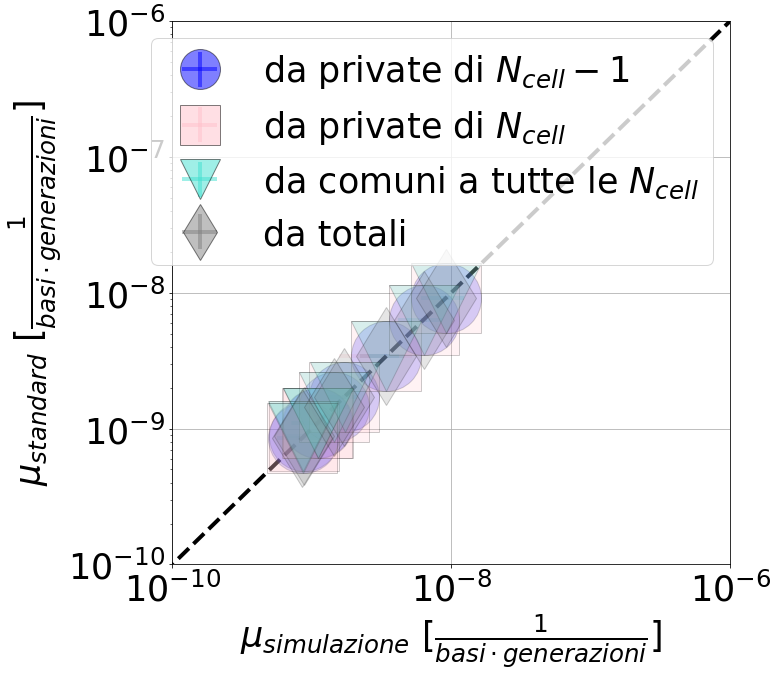

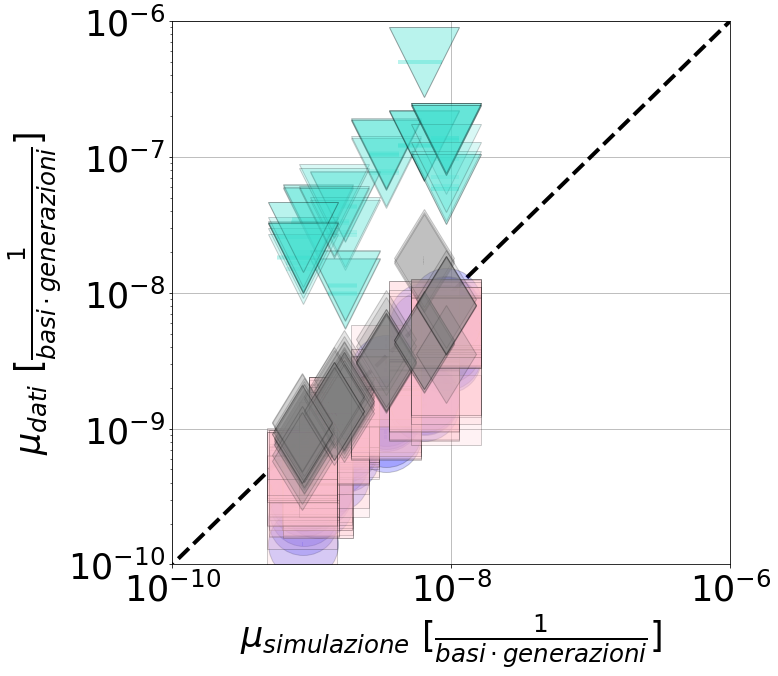

In [95]:
ngen=20
ngen0=65
nalb=6
durata=ngen0+(ngen*nalb)
N_b=5595688850
n=5
n_tr=1000
rami_err= np.loadtxt("C:../es_new/CRC0441_7.txt", unpack='true')
mutazioni= np.loadtxt("C:../es_new/mut_CRC0441_7.txt", unpack='true')
rami_err_5= np.loadtxt("C:../es_new/CRC0441.txt", unpack='true')
mutazioni_5= np.loadtxt("C:../es_new/mut_CRC0441.txt", unpack='true')
rami_err_15= np.loadtxt("C:../es_new/CRC1502.txt", unpack='true')
mutazioni_15= np.loadtxt("C:../es_new/mut_CRC1502.txt", unpack='true')
rami_err_27= np.loadtxt("C:../es_new/CRC0327.txt", unpack='true')
mutazioni_27= np.loadtxt("C:../es_new/mut_CRC0327.txt", unpack='true')
rami_err_LM= np.loadtxt("C:../es_new/CRC1599LM.txt", unpack='true')
mutazioni_LM= np.loadtxt("C:../es_new/mut_CRC1599LM.txt", unpack='true')
rami_err_PR= np.loadtxt("C:../es_new/CRC1599PR.txt", unpack='true')
mutazioni_PR= np.loadtxt("C:../es_new/mut_CRC1599PR.txt", unpack='true')
rami_err_07= np.loadtxt("C:../es_new/CRC1307.txt", unpack='true')
mutazioni_07= np.loadtxt("C:../es_new/mut_CRC1307.txt", unpack='true')
rami_err_82= np.loadtxt("C:../es_new/CRC0282.txt", unpack='true')
mutazioni_82= np.loadtxt("C:../es_new/mut_CRC0282.txt", unpack='true')
rami_err_82_7= np.loadtxt("C:../es_new/CRC0282.txt", unpack='true')
mutazioni_82_7= np.loadtxt("C:../es_new/mut_CRC0282_7.txt", unpack='true')

#print(rami_err[0,:])
mu_arr=np.array([1.10482E-9, 1.09435E-09, 1.70859E-09, 8.7505E-10, 1.44585E-09, 8.57421E-10, 3.39448E-09, 6.33828E-09, 9.17132E-09])
x=np.linspace(0.52,0.54, 5)

datia=np.array([558,432])
datid=np.array([527,549,626,522])
datie=np.array([1548,1526])
datif=np.array([2174,2048,2075])

datia_5=np.array([457,433])
datid_5=np.array([489,484,561,532])
datie_5=np.array([1155,1160])
datif_5=np.array([1716,1692,1644])

datia_15=np.array([1503,2032,1529,1893,1369,1619,1081,1283])
datid_15=np.array([2136,2618,1775,1728,2206,2119,2318,2595,2950,2801,2945,2043,2960,2976,2486,2300])
datie_15=np.array([2661,2708,1651,1738,611,616,705,689])
datif_15=np.array([4797,4436,5326,3969,3857,4333,3561,3412,3662,3191,3665,2989])

datia_27=np.array([518,570,439,759,841,1048])
datid_27=np.array([746,704,619,629,914,833,884,1123,1161,879,1101,1176])
datie_27=np.array([1052,1094,974,1055,887,1169])
datif_27=np.array([1671,1798,1723,1858,1888,2178,2063,2048,2270])

datia_LM=np.array([1332,1506,898,696])
datid_LM=np.array([796,914,1412,1704,1396,1367,1160,1391])
datie_LM=np.array([1905,1787,1273,1302])
datif_LM=np.array([2701,3317,3491,2664,2669,2462])

datia_PR=np.array([259,274,124,83])
datid_PR=np.array([241,237,383,372,355,359,124,161])
datie_PR=np.array([398,402,281,285])
datif_PR=np.array([639,770,785,446,405,640])

datia_07=np.array([993,912,1996,944,641,697])
datid_07=np.array([1024,953,1772,1762,2653,1574,1588,1561,943,910,880,903])
datie_07=np.array([1657,1647,1224,1251,1676,1709])
datif_07=np.array([2681,2600,3419,3877,2825,2812,2619,2556,2612])


datia_82=np.array([5007,4393,1262,1240,1124,1307])
datid_82=np.array([6133,6214,4802,5335,1647,1634,1386,1351,1582,1581,1554,1370])
datie_82=np.array([10661,10580,2543,2556,2617,2618])
datif_82=np.array([3929,4190,4199,4171,3988,15996,16794,15382])

datia_82_7=np.array([1657,1913,798,755,1446,1441,1203,1674,1392,1428,1418,1138,894])
datid_82_7=np.array([1418,1918,1657,621,1657,1674,1418,1392,1418,1446,1657,1441,377,605,1859,1913,621,536,1918,1823,1392,1371,1674,1409])
datie_82_7=np.array([871,371,871,854,871,843,615,387,371,456,854,875])
datif_82_7=np.array([2289,2528,2279,992,2246,2284])

#for i in range(n):
   # print(i, std_rami_err[0,i])
mut_totali=2099
N_m=5595688850
N_b_15=5316401584
N_b_27=5072406807
N_b_LM=4818048167
N_b_PR=2495801608
N_b_07=4600467279
N_b_82=2748711013
N_b_82_7=820828872.5
z=70

mu=mut_totali/(N_m*(115+(7*32)))
fig = plt.figure(figsize=(10, 10))
plt.axhline(y=0, color='red', linestyle='dotted',linewidth=4 )
#print(len(datia/(np.mean(rami_err[0])*N_b)))
    #print((medie_rami_err[3,i]-np.mean(datid))/std_rami_err[3,i])


plt.errorbar( np.mean((mutazioni[0]/(rami_err[0]*N_b))), mu_arr[0],
             xerr=np.std(mutazioni[0])/(np.power(np.std(rami_err[0]),2)*N_b),
                 yerr=np.std(np.mean(datif)/np.mean(rami_err[0]+rami_err[3]*N_b)),
             linestyle="None", color="b",elinewidth=4, marker='o',mec='black', alpha=0.2, ms=z, mew=1)
plt.errorbar( np.mean((mutazioni_5[0]/(rami_err_5[0]*N_b))), mu_arr[1],
             xerr=np.std(mutazioni_5[0])/(np.power(np.std(rami_err_5[0]),2)*N_b),
                 yerr=np.std(np.mean(datif_5)/np.mean(rami_err_5[0]+rami_err_5[3]*N_b)),
             linestyle="None", color="b",elinewidth=4, marker='o',mec='black', alpha=0.2, ms=z, mew=1)

plt.errorbar( np.mean((mutazioni_15[0]/(rami_err_15[0]*N_b_15))), mu_arr[2],
             xerr=np.std(mutazioni_15[0])/(np.power(np.std(rami_err_15[0]),2)*N_b_15),
                 yerr=np.std(np.mean(datif_15)/np.mean(rami_err_15[0]+rami_err_15[3]*N_b_15)),
             linestyle="None", color="b",elinewidth=4, marker='o',mec='black', alpha=0.2, ms=z, mew=1)

plt.errorbar( np.mean((mutazioni_27[0]/(rami_err_27[0]*N_b_27))),mu_arr[3], 
             xerr=np.std(mutazioni_27[0])/(np.power(np.std(rami_err_27[0]),2)*N_b_27),
                 yerr=np.std(np.mean(datif_27)/np.mean(rami_err_27[0]+rami_err_27[3]*N_b_27)),
             linestyle="None", color="b",elinewidth=4, marker='o',mec='black', alpha=0.2, ms=z, mew=1)
    

plt.errorbar( np.mean((mutazioni_LM[0]/(rami_err_LM[0]*N_b_LM))), mu_arr[4],
             xerr=np.std(mutazioni_LM[0])/(np.power(np.std(rami_err_LM[0]),2)*N_b_LM),
                 yerr=np.std(np.mean(datif_LM)/np.mean(rami_err_LM[0]+rami_err_LM[3]*N_b_LM)),
             linestyle="None", color="b",elinewidth=4, marker='o',mec='black', alpha=0.2, ms=z, mew=1)
    
plt.errorbar( np.mean((mutazioni_PR[0]/(rami_err_PR[0]*N_b_PR))),mu_arr[5], 
             xerr=np.std(mutazioni_PR[0])/(np.power(np.std(rami_err_PR[0]),2)*N_b_PR),
                 yerr=np.std(np.mean(datif_PR)/np.mean(rami_err_PR[0]+rami_err_PR[3]*N_b_PR)),
             linestyle="None", color="b",elinewidth=4, marker='o',mec='black', alpha=0.2, ms=z, mew=1)

plt.errorbar( np.mean((mutazioni_07[0]/(rami_err_07[0]*N_b_07))),mu_arr[6], 
             xerr=np.std(mutazioni_07[0])/(np.power(np.std(rami_err_07[0]),2)*N_b_07),
                 yerr=np.std(np.mean(datif_07)/np.mean(rami_err_07[0]+rami_err_07[3]*N_b_07)),
             linestyle="None", color="b",elinewidth=4, marker='o',mec='black', alpha=0.2, ms=z, mew=1)

plt.errorbar( np.mean((mutazioni_82[0]/(rami_err_82[0]*N_b_82))),mu_arr[7], 
             xerr=np.std(mutazioni_82[0])/(np.power(np.std(rami_err_82[0]),2)*N_b_82),
                 yerr=np.std(np.mean(datif_82)/np.mean(rami_err_82[0]+rami_err_82[3]*N_b_82)),
             linestyle="None", color="b",elinewidth=4, marker='o',mec='black', alpha=0.2, ms=z, mew=1)

plt.errorbar( np.mean((mutazioni_82_7[0]/(rami_err_82_7[0]*N_b_82_7))),mu_arr[8], 
             xerr=np.std(mutazioni_82_7[0])/(np.power(np.std(rami_err_82_7[0]),2)*N_b_82_7),
                 yerr=np.std(np.mean(datif_82_7)/np.mean(rami_err_82_7[0]+rami_err_82_7[3]*N_b_82_7)),
             linestyle="None", color="b",elinewidth=4, marker='o',mec='black', alpha=0.2, ms=z, mew=1)



plt.errorbar( np.mean((mutazioni[3]/(rami_err[1]*N_b))), mu_arr[0],
             xerr=np.std(mutazioni[3])/(np.power(np.std(rami_err[1]),2)*N_b),
             yerr=np.std(np.mean(datif)/np.mean(rami_err[0]+rami_err[3]*N_b)),
             linestyle="None", color="pink",elinewidth=4, marker='s',mec='black', alpha=0.2, ms=z, mew=1)
plt.errorbar( np.mean((mutazioni_5[3]/(rami_err_5[1]*N_b))),mu_arr[1], 
             xerr=np.std(mutazioni_5[3])/(np.power(np.std(rami_err_5[1]),2)*N_b),
                 yerr=np.std(np.mean(datif_5)/np.mean(rami_err_5[0]+rami_err_5[3]*N_b)),
             linestyle="None", color="pink",elinewidth=4, marker='s',mec='black', alpha=0.2, ms=z, mew=1)    

plt.errorbar( np.mean((mutazioni_15[3]/(rami_err_15[1]*N_b_15))), mu_arr[2],
             xerr=np.std(mutazioni_15[3])/(np.power(np.std(rami_err_15[1]),2)*N_b_15),
                 yerr=np.std(np.mean(datif_15)/np.mean(rami_err_15[0]+rami_err_15[3]*N_b_15)),
             linestyle="None", color="pink",elinewidth=4, marker='s',mec='black', alpha=0.2, ms=z, mew=1)

plt.errorbar( np.mean((mutazioni_27[3]/(rami_err_27[1]*N_b_27))), mu_arr[3],
             xerr=np.std(mutazioni_27[3])/(np.power(np.std(rami_err_27[1]),2)*N_b_27),
                 yerr=np.std(np.mean(datif_27)/np.mean(rami_err_27[0]+rami_err_27[3]*N_b_27)),
             linestyle="None", color="pink",elinewidth=4, marker='s',mec='black', alpha=0.2, ms=z, mew=1)

plt.errorbar( np.mean((mutazioni_LM[3]/(rami_err_LM[1]*N_b_LM))), mu_arr[4],
             xerr=np.std(mutazioni_LM[3])/(np.power(np.std(rami_err_LM[1]),2)*N_b_LM),
                 yerr=np.std(np.mean(datif_LM)/np.mean(rami_err_LM[0]+rami_err_LM[3]*N_b_LM)),
             linestyle="None", color="pink",elinewidth=4, marker='s',mec='black', alpha=0.2, ms=z, mew=1)

plt.errorbar( np.mean((mutazioni_PR[3]/(rami_err_PR[1]*N_b_PR))),mu_arr[5], 
             xerr=np.std(mutazioni_PR[3])/(np.power(np.std(rami_err_PR[1]),2)*N_b_PR),
                 yerr=np.std(np.mean(datif_PR)/np.mean(rami_err_PR[0]+rami_err_PR[3]*N_b_PR)),
             linestyle="None", color="pink",elinewidth=4, marker='s',mec='black', alpha=0.2, ms=z, mew=1)

plt.errorbar( np.mean((mutazioni_07[3]/(rami_err_07[1]*N_b_07))), mu_arr[6],
             xerr=np.std(mutazioni_07[3])/(np.power(np.std(rami_err_07[1]),2)*N_b_07),
                 yerr=np.std(np.mean(datif_07)/np.mean(rami_err_07[0]+rami_err_07[3]*N_b_07)),
             linestyle="None", color="pink",elinewidth=4, marker='s',mec='black', alpha=0.2, ms=z, mew=1)

plt.errorbar( np.mean((mutazioni_82[3]/(rami_err_82[1]*N_b_82))),mu_arr[7], 
             xerr=np.std(mutazioni_82[3])/(np.power(np.std(rami_err_82[1]),2)*N_b_82),
                 yerr=np.std(np.mean(datif_82)/np.mean(rami_err_82[0]+rami_err_82[3]*N_b_82)),
             linestyle="None", color="pink",elinewidth=4, marker='s',mec='black', alpha=0.2, ms=z, mew=1)

plt.errorbar( np.mean((mutazioni_82_7[3]/(rami_err_82_7[1]*N_b_82_7))),mu_arr[8], 
             xerr=np.std(mutazioni_82_7[3])/(np.power(np.std(rami_err_82_7[1]),2)*N_b_82_7),
                 yerr=np.std(np.mean(datif_82_7)/np.mean(rami_err_82_7[0]+rami_err_82_7[3]*N_b_82_7)),
             linestyle="None", color="pink",elinewidth=4, marker='s',mec='black', alpha=0.2, ms=z, mew=1)



plt.errorbar( np.mean((mutazioni[4]/(rami_err[3]*N_b))),mu_arr[0],
             xerr=np.std(mutazioni[4])/np.power(np.mean(rami_err[3]),2)/N_b, 
             yerr=np.std(np.mean(datif)/np.mean(rami_err[0]+rami_err[3]*N_b)),
             linestyle="None",color="turquoise",elinewidth=4, marker='v',mec='black', alpha=0.2, ms=z, mew=1)
plt.errorbar( np.mean((mutazioni_5[4]/(rami_err_5[3]*N_b))),mu_arr[1],
             xerr=np.std(mutazioni_5[4])/(np.power(np.mean(rami_err_5[3]),2)*N_b), 
             yerr=np.std(np.mean(datif_5)/np.mean(rami_err_5[0]+rami_err_5[3]*N_b)),
             linestyle="None",color="turquoise",elinewidth=4, marker='v',mec='black', alpha=0.2, ms=z, mew=1)

plt.errorbar( np.mean((mutazioni_15[4]/(rami_err_15[3]*N_b_15))),mu_arr[2],
             xerr=np.std(mutazioni_15[4])/(np.power(np.mean(rami_err_15[3]),2)*N_b_15), 
             yerr=np.std(np.mean(datif_15)/np.mean(rami_err_15[0]+rami_err_15[3]*N_b_15)),
             linestyle="None",color="turquoise",elinewidth=4, marker='v',mec='black', alpha=0.2, ms=z, mew=1)

plt.errorbar( np.mean((mutazioni_27[4]/(rami_err_27[3]*N_b_27))),mu_arr[3],
             xerr=np.std(mutazioni_27[4])/(np.power(np.mean(rami_err_27[3]),2)*N_b_27), 
             yerr=np.std(np.mean(datif_27)/np.mean(rami_err_27[0]+rami_err_27[3]*N_b_27)),
             linestyle="None",color="turquoise",elinewidth=4, marker='v',mec='black', alpha=0.2, ms=z, mew=1)

plt.errorbar( np.mean((mutazioni_LM[4]/(rami_err_LM[3]*N_b_LM))),mu_arr[4],
             xerr=np.std(mutazioni_LM[4])/(np.power(np.mean(rami_err_LM[3]),2)*N_b_LM), 
             yerr=np.std(np.mean(datif_LM)/np.mean(rami_err_LM[0]+rami_err_LM[3]*N_b_LM)),
             linestyle="None",color="turquoise",elinewidth=4, marker='v',mec='black', alpha=0.2, ms=z, mew=1)

plt.errorbar( np.mean((mutazioni_PR[4]/(rami_err_PR[3]*N_b_PR))),mu_arr[5],
             xerr=np.std(mutazioni_PR[4])/(np.power(np.mean(rami_err_PR[3]),2)*N_b_PR), 
             yerr=np.std(np.mean(datif_PR)/np.mean(rami_err_PR[0]+rami_err_PR[3]*N_b_PR)),
             linestyle="None",color="turquoise",elinewidth=4, marker='v',mec='black', alpha=0.2, ms=z, mew=1)

plt.errorbar( np.mean((mutazioni_07[4]/(rami_err_07[3]*N_b_07))),mu_arr[6],
             xerr=np.std(mutazioni_07[4])/(np.power(np.mean(rami_err_07[3]),2)*N_b_07), 
             yerr=np.std(np.mean(datif_07)/np.mean(rami_err_07[0]+rami_err_07[3]*N_b_07)),
             linestyle="None",color="turquoise",elinewidth=4, marker='v',mec='black', alpha=0.2, ms=z, mew=1)
    #print( np.mean((mutazioni_07[4]/(rami_err_07[3]*N_b_07))))

plt.errorbar( np.mean((mutazioni_82[4]/(rami_err_82[3]*N_b_82))),mu_arr[7],
             xerr=np.std(mutazioni_82[4])/(np.power(np.mean(rami_err_82[3]),2)*N_b_82), 
             yerr=np.std(np.mean(datif_82)/np.mean(rami_err_82[0]+rami_err_82[3]*N_b_82)),
             linestyle="None",color="turquoise",elinewidth=4, marker='v',mec='black', alpha=0.2, ms=z, mew=1)

plt.errorbar( np.mean((mutazioni_82_7[4]/(rami_err_82_7[3]*N_b_82_7))),mu_arr[8],
             xerr=np.std(mutazioni_82_7[4])/(np.power(np.mean(rami_err_82_7[3]),2)*N_b_82_7), 
             yerr=np.std(np.mean(datif_82_7)/np.mean(rami_err_82_7[0]+rami_err_82_7[3]*N_b_82_7)),
             linestyle="None",color="turquoise",elinewidth=4, marker='v',mec='black', alpha=0.2, ms=z, mew=1)

    
    

plt.errorbar( np.mean((mutazioni[4]+mutazioni[3])/(N_b*(rami_err[1]+rami_err[3])*N_b)),mu_arr[0],
             xerr=np.std(mutazioni[4]+mutazioni[3])/np.power(np.std((rami_err[1]+rami_err[3])),2)/N_b, 
             yerr=np.std(np.mean(datie)/np.power(np.std(rami_err[3]),2)/N_b),
             linestyle="None",color="grey",elinewidth=4, marker='d',mec='black', alpha=0.2, ms=z, mew=1)
plt.errorbar( np.mean((mutazioni_5[4]+mutazioni_5[3])/(N_b*(rami_err_5[1]+rami_err_5[3])*N_b)),mu_arr[1],
             xerr=np.std(mutazioni_5[4])/(np.power(np.std(rami_err_5[3]),2)*N_b), 
             yerr=np.std(np.mean(datie_5)/(np.power(np.std(rami_err_5[3]),2)*N_b)),
            linestyle="None",color="grey",elinewidth=4, marker='d',mec='black', alpha=0.2, ms=z, mew=1)

plt.errorbar( np.mean((mutazioni_15[4]+mutazioni_15[3])/(N_b_15*(rami_err_15[1]+rami_err_15[3]))),mu_arr[2],
             xerr=np.std(mutazioni_15[4])/(np.power(np.std(rami_err_15[3]),2)*N_b_15), 
             yerr=np.std(np.mean(datie_15)/(np.power(np.std(rami_err_15[3]),2)*N_b_15)),
             linestyle="None",color="grey",elinewidth=4, marker='d',mec='black', alpha=0.2, ms=z, mew=1)

plt.errorbar( np.mean((mutazioni_27[4]+mutazioni_27[3])/(N_b_27*(rami_err_27[1]+rami_err_27[3]))),mu_arr[3],
             xerr=np.std(mutazioni_27[4])/(np.power(np.std(rami_err_27[3]),2)*N_b_27), 
             yerr=np.std(np.mean(datie_27)/(np.power(np.std(rami_err_27[3]),2)*N_b_27)),
             linestyle="None",color="grey",elinewidth=4, marker='d',mec='black', alpha=0.2, ms=z, mew=1)

plt.errorbar( np.mean((mutazioni_LM[4]+mutazioni_LM[3])/(N_b_LM*(rami_err_LM[1]+rami_err_LM[3]))),mu_arr[4],
             xerr=np.std(mutazioni_LM[4])/(np.power(np.std(rami_err_LM[3]),2)*N_b_LM), 
             yerr=np.std(np.mean(datie_LM)/(np.power(np.std(rami_err_LM[3]),2)*N_b_LM)),
             linestyle="None",color="grey",elinewidth=4, marker='d',mec='black', alpha=0.2, ms=z, mew=1)

plt.errorbar( np.mean((mutazioni_PR[4]+mutazioni_PR[3])/(N_b_PR*(rami_err_PR[1]+rami_err_PR[3]))),mu_arr[5],
             xerr=np.std(mutazioni_PR[4])/(np.power(np.std(rami_err_PR[3]),2)*N_b_PR), 
             yerr=np.std(np.mean(datie_PR)/(np.power(np.std(rami_err_PR[3]),2)*N_b_PR)),
             linestyle="None",color="grey",elinewidth=4, marker='d',mec='black', alpha=0.2, ms=z, mew=1)

plt.errorbar( np.mean((mutazioni_07[4]+mutazioni_07[3])/(N_b_07*(rami_err_07[1]+rami_err_07[3]))),mu_arr[6],
             xerr=np.std(mutazioni_07[4])/(np.power(np.std(rami_err_07[3]),2)*N_b_07), 
             yerr=np.std(np.mean(datie_07)/(np.power(np.std(rami_err_07[3]),2)*N_b_07)),
             linestyle="None",color="grey",elinewidth=4, marker='d',mec='black', alpha=0.2, ms=z, mew=1)
    #print( np.mean((mutazioni_07[4]/(rami_err_07[3]*N_b_07))))

plt.errorbar( np.mean((mutazioni_82[4]+mutazioni_82[3])/(N_b_82*(rami_err_82[1]+rami_err_82[3]))),mu_arr[7],
             xerr=np.std(mutazioni_82[4])/(np.power(np.std(rami_err_82[3]),2)*N_b_82), 
             yerr=np.std(np.mean(datie_82)/(np.power(np.std(rami_err_82[3]),2)*N_b_82)),
             linestyle="None",color="grey",elinewidth=4, marker='d',mec='black', alpha=0.2, ms=z, mew=1)

plt.errorbar( np.mean((mutazioni_82_7[4]+mutazioni_82_7[3])/(N_b_82_7*(rami_err_82_7[1]+rami_err_82_7[3]))),mu_arr[8],
             xerr=np.std(mutazioni_82_7[4])/(np.power(np.std(rami_err_82_7[3]),2)*N_b_82_7), 
             yerr=np.std(np.mean(datie_82_7)/(np.power(np.std(rami_err_82_7[3]),2)*N_b_82_7)),
             linestyle="None",color="grey",elinewidth=4, marker='d',mec='black', alpha=0.2, ms=z, mew=1)
x1=np.linspace(0,10,3)
plt.plot(x1, x1,linestyle="--",color="black",linewidth=4)

plt.ylabel(r'$\mu_{standard} \  [\frac{1}{basi \cdot generazioni}]$'  )
plt.xlabel(r'$\mu_{simulazione}  \ [\frac{1}{basi \cdot generazioni}]$')

plt.xscale('log')      
plt.yscale('log')   
plt.ylim(1E-10,1E-6)
plt.xlim(1E-10, 1E-6)
plt.grid(True)
plt.errorbar(10, 10, 
             yerr=0,xerr=0,
             linestyle="None", color="blue",elinewidth=4, marker='o',mec='black', alpha=0.5, ms=40, mew=1, label=r'da private di $N_{cell}-1$')



plt.errorbar(10, 10,  
             yerr=0,xerr=0,
             linestyle="None", color="pink",elinewidth=4, marker='s',mec='black', alpha=0.5, ms=40, mew=1, label=r'da private di $N_{cell}$')
plt.errorbar(10, 10,  
             yerr=0, xerr=0,
             linestyle="None", color="turquoise",elinewidth=4, marker='v',mec='black', alpha=0.5, ms=40, mew=1,label=r'da comuni a tutte le $N_{cell}$')
plt.errorbar(10, 10,  
             yerr=0, xerr=0,
             linestyle="None", color="grey",elinewidth=4, marker='d',mec='black', alpha=0.5, ms=40, mew=1,label='da totali')

plt.legend()



fig = plt.figure(figsize=(10, 10))


for i in range(len(datia)):
    plt.errorbar( np.mean((mutazioni[0]/(rami_err[0]*N_b))), datia[i]/(np.mean(rami_err[0])*N_b),
             xerr=np.std(mutazioni[0])/np.power(np.std(rami_err[0]),2)/N_b,
                 yerr=np.std(datia[i])/np.power(np.std(rami_err[0]),2)/N_b,
             linestyle="None", color="b",elinewidth=4, marker='o',mec='black',alpha=0.2, ms=z, mew=1)
    plt.errorbar( np.mean((mutazioni_5[0]/(rami_err_5[0]*N_b))), datia_5[i]/(np.mean(rami_err_5[0])*N_b),
             xerr=np.std(mutazioni_5[0])/np.power(np.std(rami_err_5[0]),2)/N_b,
                 yerr=np.std(datia_5[i])/np.power(np.std(rami_err_5[0]),2)/N_b,
             linestyle="None", color="b",elinewidth=4, marker='o',mec='black', alpha=0.2, ms=z, mew=1)
for i in range(len(datia_15)):
    plt.errorbar( np.mean((mutazioni_15[0]/(rami_err_15[0]*N_b_15))), datia_15[i]/(np.mean(rami_err_15[0])*N_b_15),
             xerr=np.std(mutazioni_15[0])/np.power(np.std(rami_err_15[0]),2)/N_b_15,
                 yerr=np.std(datia_15[i])/np.power(np.std(rami_err_15[0]),2)/N_b_15,
             linestyle="None", color="b",elinewidth=4, marker='o',mec='black', alpha=0.2, ms=z, mew=1)
for i in range(len(datia_27)):
    plt.errorbar( np.mean((mutazioni_27[0]/(rami_err_27[0]*N_b_27))),datia_27[i]/(np.mean(rami_err_27[0])*N_b_27), 
             xerr=np.std(mutazioni_27[0])/np.power(np.std(rami_err_27[0]),2)/N_b_27,
                 yerr=np.std(datia_27[i])/np.power(np.std(rami_err_27[0]),2)/N_b_27,
             linestyle="None", color="b",elinewidth=4, marker='o',mec='black', alpha=0.2, ms=z, mew=1)
for i in range(len(datia_LM)):
    plt.errorbar( np.mean((mutazioni_LM[0]/(rami_err_LM[0]*N_b_LM))), datia_LM[i]/(np.mean(rami_err_LM[0])*N_b_LM),
             xerr=np.std(mutazioni_LM[0])/np.power(np.std(rami_err_LM[0]),2)/N_b_LM,
                 yerr=np.std(datia_LM[i])/np.power(np.std(rami_err_LM[0]),2)/N_b_LM,
             linestyle="None", color="b",elinewidth=4, marker='o',mec='black', alpha=0.2,ms=z, mew=1)
for i in range(len(datia_PR)):
    plt.errorbar( np.mean((mutazioni_PR[0]/(rami_err_PR[0]*N_b_PR))),datia_PR[i]/(np.mean(rami_err_PR[0])*N_b_PR), 
             xerr=np.std(mutazioni_PR[0])/np.power(np.std(rami_err_PR[0]),2)/N_b_PR,
                 yerr=np.std(datia_PR[i])/np.power(np.std(rami_err_PR[0]),2)/N_b_PR,
             linestyle="None", color="b",elinewidth=4, marker='o',mec='black', alpha=0.2, ms=z, mew=1)
for i in range(len(datia_07)):
    plt.errorbar( np.mean((mutazioni_07[0]/(rami_err_07[0]*N_b_07))),datia_07[i]/(np.mean(rami_err_07[0])*N_b_07), 
             xerr=np.std(mutazioni_07[0])/np.power(np.std(rami_err_07[0]),2)/N_b_07,
                 yerr=np.std(datia_07[i])/np.power(np.std(rami_err_07[0]),2)/N_b_07,
             linestyle="None", color="b",elinewidth=4, marker='o',mec='black', alpha=0.2, ms=z, mew=1)
for i in range(len(datia_82)):
    plt.errorbar( np.mean((mutazioni_82[0]/(rami_err_82[0]*N_b_82))),datia_82[i]/(np.mean(rami_err_82[0])*N_b_82), 
             xerr=np.std(mutazioni_82[0])/np.power(np.std(rami_err_82[0]),2)/N_b_82,
                 yerr=np.std(datia_82[i])/np.power(np.std(rami_err_82[0]),2)/N_b_82,
             linestyle="None", color="b",elinewidth=4, marker='o',mec='black', alpha=0.2, ms=z, mew=1)
for i in range(len(datia_82_7)):
    plt.errorbar( np.mean((mutazioni_82_7[0]/(rami_err_82_7[0]*N_b_82_7))),datia_82_7[i]/(np.mean(rami_err_82_7[0])*N_b_82_7), 
             xerr=np.std(mutazioni_82_7[0])/np.power(np.std(rami_err_82_7[0]),2)/N_b_82_7,
                 yerr=np.std(datia_82_7[i])/np.power(np.std(rami_err_82_7[0]),2)/N_b_82_7,
             linestyle="None", color="b",elinewidth=4, marker='o',mec='black', alpha=0.2, ms=z, mew=1)
 
    

    

for i in range(len(datid)):
    plt.errorbar( np.mean((mutazioni[3]/(rami_err[1]*N_b))), datid[i]/(np.mean(rami_err[1])*N_b),
             xerr=np.std(mutazioni[3])/np.power(np.std(rami_err[1]),2)/N_b,
             yerr=np.std(datid[i])/np.power(np.std(rami_err[1]),2)/N_b,
             linestyle="None", color="pink",elinewidth=4, marker='s',mec='black', alpha=0.2, ms=z, mew=1)
    plt.errorbar( np.mean((mutazioni_5[3]/(rami_err_5[1]*N_b))),datid_5[i]/(np.mean(rami_err_5[1])*N_b), 
             xerr=np.std(mutazioni_5[3])/np.power(np.std(rami_err_5[1]),2)/N_b,
                 yerr=np.std(datid_5[i])/np.power(np.std(rami_err_5[1]),2)/N_b,
             linestyle="None", color="pink",elinewidth=4, marker='s',mec='black', alpha=0.2, ms=z, mew=1)    
for i in range(len(datid_15)):
    plt.errorbar( np.mean((mutazioni_15[3]/(rami_err_15[1]*N_b_15))), datid_15[i]/(np.mean(rami_err_15[1])*N_b_15),
             xerr=np.std(mutazioni_15[3])/np.power(np.std(rami_err_15[1]),2)/N_b_15,
                 yerr=np.std(datid_15[i])/np.power(np.std(rami_err_15[1]),2)/N_b_15,
             linestyle="None", color="pink",elinewidth=4, marker='s',mec='black', alpha=0.2, ms=z, mew=1)
for i in range(len(datid_27)):
    plt.errorbar( np.mean((mutazioni_27[3]/(rami_err_27[1]*N_b_27))), datid_27[i]/(np.mean(rami_err_27[1])*N_b_27),
             xerr=np.std(mutazioni_27[3])/np.power(np.std(rami_err_27[1]),2)/N_b_27,
                 yerr=np.std(datid_27[i])/np.power(np.std(rami_err_27[1]),2)/N_b_27,
             linestyle="None", color="pink",elinewidth=4, marker='s',mec='black', alpha=0.2, ms=z, mew=1)
for i in range(len(datid_LM)):
    plt.errorbar( np.mean((mutazioni_LM[3]/(rami_err_LM[1]*N_b_LM))), datid_LM[i]/(np.mean(rami_err_LM[1])*N_b_LM),
             xerr=np.std(mutazioni_LM[3])/np.power(np.std(rami_err_LM[1]),2)/N_b_LM,
                 yerr=np.std(datid_LM[i])/np.power(np.std(rami_err_LM[1]),2)/N_b_LM,
             linestyle="None", color="pink",elinewidth=4, marker='s',mec='black', alpha=0.2, ms=z, mew=1)
for i in range(len(datid_PR)):
    plt.errorbar( np.mean((mutazioni_PR[3]/(rami_err_PR[1]*N_b_PR))),datid_PR[i]/(np.mean(rami_err_PR[1])*N_b_PR), 
             xerr=np.std(mutazioni_PR[3])/np.power(np.std(rami_err_PR[1]),2)/N_b_PR,
                 yerr=np.std(datid_PR[i])/np.power(np.std(rami_err_PR[1]),2)/N_b_PR,
             linestyle="None", color="pink",elinewidth=4, marker='s',mec='black', alpha=0.2, ms=z, mew=1)
for i in range(len(datid_07)):
    plt.errorbar( np.mean((mutazioni_07[3]/(rami_err_07[1]*N_b_07))), datid_07[i]/(np.mean(rami_err_07[1])*N_b_07),
             xerr=np.std(mutazioni_07[3])/np.power(np.std(rami_err_07[1]),2)/N_b_07,
                 yerr=np.std(datid_07[i])/np.power(np.std(rami_err_07[1]),2)/N_b_07,
            linestyle="None", color="pink",elinewidth=4, marker='s',mec='black', alpha=0.2, ms=z, mew=1)
for i in range(len(datid_82)):
    plt.errorbar( np.mean((mutazioni_82[3]/(rami_err_82[1]*N_b_82))),datid_82[i]/(np.mean(rami_err_82[1])*N_b_82), 
             xerr=np.std(mutazioni_82[3])/np.power(np.std(rami_err_82[1]),2)/N_b_82,
                 yerr=np.std(datid_82[i])/np.power(np.std(rami_err_82[1]),2)/N_b_82,
             linestyle="None", color="pink",elinewidth=4, marker='s',mec='black', alpha=0.2, ms=z, mew=1)
for i in range(len(datid_82_7)):
    plt.errorbar( np.mean((mutazioni_82_7[3]/(rami_err_82_7[1]*N_b_82_7))),datid_82_7[i]/(np.mean(rami_err_82_7[1])*N_b_82_7), 
             xerr=np.std(mutazioni_82_7[3])/np.power(np.std(rami_err_82_7[1]),2)/N_b_82_7,
                 yerr=np.std(datid_82_7[i])/np.power(np.std(rami_err_82_7[1]),2)/N_b_82_7,
             linestyle="None", color="pink",elinewidth=4, marker='s',mec='black', alpha=0.2, ms=z, mew=1)

    

for i in range(len(datie)):
    plt.errorbar( np.mean((mutazioni[4]/(rami_err[3]*N_b))),datie[i]/(np.mean(rami_err[3])*N_b),
             xerr=np.std(mutazioni[4])/np.power(np.mean(rami_err[3]),2)/N_b, 
             yerr=np.std(datie[i])/np.power(np.std(rami_err[3]),2)/N_b,
             linestyle="None", color="turquoise",elinewidth=4, marker='v',mec='black', alpha=0.2, ms=z, mew=1)
    plt.errorbar( np.mean((mutazioni_5[4]/(rami_err_5[3]*N_b))),datie_5[i]/(np.mean(rami_err_5[3])*N_b),
             xerr=np.std(mutazioni_5[4])/np.power(np.mean(rami_err_5[3]),2)/N_b, 
             yerr=np.std(datie_5[i])/np.power(np.std(rami_err_5[3]),2)/N_b,
             linestyle="None", color="turquoise",elinewidth=4, marker='v',mec='black', alpha=0.2, ms=z, mew=1)
for i in range(len(datie_15)):
    plt.errorbar( np.mean((mutazioni_15[4]/(rami_err_15[3]*N_b_15))),datie_15[i]/(np.mean(rami_err_15[3])*N_b_15),
             xerr=np.std(mutazioni_15[4])/np.power(np.mean(rami_err_15[3]),2)/N_b_15, 
             yerr=np.std(datie_15[i])/np.power(np.std(rami_err_15[3]),2)/N_b_15,
             linestyle="None", color="turquoise",elinewidth=4, marker='v',mec='black', alpha=0.2, ms=z, mew=1)
for i in range(len(datie_27)):
    plt.errorbar( np.mean((mutazioni_27[4]/(rami_err_27[3]*N_b_27))),datie_27[i]/(np.mean(rami_err_27[3])*N_b_27),
             xerr=np.std(mutazioni_27[4])/np.power(np.mean(rami_err_27[3]),2)/N_b_27, 
             yerr=np.std(datie_27[i])/np.power(np.std(rami_err_27[3]),2)/N_b_27,
             linestyle="None", color="turquoise",elinewidth=4, marker='v',mec='black', alpha=0.2, ms=z, mew=1)
for i in range(len(datie_LM)):
    plt.errorbar( np.mean((mutazioni_LM[4]/(rami_err_LM[3]*N_b_LM))),datie_LM[i]/(np.mean(rami_err_LM[3])*N_b_LM),
             xerr=np.std(mutazioni_LM[4])/np.power(np.mean(rami_err_LM[3]),2)/N_b_LM, 
             yerr=np.std(datie_LM[i])/np.power(np.std(rami_err_LM[3]),2)/N_b_LM,
             linestyle="None", color="turquoise",elinewidth=4, marker='v',mec='black', alpha=0.2, ms=z, mew=1)
for i in range(len(datie_PR)):
    plt.errorbar( np.mean((mutazioni_PR[4]/(rami_err_PR[3]*N_b_PR))),datie_PR[i]/(np.mean(rami_err_PR[3])*N_b_PR),
             xerr=np.std(mutazioni_PR[4])/np.power(np.mean(rami_err_PR[3]),2)/N_b_PR, 
             yerr=np.std(datie_PR[i])/np.power(np.std(rami_err_PR[3]),2)/N_b_PR,
             linestyle="None", color="turquoise",elinewidth=4, marker='v',mec='black', alpha=0.2, ms=z, mew=1)
for i in range(len(datie_07)):
    plt.errorbar( np.mean((mutazioni_07[4]/(rami_err_07[3]*N_b_07))),datie_07[i]/(np.mean(rami_err_07[3])*N_b_07),
             xerr=np.std(mutazioni_07[4])/np.power(np.mean(rami_err_07[3]),2)/N_b_07, 
             yerr=np.std(datie_07[i])/np.power(np.std(rami_err_07[3]),2)/N_b_07,
             linestyle="None", color="turquoise",elinewidth=4, marker='v',mec='black', alpha=0.2, ms=z, mew=1)
    #print( np.mean((mutazioni_07[4]/(rami_err_07[3]*N_b_07))))
for i in range(len(datie_82)):
    plt.errorbar( np.mean((mutazioni_82[4]/(rami_err_82[3]*N_b_82))),datie_82[i]/(np.mean(rami_err_82[3])*N_b_82),
             xerr=np.std(mutazioni_82[4])/np.power(np.mean(rami_err_82[3]),2)/N_b_82, 
             yerr=np.std(datie_82[i])/np.power(np.std(rami_err_82[3]),2)/N_b_82,
             linestyle="None", color="turquoise",elinewidth=4, marker='v',mec='black', alpha=0.2, ms=z, mew=1)
for i in range(len(datie_82_7)):
    plt.errorbar( np.mean((mutazioni_82_7[4]/(rami_err_82_7[3]*N_b_82_7))),datie_82_7[i]/(np.mean(rami_err_82_7[3])*N_b_82_7),
             xerr=np.std((mutazioni_82_7[4]/(rami_err_82_7[3]*N_b_82_7))), 
             yerr=np.std(datie_82_7[i])/np.power(np.std(rami_err_82_7[3]),2)/N_b_82_7,
             linestyle="None", color="turquoise",elinewidth=4, marker='v',mec='black', alpha=0.2, ms=z, mew=1)

    
for i in range(len(datif)):
    plt.errorbar( np.mean((mutazioni[4]+mutazioni[3])/(N_b*(rami_err[1]+rami_err[3])*N_b)),
                 datif[i]/(np.mean(rami_err[3]+rami_err[1])*N_b),
             xerr=np.std((mutazioni[4]+mutazioni[3])/(N_b*(rami_err[1]+rami_err[3])*N_b)), 
             yerr=np.std(datif[i]/(np.mean(rami_err[3]+rami_err[1])*N_b)),
             linestyle="None", color="grey",elinewidth=4, marker='d',mec='black', alpha=0.2, ms=z, mew=1)
    plt.errorbar( np.mean((mutazioni_5[4]+mutazioni_5[3])/(N_b*(rami_err_5[1]+rami_err_5[3])*N_b)),
                 datif_5[i]/(np.mean(rami_err_5[3]+rami_err_5[1])*N_b),
             xerr=np.std((mutazioni_5[4]+mutazioni_5[3])/(N_b*(rami_err_5[1]+rami_err_5[3])*N_b)), 
             yerr=np.std(datif_5[i]/(np.mean(rami_err_5[3]+rami_err_5[1])*N_b)),
             linestyle="None", color="grey",elinewidth=4, marker='d',mec='black', alpha=0.2, ms=z, mew=1)
for i in range(len(datif_15)):
    plt.errorbar( np.mean((mutazioni_15[4]+mutazioni_15[3])/(N_b_15*(rami_err_15[1]+rami_err_15[3]))),
             datif_15[i]/(np.mean(rami_err_15[3]+rami_err_15[1])*N_b_15),
             xerr=np.std((mutazioni_15[4]+mutazioni_15[3])/(N_b_15*(rami_err_15[1]+rami_err_15[3]))), 
             yerr=np.std(datif_15[i]/(np.mean(rami_err_15[3]+rami_err_15[1])*N_b_15)),
             linestyle="None", color="grey",elinewidth=4, marker='d',mec='black', alpha=0.2, ms=z, mew=1)
for i in range(len(datif_27)):
    plt.errorbar( np.mean((mutazioni_27[4]+mutazioni_27[3])/(N_b_27*(rami_err_27[1]+rami_err_27[3]))),
                 datif_27[i]/(np.mean(rami_err_27[3]+rami_err_27[1])*N_b_27),
             xerr=np.std((mutazioni_27[4]+mutazioni_27[3])/(N_b_27*(rami_err_27[1]+rami_err_27[3]))), 
             yerr=np.std(datif_27[i]/(np.mean(rami_err_27[3]+rami_err_27[1])*N_b_27)),
             linestyle="None", color="grey",elinewidth=4, marker='d',mec='black', alpha=0.2, ms=z, mew=1)
for i in range(len(datif_LM)):
    plt.errorbar( np.mean((mutazioni_LM[4]+mutazioni_LM[3])/(N_b_LM*(rami_err_LM[1]+rami_err_LM[3]))),
                 datif_LM[i]/(np.mean(rami_err_LM[3]+rami_err_LM[1])*N_b_LM),
             xerr=np.std((mutazioni_LM[4]+mutazioni_LM[3])/(N_b_LM*(rami_err_LM[1]+rami_err_LM[3]))), 
             yerr=np.std(datif_LM[i]/(np.mean(rami_err_LM[3]+rami_err_LM[1])*N_b_LM)),
             linestyle="None", color="grey",elinewidth=4, marker='d',mec='black', alpha=0.2, ms=z, mew=1)
    print (datif_LM[i]/(np.mean(rami_err_LM[3]+rami_err_LM[1])*N_b_LM)),
for i in range(len(datif_PR)):
    plt.errorbar( np.mean((mutazioni_PR[4]+mutazioni_PR[3])/(N_b_PR*(rami_err_PR[1]+rami_err_PR[3]))),
                 datif_PR[i]/(np.mean(rami_err_PR[3]+rami_err_PR[1])*N_b_PR),
             xerr=np.std((mutazioni_PR[4]+mutazioni_PR[3])/(N_b_PR*(rami_err_PR[1]+rami_err_PR[3]))), 
             yerr=np.std(datif_PR[i]/(np.mean(rami_err_PR[3]+rami_err_PR[1])*N_b_PR)),
             linestyle="None", color="grey",elinewidth=4, marker='d',mec='black', alpha=0.2, ms=z, mew=1)
for i in range(len(datif_07)):
    plt.errorbar( np.mean((mutazioni_07[4]+mutazioni_07[3])/(N_b_07*(rami_err_07[1]+rami_err_07[3]))),
                 datif_07[i]/(np.mean(rami_err_07[3]+rami_err_07[1])*N_b_07),
             xerr=np.std((mutazioni_07[4]+mutazioni_07[3])/(N_b_07*(rami_err_07[1]+rami_err_07[3]))), 
             yerr=np.std(datif_07[i]/(np.mean(rami_err_07[3]+rami_err_07[1])*N_b_07)),
             linestyle="None", color="grey",elinewidth=4, marker='d',mec='black', alpha=0.2, ms=z, mew=1)
    #print( np.mean((mutazioni_07[4]/(rami_err_07[3]*N_b_07))))
for i in range(len(datif_82)):
    plt.errorbar( np.mean((mutazioni_82[4]+mutazioni_82[3])/(N_b_82*(rami_err_82[1]+rami_err_82[3]))),
                 datif_82[i]/(np.mean(rami_err_82[3]+rami_err_82[1])*N_b_82),
             
             xerr=np.std((mutazioni_82[4]+mutazioni_82[3])/(N_b_82*(rami_err_82[1]+rami_err_82[3]))), 
             yerr=np.std(datif_82[i]/(np.mean(rami_err_82[3]+rami_err_82[1])*N_b_82)),
             linestyle="None", color="grey",elinewidth=4, marker='d',mec='black', alpha=0.2, ms=z, mew=1)
   # print(datif_82[i]/(np.mean(rami_err_82[3]+rami_err_82[1])*N_b_82), np.mean((mutazioni_82[4]+mutazioni_82[3])/((rami_err_82[1]+rami_err_82[3])))),
for i in range(len(datif_82_7)):
    plt.errorbar( np.mean((mutazioni_82_7[4]+mutazioni_82_7[3])/(N_b_82_7*(rami_err_82_7[1]+rami_err_82_7[3]))),
                 datif_82_7[i]/(np.mean(rami_err_82_7[3]+rami_err_82_7[1])*N_b_82_7),
             xerr=np.std((mutazioni_82_7[4]+mutazioni_82_7[3])/(N_b_82_7*(rami_err_82_7[1]+rami_err_82_7[3]))), 
             yerr=np.std(datif_82_7[i]/(np.mean(rami_err_82_7[3]+rami_err_82_7[1])*N_b_82_7)),
             linestyle="None", color="grey",elinewidth=4, marker='d',mec='black', alpha=0.2, ms=z, mew=1)
plt.plot(x1, x1,linestyle="--",color="black",linewidth=4)

plt.ylabel(r'$\mu_{dati} \  [\frac{1}{basi \cdot generazioni}]$')
plt.xlabel(r'$\mu_{simulazione} \ [\frac{1}{basi \cdot generazioni}]$')
plt.xscale('log')      
plt.yscale('log')   
    

plt.ylim(1E-10,1E-6)
plt.xlim(1E-10, 1E-6)

#plt.ylim(0.8E-9,1.45E-9)  
plt.grid(True)


## loss function sulle mutazioni simulate e misurate in laboratorio in funzione di $\mu_{standard}$.
Il grafico rappresenta la loss function sulle mutazioni simulate e misurate in laboratorio
in funzione di $\mu_{standard}$. Il valore del rate di mutazione utilizzato nella simulazione è $\mu_{standard}$. Sulle
ascisse vi è, per ogni cellula sequenziata, la loss function. I valori medi e le deviazioni standard sono
ottenuti ognuno con 1000 simulazioni.

C:\Users\marti\AppData\Local\Temp/ipykernel_17984/1260119422.py:216: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(0, 1E-8)


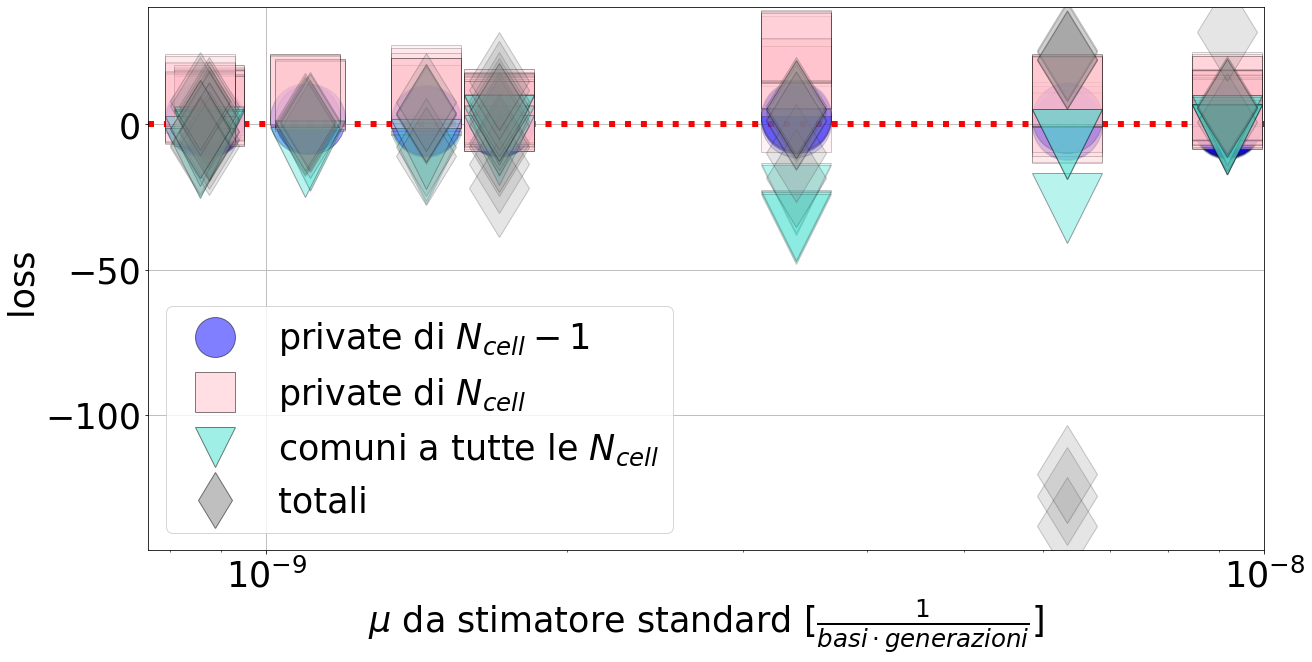

In [34]:
ngen=20
ngen0=65
nalb=6
durata=ngen0+(ngen*nalb)
N_b=5595688850
n=5
n_tr=1000
rami_err= np.loadtxt("C:../es_new/CRC0441_7.txt", unpack='true')
mutazioni= np.loadtxt("C:../es_new/mut_CRC0441_7.txt", unpack='true')
rami_err_5= np.loadtxt("C:../es_new/CRC0441.txt", unpack='true')
mutazioni_5= np.loadtxt("C:../es_new/mut_CRC0441.txt", unpack='true')
rami_err_15= np.loadtxt("C:../es_new/CRC1502.txt", unpack='true')
mutazioni_15= np.loadtxt("C:../es_new/mut_CRC1502.txt", unpack='true')
rami_err_27= np.loadtxt("C:../es_new/CRC0327.txt", unpack='true')
mutazioni_27= np.loadtxt("C:../es_new/mut_CRC0327.txt", unpack='true')
rami_err_LM= np.loadtxt("C:../es_new/CRC1599LM.txt", unpack='true')
mutazioni_LM= np.loadtxt("C:../es_new/mut_CRC1599LM.txt", unpack='true')
rami_err_PR= np.loadtxt("C:../es_new/CRC1599PR.txt", unpack='true')
mutazioni_PR= np.loadtxt("C:../es_new/mut_CRC1599PR.txt", unpack='true')
rami_err_07= np.loadtxt("C:../es_new/CRC1307.txt", unpack='true')
mutazioni_07= np.loadtxt("C:../es_new/mut_CRC1307.txt", unpack='true')
rami_err_82= np.loadtxt("C:../es_new/CRC0282.txt", unpack='true')
mutazioni_82= np.loadtxt("C:../es_new/mut_CRC0282.txt", unpack='true')
rami_err_82_7= np.loadtxt("C:../es_new/CRC0282.txt", unpack='true')
mutazioni_82_7= np.loadtxt("C:../es_new/mut_CRC0282_7.txt", unpack='true')

mu_arr=np.array([1.10482E-9, 1.09435E-09, 1.70859E-09, 8.7505E-10, 1.44585E-09, 8.57421E-10, 3.39448E-09, 6.33828E-09, 9.17132E-09])
x=np.linspace(0.52,0.54, 5)

datia=np.array([558,432])
datid=np.array([527,549,626,522])
datie=np.array([1548,1526])
datif=np.array([2174,2048,2075])

datia_5=np.array([457,433])
datid_5=np.array([489,484,561,532])
datie_5=np.array([1155,1160])
datif_5=np.array([1716,1692,1644])

datia_15=np.array([1503,2032,1529,1893,1369,1619,1081,1283])
datid_15=np.array([2136,2618,1775,1728,2206,2119,2318,2595,2950,2801,2945,2043,2960,2976,2486,2300])
datie_15=np.array([2661,2708,1651,1738,611,616,705,689])
datif_15=np.array([4797,4436,5326,3969,3857,4333,3561,3412,3662,3191,3665,2989])

datia_27=np.array([518,570,439,759,841,1048])
datid_27=np.array([746,704,619,629,914,833,884,1123,1161,879,1101,1176])
datie_27=np.array([1052,1094,974,1055,887,1169])
datif_27=np.array([1671,1798,1723,1858,1888,2178,2063,2048,2270])

datia_LM=np.array([1332,1506,898,696])
datid_LM=np.array([796,914,1412,1704,1396,1367,1160,1391])
datie_LM=np.array([1905,1787,1273,1302])
datif_LM=np.array([2701,3317,3491,2664,2669,2462])

datia_PR=np.array([259,274,124,83])
datid_PR=np.array([241,237,383,372,355,359,124,161])
datie_PR=np.array([398,402,281,285])
datif_PR=np.array([639,770,785,446,405,640])

datia_07=np.array([993,912,1996,944,641,697])
datid_07=np.array([1024,953,1772,1762,2653,1574,1588,1561,943,910,880,903])
datie_07=np.array([1657,1647,1224,1251,1676,1709])
datif_07=np.array([2681,2600,3419,3877,2825,2812,2619,2556,2612])


datia_82=np.array([5007,4393,1262,1240,1124,1307])
datid_82=np.array([6133,6214,4802,5335,1647,1634,1386,1351,1582,1581,1554,1370])
datie_82=np.array([10661,10580,2543,2556,2617,2618])
datif_82=np.array([3929,4190,4199,4171,3988,15996,16794,15382])

datia_82_7=np.array([1657,1913,798,755,1446,1441,1203,1674,1392,1428,1418,1138,894])
datid_82_7=np.array([1418,1918,1657,621,1657,1674,1418,1392,1418,1446,1657,1441,377,605,1859,1913,621,536,1918,1823,1392,1371,1674,1409])
datie_82_7=np.array([871,371,871,854,871,843,615,387,371,456,854,875])
datif_82_7=np.array([2289,2528,2279,992,2246,2284])

mut_totali=2099
N_m=5595688850
N_b_15=5316401584
N_b_27=5072406807
N_b_LM=4818048167
N_b_PR=2495801608
N_b_07=4600467279
N_b_82=2748711013
N_b_82_7=820828872.5
z=70

mu=mut_totali/(N_m*(115+(7*32)))

fig = plt.figure(figsize=(20, 10))

for i in range(len(datia)):
    plt.errorbar(mu_arr[0], (np.mean(mutazioni[0])-datia[i])/np.std(mutazioni[0]),  yerr=0,
             linestyle="None", color="b",elinewidth=4, marker='o',mec='black',alpha=0.2, ms=z, mew=1)
    plt.errorbar(mu_arr[1], (np.mean(mutazioni_5[0])-datia_5[i])/np.std(mutazioni_5[0]),  yerr=0,
             linestyle="None", color="b",elinewidth=4, marker='o',mec='black',alpha=0.2, ms=z, mew=1)
for i in range(len(datia_15)):
    plt.errorbar( mu_arr[2],(np.mean(mutazioni_15[0])-datia_15[i])/np.std(mutazioni_15[0]),  yerr=0,
             linestyle="None", color="b",elinewidth=4, marker='o',mec='black',alpha=0.2, ms=z, mew=1)
for i in range(len(datia_27)):
     plt.errorbar(mu_arr[3], np.mean((mutazioni_27[0])-datia_27[i])/np.std(mutazioni_27[0]),  yerr=0,
             linestyle="None", color="b",elinewidth=4, marker='o',mec='black',alpha=0.2, ms=z, mew=1)
for i in range(len(datia_LM)):
     plt.errorbar( mu_arr[4],np.mean((mutazioni_LM[0])-datia_LM[i])/np.std(mutazioni_LM[0]),  yerr=0,
             linestyle="None", color="b",elinewidth=4, marker='o',mec='black',alpha=0.2, ms=z, mew=1)
for i in range(len(datia_PR)):
     plt.errorbar( mu_arr[5],np.mean((mutazioni_PR[0])-datia_PR[i])/np.std(mutazioni_PR[0]),  yerr=0,
             linestyle="None", color="b",elinewidth=4, marker='o',mec='black',alpha=0.2, ms=z, mew=1)
for i in range(len(datia_07)):
    plt.errorbar(mu_arr[6], np.mean((mutazioni_07[0])-datia_07[i])/np.std(mutazioni_07[0]),  yerr=0,
             linestyle="None", color="b",elinewidth=4, marker='o',mec='black',alpha=0.2, ms=z, mew=1)
for i in range(len(datia_82)):
    plt.errorbar(mu_arr[7], np.mean((mutazioni_82[0])-datia_82[i])/np.std(mutazioni_82[0]),  yerr=0,
             linestyle="None", color="b",elinewidth=4, marker='o',mec='black',alpha=0.2, ms=z, mew=1)
for i in range(len(datia_82_7)):
    plt.errorbar( mu_arr[8],np.mean((mutazioni_82_7[0])-datia_82_7[i])/np.std(mutazioni_82_7[0]),  yerr=0,
             linestyle="None", color="b",elinewidth=4, marker='o',mec='black',alpha=0.2, ms=z, mew=1)
    

    

for i in range(len(datid)):
    plt.errorbar( mu_arr[0],(np.mean(mutazioni[3])-datid[i])/np.std(mutazioni[3]),  yerr=0,
             linestyle="None", color="pink",elinewidth=4, marker='s',mec='black',alpha=0.2, ms=z, mew=1)
    plt.errorbar(mu_arr[1], np.mean((mutazioni_5[3])-datid_5[i])/np.std(mutazioni_5[3]),  yerr=0,
             linestyle="None", color="pink",elinewidth=4, marker='s',mec='black',alpha=0.2, ms=z, mew=1)
for i in range(len(datid_15)):
    plt.errorbar( mu_arr[2],(np.mean(mutazioni_15[3])-datid_15[i])/np.std(mutazioni_15[3]),  yerr=0,
             linestyle="None", color="pink",elinewidth=4, marker='s',mec='black',alpha=0.2, ms=z, mew=1)
for i in range(len(datid_27)):
    plt.errorbar(mu_arr[3], (np.mean(mutazioni_27[3])-datid_27[i])/np.std(mutazioni_27[3]),  yerr=0,
             linestyle="None", color="pink",elinewidth=4, marker='s',mec='black',alpha=0.2, ms=z, mew=1)
for i in range(len(datid_LM)):
    plt.errorbar(mu_arr[4], (np.mean(mutazioni_LM[3])-datid_LM[i])/np.std(mutazioni_LM[3]),  yerr=0,
             linestyle="None", color="pink",elinewidth=4, marker='s',mec='black',alpha=0.2, ms=z, mew=1)
for i in range(len(datid_PR)):
    plt.errorbar(mu_arr[5], (np.mean(mutazioni_PR[3])-datid_PR[i])/np.std(mutazioni_PR[3]),  yerr=0,
             linestyle="None", color="pink",elinewidth=4, marker='s',mec='black',alpha=0.2, ms=z, mew=1)
for i in range(len(datid_07)):
    plt.errorbar(mu_arr[6], (np.mean(mutazioni_07[3])-datid_07[i])/np.std(mutazioni_07[3]),  yerr=0,
             linestyle="None", color="pink",elinewidth=4, marker='s',mec='black',alpha=0.2, ms=z, mew=1)
for i in range(len(datid_82)):
    plt.errorbar( mu_arr[7],(np.mean(mutazioni_82[3])-datid_82[i])/np.std(mutazioni_82[3]),  yerr=0,
             linestyle="None", color="pink",elinewidth=4, marker='s',mec='black',alpha=0.2, ms=z, mew=1)
for i in range(len(datid_82_7)):
    plt.errorbar(mu_arr[8], (np.mean(mutazioni_82_7[3])-datid_82_7[i])/np.std(mutazioni_82_7[3]),  yerr=0,
             linestyle="None", color="pink",elinewidth=4, marker='s',mec='black',alpha=0.2, ms=z, mew=1)

    

for i in range(len(datie)):
    plt.errorbar(mu_arr[0], (np.mean(mutazioni[4])-datie[i])/np.std(mutazioni[4]),  yerr=0,
             linestyle="None", color="turquoise",elinewidth=4, marker='v',mec='black',alpha=0.2, ms=z, mew=1)
    plt.errorbar( mu_arr[1],(np.mean(mutazioni_5[4])-datie_5[i])/np.std(mutazioni_5[4]),  yerr=0,
             linestyle="None", color="turquoise",elinewidth=4, marker='v',mec='black',alpha=0.2, ms=z, mew=1)
for i in range(len(datie_15)):
    plt.errorbar( mu_arr[2],(np.mean(mutazioni_15[4])-datie_15[i])/np.std(mutazioni_15[4]),  yerr=0,
             linestyle="None", color="turquoise",elinewidth=4, marker='v',mec='black',alpha=0.2, ms=z, mew=1)
for i in range(len(datie_27)):
    plt.errorbar(mu_arr[3], (np.mean(mutazioni_27[4])-datie_27[i])/np.std(mutazioni_27[4]),  yerr=0,
             linestyle="None", color="turquoise",elinewidth=4, marker='v',mec='black',alpha=0.2, ms=z, mew=1)
for i in range(len(datie_LM)):
    plt.errorbar(mu_arr[4], (np.mean(mutazioni_LM[4])-datie_LM[i])/np.std(mutazioni_LM[4]),  yerr=0,
             linestyle="None", color="turquoise",elinewidth=4, marker='v',mec='black',alpha=0.2, ms=z, mew=1)
for i in range(len(datie_PR)):
    plt.errorbar(mu_arr[5], (np.mean(mutazioni_PR[4])-datie_PR[i])/np.std(mutazioni_PR[4]),  yerr=0,
             linestyle="None", color="turquoise",elinewidth=4, marker='v',mec='black',alpha=0.2, ms=z, mew=1)
for i in range(len(datie_07)):
    plt.errorbar(mu_arr[6], (np.mean(mutazioni_07[4])-datie_07[i])/np.std(mutazioni_07[4]),  yerr=0,
             linestyle="None", color="turquoise",elinewidth=4, marker='v',mec='black',alpha=0.2, ms=z, mew=1)
for i in range(len(datie_82)):
    plt.errorbar(mu_arr[7], (np.mean(mutazioni_82[4])-datie_82[i])/np.std(mutazioni_82[4]),  yerr=0,
             linestyle="None", color="turquoise",elinewidth=4, marker='v',mec='black',alpha=0.2, ms=z, mew=1)
for i in range(len(datie_82_7)):
    plt.errorbar(mu_arr[8],(np.mean(mutazioni_82_7[4])-datie_82_7[i])/np.std(mutazioni_82_7[4]),  yerr=0,
             linestyle="None", color="turquoise",elinewidth=4, marker='v',mec='black',alpha=0.2, ms=z, mew=1)

    
for i in range(len(datif)):
    plt.errorbar( mu_arr[0],(np.mean(mutazioni[4]+mutazioni[3])-datif[i])/np.std(mutazioni[4]+mutazioni[3]),  yerr=0,
             linestyle="None", color="grey",elinewidth=4, marker='d',mec='black',alpha=0.2, ms=z, mew=1)
    plt.errorbar( mu_arr[1],(np.mean(mutazioni_5[4]+mutazioni_5[3])-datif_5[i])/np.std(mutazioni_5[4]+mutazioni_5[3]),  yerr=0,
             linestyle="None", color="grey",elinewidth=4, marker='d',mec='black',alpha=0.2, ms=z, mew=1)
for i in range(len(datif_15)):
    plt.errorbar( mu_arr[2],(np.mean(mutazioni_15[4]+mutazioni_15[3])-datif_15[i])/np.std(mutazioni_15[4]+mutazioni_15[3]),  yerr=0,
             linestyle="None", color="grey",elinewidth=4, marker='d',mec='black',alpha=0.2, ms=z, mew=1)
for i in range(len(datif_27)):
    plt.errorbar(mu_arr[3], (np.mean(mutazioni_27[4]+mutazioni_27[3])-datif_27[i])/np.std(mutazioni_27[4]+mutazioni_27[3]),  yerr=0,
             linestyle="None", color="grey",elinewidth=4, marker='d',mec='black',alpha=0.2, ms=z, mew=1)
for i in range(len(datif_LM)):
    plt.errorbar( mu_arr[4],(np.mean(mutazioni_LM[4]+mutazioni_LM[3])-datif_LM[i])/np.std(mutazioni_LM[4]+mutazioni_LM[3]),  yerr=0,
             linestyle="None", color="grey",elinewidth=4, marker='d',mec='black',alpha=0.2, ms=z, mew=1)
for i in range(len(datif_PR)):
    plt.errorbar(mu_arr[5], (np.mean(mutazioni_PR[4]+mutazioni_PR[3])-datif_PR[i])/np.std(mutazioni_PR[4]+mutazioni_PR[3]),  yerr=0,
             linestyle="None", color="grey",elinewidth=4, marker='d',mec='black',alpha=0.2, ms=z, mew=1)
for i in range(len(datif_07)):
    plt.errorbar( mu_arr[6],(np.mean(mutazioni_07[4]+mutazioni_07[3])-datif_07[i])/np.std(mutazioni_07[4]+mutazioni_07[3]),  yerr=0,
             linestyle="None", color="grey",elinewidth=4, marker='d',mec='black',alpha=0.2, ms=z, mew=1)
for i in range(len(datif_82)):
    plt.errorbar(mu_arr[7], (np.mean(mutazioni_82[4]+mutazioni_82[3])-datif_82[i])/np.std(mutazioni_82[4]+mutazioni_82[3]),  yerr=0,
             linestyle="None", color="grey",elinewidth=4, marker='d',mec='black',alpha=0.2, ms=z, mew=1)
for i in range(len(datif_82_7)):
    plt.errorbar( mu_arr[8],(np.mean(mutazioni_82_7[4]+mutazioni_82_7[3])-datif_82_7[i])/np.std(mutazioni_82_7[4]+mutazioni_82_7[3]),  yerr=0,
             linestyle="None", color="grey",elinewidth=4, marker='d',mec='black',alpha=0.2, ms=z, mew=1)
plt.axhline(y=0 , color= 'r', linewidth=6.0,linestyle='dotted')
plt.xlabel(r'$\mu$ da stimatore standard $ [\frac{1}{basi \cdot generazioni}]$')
plt.ylabel(r'loss ')
plt.xscale('log')      

plt.xlim(0, 1E-8)
plt.errorbar(10, 10, 
            
             linestyle="None", color="blue",elinewidth=4, marker='o',mec='black', alpha=0.5, ms=40, mew=1, label=r'private di $N_{cell}-1$')



plt.errorbar(10, 10,  
            
             linestyle="None", color="pink",elinewidth=4, marker='s',mec='black', alpha=0.5, ms=40, mew=1, label=r'private di $N_{cell}$')
plt.errorbar(10, 10,  
             
             linestyle="None", color="turquoise",elinewidth=4, marker='v',mec='black', alpha=0.5, ms=40, mew=1,label=r'comuni a tutte le $N_{cell}$')
plt.errorbar(10, 10,  
           
             linestyle="None", color="grey",elinewidth=4, marker='d',mec='black', alpha=0.5, ms=40, mew=1,label='totali')

#plt.ylim(0.8E-9,1.45E-9)  
plt.grid(True)
plt.legend()


## Confronto tra la stima del tasso di mutazione $\mu_{standard} $ e $\mu_{private} $
grafico che rappresenta, per ogni linea cellulare, la stima del tasso di mutazione ottenuta
con lo stimatore standard e dalle mutazioni private delle $N_{cell}$ cellule. Il grafico è stato ottenuto, per ogni valore
della loss, con 1000 simulazioni. Le barre di errore indicano la deviazione standard,

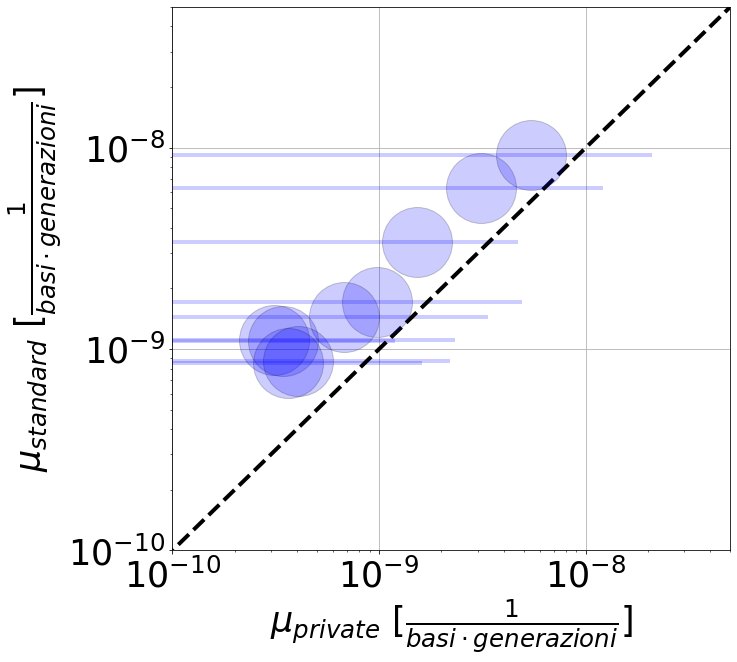

In [100]:
ngen=20
ngen0=65
nalb=6
durata=ngen0+(ngen*nalb)
N_b=5595688850
n=5
n_tr=1000
plt.rcParams.update({'font.size': 35})
rami_err= np.loadtxt("C:../es_new/CRC0441_7.txt", unpack='true')
mutazioni= np.loadtxt("C:../es_new/mut_CRC0441_7.txt", unpack='true')
rami_err_5= np.loadtxt("C:../es_new/CRC0441.txt", unpack='true')
mutazioni_5= np.loadtxt("C:../es_new/mut_CRC0441.txt", unpack='true')
rami_err_15= np.loadtxt("C:../es_new/CRC1502.txt", unpack='true')
mutazioni_15= np.loadtxt("C:../es_new/mut_CRC1502.txt", unpack='true')
rami_err_27= np.loadtxt("C:../es_new/CRC0327.txt", unpack='true')
mutazioni_27= np.loadtxt("C:../es_new/mut_CRC0327.txt", unpack='true')
rami_err_LM= np.loadtxt("C:../es_new/CRC1599LM.txt", unpack='true')
mutazioni_LM= np.loadtxt("C:../es_new/mut_CRC1599LM.txt", unpack='true')
rami_err_PR= np.loadtxt("C:../es_new/CRC1599PR.txt", unpack='true')
mutazioni_PR= np.loadtxt("C:../es_new/mut_CRC1599PR.txt", unpack='true')
rami_err_07= np.loadtxt("C:../es_new/CRC1307.txt", unpack='true')
mutazioni_07= np.loadtxt("C:../es_new/mut_CRC1307.txt", unpack='true')
rami_err_82= np.loadtxt("C:../es_new/CRC0282.txt", unpack='true')
mutazioni_82= np.loadtxt("C:../es_new/mut_CRC0282.txt", unpack='true')
rami_err_82_7= np.loadtxt("C:../es_new/CRC0282.txt", unpack='true')
mutazioni_82_7= np.loadtxt("C:../es_new/mut_CRC0282_7.txt", unpack='true')

#print(rami_err[0,:])
mu_arr=np.array([1.10482E-9, 1.09435E-09, 1.70859E-09, 8.7505E-10, 1.44585E-09, 8.57421E-10, 3.39448E-09, 6.33828E-09, 9.17132E-09])
x=np.linspace(0.52,0.54, 5)
mu_arr_pr=np.array([ 3.1179268E-10, 3.440307E-10, 9.7963396E-10, 4.037607E-10, 
                    6.77304E-10, 3.62274E-10, 1.52792E-09,3.127846988E-09, 5.40560194E-09])


datia=np.array([558,432])
datid=np.array([527,549,626,522])
datie=np.array([1548,1526])
datif=np.array([2174,2048,2075])

datia_5=np.array([457,433])
datid_5=np.array([489,484,561,532])
datie_5=np.array([1155,1160])
datif_5=np.array([1716,1692,1644])

datia_15=np.array([1503,2032,1529,1893,1369,1619,1081,1283])
datid_15=np.array([2136,2618,1775,1728,2206,2119,2318,2595,2950,2801,2945,2043,2960,2976,2486,2300])
datie_15=np.array([2661,2708,1651,1738,611,616,705,689])
datif_15=np.array([4797,4436,5326,3969,3857,4333,3561,3412,3662,3191,3665,2989])

datia_27=np.array([518,570,439,759,841,1048])
datid_27=np.array([746,704,619,629,914,833,884,1123,1161,879,1101,1176])
datie_27=np.array([1052,1094,974,1055,887,1169])
datif_27=np.array([1671,1798,1723,1858,1888,2178,2063,2048,2270])

datia_LM=np.array([1332,1506,898,696])
datid_LM=np.array([796,914,1412,1704,1396,1367,1160,1391])
datie_LM=np.array([1905,1787,1273,1302])
datif_LM=np.array([2701,3317,3491,2664,2669,2462])

datia_PR=np.array([259,274,124,83])
datid_PR=np.array([241,237,383,372,355,359,124,161])
datie_PR=np.array([398,402,281,285])
datif_PR=np.array([639,770,785,446,405,640])

datia_07=np.array([993,912,1996,944,641,697])
datid_07=np.array([1024,953,1772,1762,2653,1574,1588,1561,943,910,880,903])
datie_07=np.array([1657,1647,1224,1251,1676,1709])
datif_07=np.array([2681,2600,3419,3877,2825,2812,2619,2556,2612])


datia_82=np.array([5007,4393,1262,1240,1124,1307])
datid_82=np.array([6133,6214,4802,5335,1647,1634,1386,1351,1582,1581,1554,1370])
datie_82=np.array([10661,10580,2543,2556,2617,2618])
datif_82=np.array([3929,4190,4199,4171,3988,15996,16794,15382])

datia_82_7=np.array([1657,1913,798,755,1446,1441,1203,1674,1392,1428,1418,1138,894])
datid_82_7=np.array([1418,1918,1657,621,1657,1674,1418,1392,1418,1446,1657,1441,377,605,1859,1913,621,536,1918,1823,1392,1371,1674,1409])
datie_82_7=np.array([871,371,871,854,871,843,615,387,371,456,854,875])
datif_82_7=np.array([2289,2528,2279,992,2246,2284])

#for i in range(n):
   # print(i, std_rami_err[0,i])
mut_totali=2099
N_m=5595688850
N_b_15=5316401584
N_b_27=5072406807
N_b_LM=4818048167
N_b_PR=2495801608
N_b_07=4600467279
N_b_82=2748711013
N_b_82_7=820828872.5
z=70
x1=np.linspace(0,10,3)
mu=mut_totali/(N_m*(115+(7*32)))
fig = plt.figure(figsize=(10, 10))
plt.axhline(y=0, color='red', linestyle='dotted',linewidth=4 )
#print(len(datia/(np.mean(rami_err[0])*N_b)))
    #print((medie_rami_err[3,i]-np.mean(datid))/std_rami_err[3,i])


plt.errorbar( mu_arr_pr[0], mu_arr[0],
             xerr=np.std(np.mean(datia)/((rami_err[0]+rami_err[3])*N_b*2))+np.std(np.mean(datid)/((rami_err[0]+rami_err[3])*N_b*2)),
                 yerr=np.std(np.mean(datif)/np.mean(rami_err[0]+rami_err[3]*N_b)),
             linestyle="None", color="b",elinewidth=4, marker='o',mec='black', alpha=0.2, ms=z, mew=1)
plt.errorbar( mu_arr_pr[1], mu_arr[1],
             xerr=np.std(np.mean(datia_5)/((rami_err_5[0]+rami_err_5[3])*N_b*2))+np.std(np.mean(datid_5)/((rami_err_5[0]+rami_err_5[3])*N_b*2)),
                 yerr=np.std(np.mean(datif_5)/np.mean(rami_err_5[0]+rami_err_5[3]*N_b)),
             linestyle="None", color="b",elinewidth=4, marker='o',mec='black', alpha=0.2, ms=z, mew=1)

plt.errorbar( mu_arr_pr[2], mu_arr[2],
             xerr=np.std(np.mean(datia_15)/((rami_err_15[0]+rami_err_15[3])*N_b_15*2))+np.std(np.mean(datid_15)/((rami_err_15[0]+rami_err_15[3])*N_b_15*2)),
                 yerr=np.std(np.mean(datif_15)/np.mean(rami_err_15[0]+rami_err_15[3]*N_b_15)),
             linestyle="None", color="b",elinewidth=4, marker='o',mec='black', alpha=0.2, ms=z, mew=1)

plt.errorbar( mu_arr_pr[3],mu_arr[3], 
             xerr=np.std(np.mean(datia_27)/((rami_err_27[0]+rami_err_27[3])*N_b_27*2))+np.std(np.mean(datid_27)/((rami_err_27[0]+rami_err_27[3])*N_b_27*2)),
                 yerr=np.std(np.mean(datif_27)/np.mean(rami_err_27[0]+rami_err_27[3]*N_b_27)),
             linestyle="None", color="b",elinewidth=4, marker='o',mec='black', alpha=0.2, ms=z, mew=1)
   
plt.errorbar( mu_arr_pr[4], mu_arr[4],
             xerr=np.std(np.mean(datia_LM)/((rami_err_LM[0]+rami_err_LM[3])*N_b_LM*2))+np.std(np.mean(datid_LM)/((rami_err_LM[0]+rami_err_LM[3])*N_b_LM*2)),
                 yerr=np.std(np.mean(datif_LM)/np.mean(rami_err_LM[0]+rami_err_LM[3]*N_b_LM)),
             linestyle="None", color="b",elinewidth=4, marker='o',mec='black', alpha=0.2, ms=z, mew=1)

plt.errorbar(mu_arr_pr[5],mu_arr[5], 
             xerr=np.std(np.mean(datia_PR)/((rami_err_PR[0]+rami_err_PR[3])*N_b_PR*2))+np.std(np.mean(datid_PR)/((rami_err_PR[0]+rami_err_PR[3])*N_b_PR*2)),
                 yerr=np.std(np.mean(datif_PR)/np.mean(rami_err_PR[0]+rami_err_PR[3]*N_b_PR)),
             linestyle="None", color="b",elinewidth=4, marker='o',mec='black', alpha=0.2, ms=z, mew=1)

plt.errorbar( mu_arr_pr[6],mu_arr[6], 
             xerr=np.std(np.mean(datia_07)/((rami_err_07[0]+rami_err_07[3])*N_b_07*2))+np.std(np.mean(datid_07)/((rami_err_07[0]+rami_err_07[3])*N_b_07*2)),
                 yerr=np.std(np.mean(datif_07)/np.mean(rami_err_07[0]+rami_err_07[3]*N_b_07)),
             linestyle="None", color="b",elinewidth=4, marker='o',mec='black', alpha=0.2, ms=z, mew=1)

plt.errorbar( mu_arr_pr[7],mu_arr[7], 
             xerr=np.std(np.mean(datia_82)/((rami_err_82[0]+rami_err_82[3])*N_b_82*2))+np.std(np.mean(datid_82)/((rami_err_82[0]+rami_err_82[3])*N_b_82*2)),
                 yerr=np.std(np.mean(datif_82)/np.mean(rami_err_82[0]+rami_err_82[3]*N_b_82)),
             linestyle="None", color="b",elinewidth=4, marker='o',mec='black', alpha=0.2, ms=z, mew=1)

plt.errorbar( mu_arr_pr[8],mu_arr[8], 
             xerr=np.std(np.mean(datia_82_7)/((rami_err_82_7[0]+rami_err_82_7[3])*N_b_82_7*2))+np.std(np.mean(datid_82_7)/((rami_err_82_7[0]+rami_err_82_7[3])*N_b_82_7*2)),
                 yerr=np.std(np.mean(datif_82_7)/np.mean(rami_err_82_7[0]+rami_err_82_7[3]*N_b_82_7)),
             linestyle="None", color="b",elinewidth=4, marker='o',mec='black', alpha=0.2, ms=z, mew=1)

plt.plot(x1, x1,linestyle="--",color="black",linewidth=4)

plt.xlabel(r'$\mu_{private} \  [\frac{1}{basi \cdot generazioni}]$')
plt.ylabel(r'$\mu_{standard} \ [\frac{1}{basi \cdot generazioni}]$')
plt.xscale('log')      
plt.yscale('log')   
    

plt.ylim(1E-10,0.5E-7)
plt.xlim(1E-10, 0.5E-7)
plt.errorbar(10, 10, 
             yerr=0,xerr=0,
             linestyle="None", color="green",elinewidth=4, marker='o',mec='black', alpha=0.5, ms=40, mew=1, label=r'da mutazioni private di $N_{cell}-1$ cellule')


#plt.ylim(0.8E-9,1.45E-9)  
plt.grid(True)
#plt.legend(bbox_to_anchor=(-1.2, 0.7), loc="lower left")


## loss function quadratica sulle mutazioni simulate e misurate in laboratorio in funzione di $P_a$
Il grafico contiene i parametri della per la linea cellulare CRC0441 con $_{bott}$= 7 bottlenecks. Il valore del
rate di mutazione utilizzato nella simulazione è quello ottenuto con lo stimatore standard. Nel grafico
$b − d$ è costante: $P_a$ varia assieme a $b$, $d$, $N_{gen}$, $\mu$ e $N_{gen0}$.
    Il grafico rappresenta il numero di mutazioni
per 25 diversi valori di $P_a$. Ogni punto del grafico è stato ottenuto con 1000 simulazioni dell’albero
generazionale, delle coalescenze e delle mutazioni.


In [66]:
def media_variare_d(a, matr, n):
    set_sim=np.zeros(1000)
    for k in range(n):
        for i in range(1000):
            set_sim[i]=a[i+k*1000]
        matr[k, 0]=np.mean(set_sim)
       # print(set_sim, media_a[k])
        matr[k, 1]=(np.std(set_sim))

[1311.949 1618.585 1915.443 2215.401 2498.921 2762.004 3055.654 3362.992
 3624.849 3847.329 4085.024 4341.596 4631.229 4826.784 5151.629 5368.928
 5594.07  5822.412 6082.401 6365.866 6445.958 6736.995 7042.213 7121.596
 7461.733]
[ 2013.89   2481.235  2931.475  3398.026  3833.851  4226.694  4692.109
  5146.17   5550.323  5896.979  6256.354  6652.874  7103.345  7401.703
  7902.529  8232.542  8568.475  8926.771  9320.943  9751.423  9886.472
 10320.899 10791.04  10907.16  11437.261]


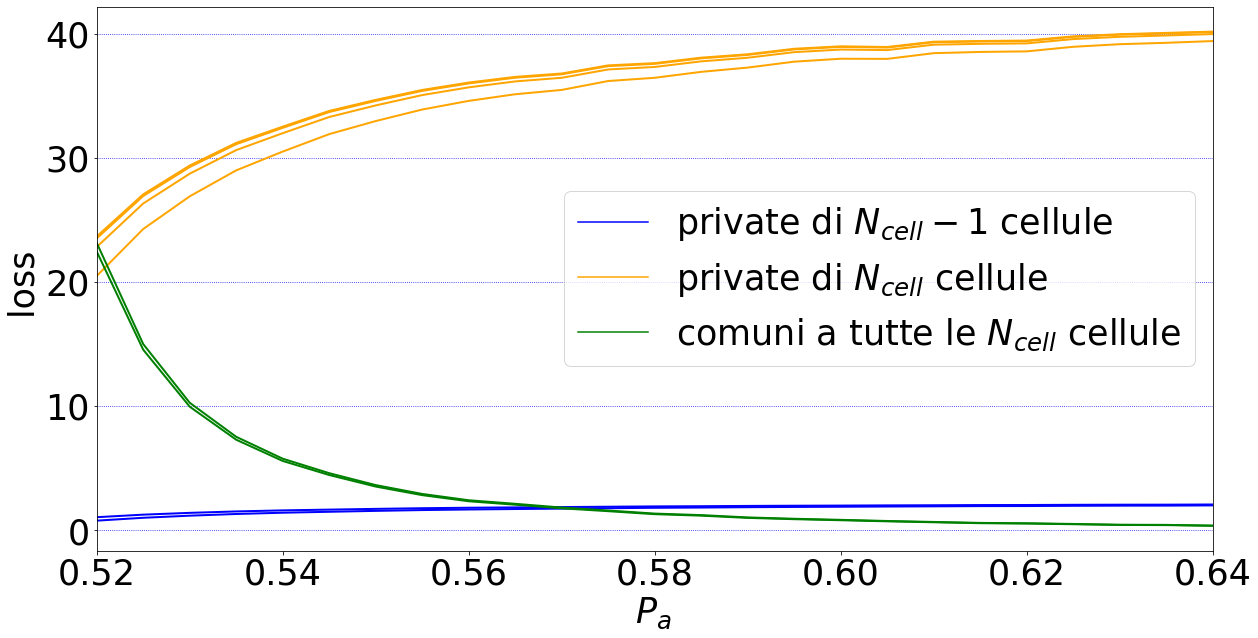

In [67]:
a, d, e= np.loadtxt("C:../es_new/mut_CRC0441_7_variare_Pa.txt", usecols=(0, 3, 4), delimiter='      ',unpack='true')

#print(a)
fig = plt.figure(figsize=(20, 10))
x=np.linspace(0.52, 0.64, 25)
n_tr=1000
n=25
              
datia=np.array([558,432])
datid=np.array([527,549,626,522])
datie=np.array([1548,1526])
datif=np.array([2174,2048,2075])
              
matr_a=np.zeros((n, 2))
matr_d=np.zeros((n, 2))
matr_e=np.zeros((n, 2))


media_variare_d(a, matr_a, n)
media_variare_d(d, matr_d, n)
media_variare_d(e, matr_e, n)
print(matr_a[:,0])
for k in range(len(datia)):
    plt.plot(x, np.power(((matr_a[:,0]-datia[k])/matr_a[:,1]), 2), color="b",
         linestyle="solid", linewidth=2.0)
for k in range(len(datid)):
    plt.plot(x,np.power(((matr_d[:,0]-datid[k])/matr_d[:,1]),2), color='orange',
         linestyle="solid", linewidth=2.0)
for k in range(len(datie)):
    plt.plot(x, np.power(((matr_e[:,0]-datie[k])/matr_e[:,1]),2), color='green',
         linestyle="solid", linewidth=2.0)

plt.plot(1000, 1, color="b",label=r'private di $N_{cell}-1$ cellule ')   
plt.plot(1000, 1, color="orange",label=r'private di $N_{cell}$ cellule ') 
plt.plot(1000, 1, color="green",label=r'comuni a tutte le $N_{cell}$ cellule') 
plt.xlabel(r'$P_a$ ')
plt.ylabel('loss ')
print(matr_d[:,0])             
plt.xlim(0.52, 0.64)
plt.grid(axis='y',linestyle='dotted', color='b')
plt.legend()

## loss function quadratica sulle mutazioni simulate e misurate in laboratorio in funzione di $N_{gen0}$
Il grafico contiene i parametri della per la linea cellulare CRC0441 con $_{bott}$= 7 bottlenecks. Il valore del
rate di mutazione utilizzato nella simulazione è quello ottenuto con lo stimatore standard. Nel grafico $N_{gen0}$ varia 
assieme a $\mu$, tutti gli altri parametri sono costanti.
Il grafico rappresenta il numero di mutazioni
per 25 diversi valori di $P_a$. Ogni punto del grafico è stato ottenuto con 1000 simulazioni dell’albero
generazionale, delle coalescenze e delle mutazioni.


[2072.423 2006.177 1951.661 1894.996 1844.383 1793.094 1746.922 1700.362
 1658.562 1621.112 1582.777 1546.427 1511.332 1477.288 1447.428 1414.214
 1388.696 1359.927 1330.911 1306.338 1280.757 1254.556 1233.417 1209.742
 1190.081]


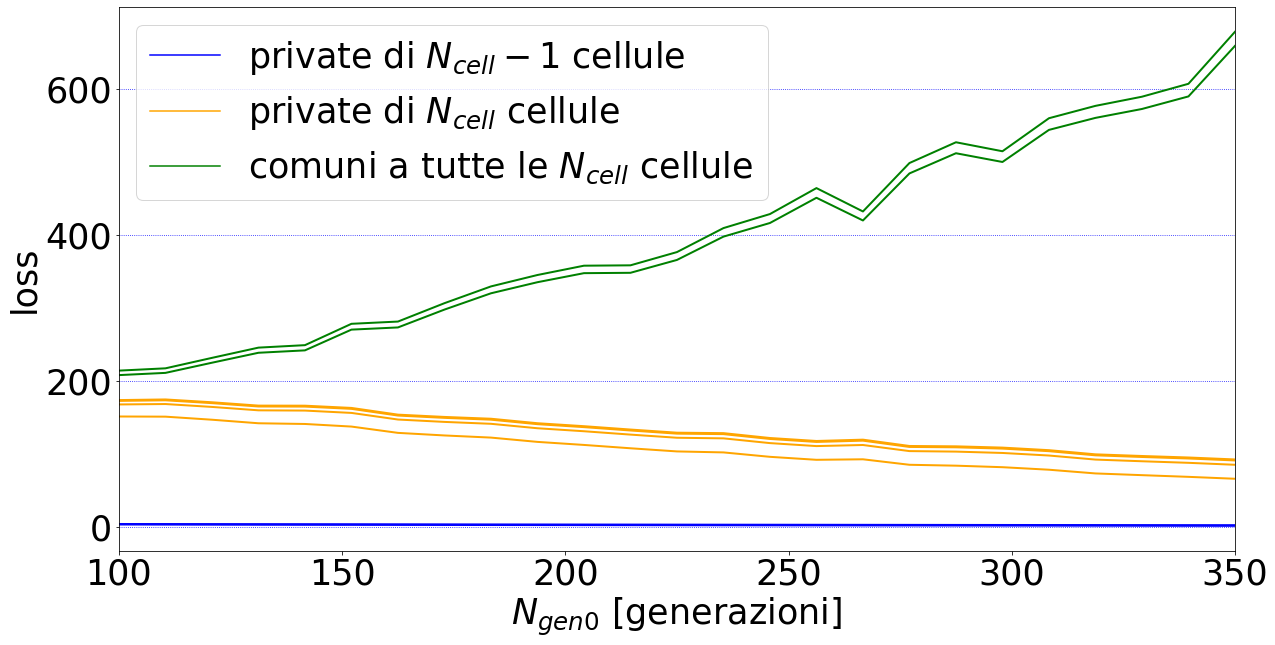

In [68]:
a, d, e= np.loadtxt("C:../es_new/mut_CRC0441_7_variare_Ngen0.txt", usecols=(0, 3, 4), delimiter='      ',unpack='true')

#print(a)
fig = plt.figure(figsize=(20, 10))
x=np.linspace(100, 100+(10*25), 25)
n_tr=1000
n=25            
datia=np.array([558,432])
datid=np.array([527,549,626,522])
datie=np.array([1548,1526])
datif=np.array([2174,2048,2075])
              
matr_a=np.zeros((n, 2))
matr_d=np.zeros((n, 2))
matr_e=np.zeros((n, 2))


media_variare_d(a, matr_a, n)
media_variare_d(d, matr_d, n)
media_variare_d(e, matr_e, n)
for k in range(len(datia)):
    plt.plot(x, np.power(((matr_a[:,0]-datia[k])/matr_a[:,1]), 2), color="b",
         linestyle="solid", linewidth=2.0)
for k in range(len(datid)):
    plt.plot(x, np.power(((matr_d[:,0]-datid[k])/matr_d[:,1]), 2), color='orange',
         linestyle="solid", linewidth=2.0)
for k in range(len(datie)):
    plt.plot(x, np.power(((matr_e[:,0]-datie[k])/matr_e[:,1]), 2), color='green',
         linestyle="solid", linewidth=2.0)

plt.plot(1000, 1, color="b",label=r'private di $N_{cell}-1$ cellule ')   
plt.plot(1000, 1, color="orange",label=r'private di $N_{cell}$ cellule ') 
plt.plot(1000, 1, color="green",label=r'comuni a tutte le $N_{cell}$ cellule') 
plt.xlabel(r'$N_{gen0}$ [generazioni]')
plt.ylabel('loss')
print(matr_d[:,0])             
plt.xlim(100, 350)
plt.grid(axis='y',linestyle='dotted', color='b')
plt.legend()

## loss function sulle mutazioni simulate e misurate in laboratorio in funzione di $\mu_{private}$.
Il grafico rappresenta la loss function sulle mutazioni simulate e misurate in laboratorio
in funzione di $\mu_{private}$. Il valore del rate di mutazione utilizzato nella simulazione è $\mu_{private}$. Sulle
ascisse vi è, per ogni cellula sequenziata, la loss function. I valori medi e le deviazioni standard sono
ottenuti ognuno con 1000 simulazioni.

C:\Users\marti\AppData\Local\Temp/ipykernel_16516/271879368.py:219: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(0, 1E-8)


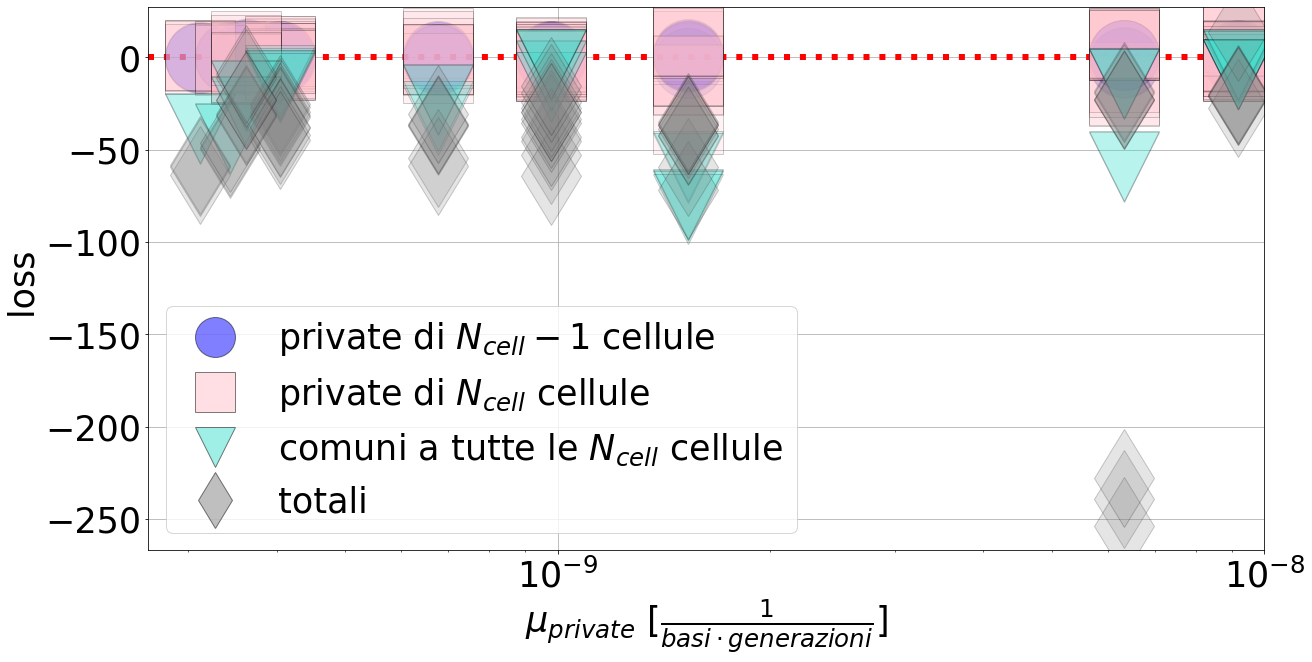

In [8]:
ngen=20
ngen0=65
nalb=6
durata=ngen0+(ngen*nalb)
N_b=5595688850
n=5
n_tr=1000
rami_err= np.loadtxt("C:../es_new/CRC0441_7.txt", unpack='true')
mutazioni= np.loadtxt("C:../es_new/mut_CRC0441_7_private.txt", unpack='true')
rami_err_5= np.loadtxt("C:../es_new/CRC0441.txt", unpack='true')
mutazioni_5= np.loadtxt("C:../es_new/mut_CRC0441_private.txt", unpack='true')
rami_err_15= np.loadtxt("C:../es_new/CRC1502.txt", unpack='true')
mutazioni_15= np.loadtxt("C:../es_new/mut_CRC1502_private.txt", unpack='true')
rami_err_27= np.loadtxt("C:../es_new/CRC0327.txt", unpack='true')
mutazioni_27= np.loadtxt("C:../es_new/mut_CRC0327_private.txt", unpack='true')
rami_err_LM= np.loadtxt("C:../es_new/CRC1599LM.txt", unpack='true')
mutazioni_LM= np.loadtxt("C:../es_new/mut_CRC1599LM_private.txt", unpack='true')
rami_err_PR= np.loadtxt("C:../es_new/CRC1599PR.txt", unpack='true')
mutazioni_PR= np.loadtxt("C:../es_new/mut_CRC1599PR_private.txt", unpack='true')
rami_err_07= np.loadtxt("C:../es_new/CRC1307.txt", unpack='true')
mutazioni_07= np.loadtxt("C:../es_new/mut_CRC1307_private.txt", unpack='true')
rami_err_82= np.loadtxt("C:../es_new/CRC0282.txt", unpack='true')
mutazioni_82= np.loadtxt("C:../es_new/mut_CRC0282_private.txt", unpack='true')
rami_err_82_7= np.loadtxt("C:../es_new/CRC0282.txt", unpack='true')
mutazioni_82_7= np.loadtxt("C:../es_new/mut_CRC0282_7_private.txt", unpack='true')

#print(rami_err[0,:])
mu_arr=np.array([3.1179268455305734e-10, 3.44030686954088e-10,9.79633955658915e-10,4.037606835700499e-10 ,
                 6.773042540496904e-10 , 3.622741119630811e-10, 1.5279198244742698e-09, 6.33828E-09, 9.17132E-09])
x=np.linspace(0.52,0.54, 5)




datia=np.array([558,432])
datid=np.array([527,549,626,522])
datie=np.array([1548,1526])
datif=np.array([2174,2048,2075])

datia_5=np.array([457,433])
datid_5=np.array([489,484,561,532])
datie_5=np.array([1155,1160])
datif_5=np.array([1716,1692,1644])

datia_15=np.array([1503,2032,1529,1893,1369,1619,1081,1283])
datid_15=np.array([2136,2618,1775,1728,2206,2119,2318,2595,2950,2801,2945,2043,2960,2976,2486,2300])
datie_15=np.array([2661,2708,1651,1738,611,616,705,689])
datif_15=np.array([4797,4436,5326,3969,3857,4333,3561,3412,3662,3191,3665,2989])

datia_27=np.array([518,570,439,759,841,1048])
datid_27=np.array([746,704,619,629,914,833,884,1123,1161,879,1101,1176])
datie_27=np.array([1052,1094,974,1055,887,1169])
datif_27=np.array([1671,1798,1723,1858,1888,2178,2063,2048,2270])

datia_LM=np.array([1332,1506,898,696])
datid_LM=np.array([796,914,1412,1704,1396,1367,1160,1391])
datie_LM=np.array([1905,1787,1273,1302])
datif_LM=np.array([2701,3317,3491,2664,2669,2462])

datia_PR=np.array([259,274,124,83])
datid_PR=np.array([241,237,383,372,355,359,124,161])
datie_PR=np.array([398,402,281,285])
datif_PR=np.array([639,770,785,446,405,640])

datia_07=np.array([993,912,1996,944,641,697])
datid_07=np.array([1024,953,1772,1762,2653,1574,1588,1561,943,910,880,903])
datie_07=np.array([1657,1647,1224,1251,1676,1709])
datif_07=np.array([2681,2600,3419,3877,2825,2812,2619,2556,2612])


datia_82=np.array([5007,4393,1262,1240,1124,1307])
datid_82=np.array([6133,6214,4802,5335,1647,1634,1386,1351,1582,1581,1554,1370])
datie_82=np.array([10661,10580,2543,2556,2617,2618])
datif_82=np.array([3929,4190,4199,4171,3988,15996,16794,15382])

datia_82_7=np.array([1657,1913,798,755,1446,1441,1203,1674,1392,1428,1418,1138,894])
datid_82_7=np.array([1418,1918,1657,621,1657,1674,1418,1392,1418,1446,1657,1441,377,605,1859,1913,621,536,1918,1823,1392,1371,1674,1409])
datie_82_7=np.array([871,371,871,854,871,843,615,387,371,456,854,875])
datif_82_7=np.array([2289,2528,2279,992,2246,2284])

#for i in range(n):
   # print(i, std_rami_err[0,i])
mut_totali=2099
N_m=5595688850
N_b_15=5316401584
N_b_27=5072406807
N_b_LM=4818048167
N_b_PR=2495801608
N_b_07=4600467279
N_b_82=2748711013
N_b_82_7=820828872.5
z=70
mu=mut_totali/(N_m*(115+(7*32)))

fig = plt.figure(figsize=(20, 10))

for i in range(len(datia)):
    plt.errorbar(mu_arr[0], (np.mean(mutazioni[0])-datia[i])/np.std(mutazioni[0]),  yerr=0,
             linestyle="None", color="b",elinewidth=4, marker='o',mec='black',alpha=0.2, ms=z, mew=1)
    plt.errorbar(mu_arr[1], (np.mean(mutazioni_5[0])-datia_5[i])/np.std(mutazioni_5[0]),  yerr=0,
             linestyle="None", color="b",elinewidth=4, marker='o',mec='black',alpha=0.2, ms=z, mew=1)
for i in range(len(datia_15)):
    plt.errorbar( mu_arr[2],(np.mean(mutazioni_15[0])-datia_15[i])/np.std(mutazioni_15[0]),  yerr=0,
             linestyle="None", color="b",elinewidth=4, marker='o',mec='black',alpha=0.2, ms=z, mew=1)
for i in range(len(datia_27)):
     plt.errorbar(mu_arr[3], np.mean((mutazioni_27[0])-datia_27[i])/np.std(mutazioni_27[0]),  yerr=0,
             linestyle="None", color="b",elinewidth=4, marker='o',mec='black',alpha=0.2, ms=z, mew=1)
for i in range(len(datia_LM)):
     plt.errorbar( mu_arr[4],np.mean((mutazioni_LM[0])-datia_LM[i])/np.std(mutazioni_LM[0]),  yerr=0,
             linestyle="None", color="b",elinewidth=4, marker='o',mec='black',alpha=0.2, ms=z, mew=1)
for i in range(len(datia_PR)):
     plt.errorbar( mu_arr[5],np.mean((mutazioni_PR[0])-datia_PR[i])/np.std(mutazioni_PR[0]),  yerr=0,
             linestyle="None", color="b",elinewidth=4, marker='o',mec='black',alpha=0.2, ms=z, mew=1)
for i in range(len(datia_07)):
    plt.errorbar(mu_arr[6], np.mean((mutazioni_07[0])-datia_07[i])/np.std(mutazioni_07[0]),  yerr=0,
             linestyle="None", color="b",elinewidth=4, marker='o',mec='black',alpha=0.2, ms=z, mew=1)
for i in range(len(datia_82)):
    plt.errorbar(mu_arr[7], np.mean((mutazioni_82[0])-datia_82[i])/np.std(mutazioni_82[0]),  yerr=0,
             linestyle="None", color="b",elinewidth=4, marker='o',mec='black',alpha=0.2, ms=z, mew=1)
for i in range(len(datia_82_7)):
    plt.errorbar( mu_arr[8],np.mean((mutazioni_82_7[0])-datia_82_7[i])/np.std(mutazioni_82_7[0]),  yerr=0,
             linestyle="None", color="b",elinewidth=4, marker='o',mec='black',alpha=0.2, ms=z, mew=1)
    

    

for i in range(len(datid)):
    plt.errorbar( mu_arr[0],(np.mean(mutazioni[3])-datid[i])/np.std(mutazioni[3]),  yerr=0,
             linestyle="None", color="pink",elinewidth=4, marker='s',mec='black',alpha=0.2, ms=z, mew=1)
    plt.errorbar(mu_arr[1], np.mean((mutazioni_5[3])-datid_5[i])/np.std(mutazioni_5[3]),  yerr=0,
             linestyle="None", color="pink",elinewidth=4, marker='s',mec='black',alpha=0.2, ms=z, mew=1)
for i in range(len(datid_15)):
    plt.errorbar( mu_arr[2],(np.mean(mutazioni_15[3])-datid_15[i])/np.std(mutazioni_15[3]),  yerr=0,
             linestyle="None", color="pink",elinewidth=4, marker='s',mec='black',alpha=0.2, ms=z, mew=1)
for i in range(len(datid_27)):
    plt.errorbar(mu_arr[3], (np.mean(mutazioni_27[3])-datid_27[i])/np.std(mutazioni_27[3]),  yerr=0,
             linestyle="None", color="pink",elinewidth=4, marker='s',mec='black',alpha=0.2, ms=z, mew=1)
for i in range(len(datid_LM)):
    plt.errorbar(mu_arr[4], (np.mean(mutazioni_LM[3])-datid_LM[i])/np.std(mutazioni_LM[3]),  yerr=0,
             linestyle="None", color="pink",elinewidth=4, marker='s',mec='black',alpha=0.2, ms=z, mew=1)
for i in range(len(datid_PR)):
    plt.errorbar(mu_arr[5], (np.mean(mutazioni_PR[3])-datid_PR[i])/np.std(mutazioni_PR[3]),  yerr=0,
             linestyle="None", color="pink",elinewidth=4, marker='s',mec='black',alpha=0.2, ms=z, mew=1)
for i in range(len(datid_07)):
    plt.errorbar(mu_arr[6], (np.mean(mutazioni_07[3])-datid_07[i])/np.std(mutazioni_07[3]),  yerr=0,
             linestyle="None", color="pink",elinewidth=4, marker='s',mec='black',alpha=0.2, ms=z, mew=1)
for i in range(len(datid_82)):
    plt.errorbar( mu_arr[7],(np.mean(mutazioni_82[3])-datid_82[i])/np.std(mutazioni_82[3]),  yerr=0,
             linestyle="None", color="pink",elinewidth=4, marker='s',mec='black',alpha=0.2, ms=z, mew=1)
for i in range(len(datid_82_7)):
    plt.errorbar(mu_arr[8], (np.mean(mutazioni_82_7[3])-datid_82_7[i])/np.std(mutazioni_82_7[3]),  yerr=0,
             linestyle="None", color="pink",elinewidth=4, marker='s',mec='black',alpha=0.2, ms=z, mew=1)

    

for i in range(len(datie)):
    plt.errorbar(mu_arr[0], (np.mean(mutazioni[4])-datie[i])/np.std(mutazioni[4]),  yerr=0,
             linestyle="None", color="turquoise",elinewidth=4, marker='v',mec='black',alpha=0.2, ms=z, mew=1)
    plt.errorbar( mu_arr[1],(np.mean(mutazioni_5[4])-datie_5[i])/np.std(mutazioni_5[4]),  yerr=0,
             linestyle="None", color="turquoise",elinewidth=4, marker='v',mec='black',alpha=0.2, ms=z, mew=1)
for i in range(len(datie_15)):
    plt.errorbar( mu_arr[2],(np.mean(mutazioni_15[4])-datie_15[i])/np.std(mutazioni_15[4]),  yerr=0,
             linestyle="None", color="turquoise",elinewidth=4, marker='v',mec='black',alpha=0.2, ms=z, mew=1)
for i in range(len(datie_27)):
    plt.errorbar(mu_arr[3], (np.mean(mutazioni_27[4])-datie_27[i])/np.std(mutazioni_27[4]),  yerr=0,
             linestyle="None", color="turquoise",elinewidth=4, marker='v',mec='black',alpha=0.2, ms=z, mew=1)
for i in range(len(datie_LM)):
    plt.errorbar(mu_arr[4], (np.mean(mutazioni_LM[4])-datie_LM[i])/np.std(mutazioni_LM[4]),  yerr=0,
             linestyle="None", color="turquoise",elinewidth=4, marker='v',mec='black',alpha=0.2, ms=z, mew=1)
for i in range(len(datie_PR)):
    plt.errorbar(mu_arr[5], (np.mean(mutazioni_PR[4])-datie_PR[i])/np.std(mutazioni_PR[4]),  yerr=0,
             linestyle="None", color="turquoise",elinewidth=4, marker='v',mec='black',alpha=0.2, ms=z, mew=1)
for i in range(len(datie_07)):
    plt.errorbar(mu_arr[6], (np.mean(mutazioni_07[4])-datie_07[i])/np.std(mutazioni_07[4]),  yerr=0,
             linestyle="None", color="turquoise",elinewidth=4, marker='v',mec='black',alpha=0.2, ms=z, mew=1)
for i in range(len(datie_82)):
    plt.errorbar(mu_arr[7], (np.mean(mutazioni_82[4])-datie_82[i])/np.std(mutazioni_82[4]),  yerr=0,
             linestyle="None", color="turquoise",elinewidth=4, marker='v',mec='black',alpha=0.2, ms=z, mew=1)
for i in range(len(datie_82_7)):
    plt.errorbar(mu_arr[8],(np.mean(mutazioni_82_7[4])-datie_82_7[i])/np.std(mutazioni_82_7[4]),  yerr=0,
             linestyle="None", color="turquoise",elinewidth=4, marker='v',mec='black',alpha=0.2, ms=z, mew=1)

    
for i in range(len(datif)):
    plt.errorbar( mu_arr[0],(np.mean(mutazioni[4]+mutazioni[3])-datif[i])/np.std(mutazioni[4]+mutazioni[3]),  yerr=0,
             linestyle="None", color="grey",elinewidth=4, marker='d',mec='black',alpha=0.2, ms=z, mew=1)
    plt.errorbar( mu_arr[1],(np.mean(mutazioni_5[4]+mutazioni_5[3])-datif_5[i])/np.std(mutazioni_5[4]+mutazioni_5[3]),  yerr=0,
             linestyle="None", color="grey",elinewidth=4, marker='d',mec='black',alpha=0.2, ms=z, mew=1)
for i in range(len(datif_15)):
    plt.errorbar( mu_arr[2],(np.mean(mutazioni_15[4]+mutazioni_15[3])-datif_15[i])/np.std(mutazioni_15[4]+mutazioni_15[3]),  yerr=0,
             linestyle="None", color="grey",elinewidth=4, marker='d',mec='black',alpha=0.2, ms=z, mew=1)
for i in range(len(datif_27)):
    plt.errorbar(mu_arr[3], (np.mean(mutazioni_27[4]+mutazioni_27[3])-datif_27[i])/np.std(mutazioni_27[4]+mutazioni_27[3]),  yerr=0,
             linestyle="None", color="grey",elinewidth=4, marker='d',mec='black',alpha=0.2, ms=z, mew=1)
for i in range(len(datif_LM)):
    plt.errorbar( mu_arr[4],(np.mean(mutazioni_LM[4]+mutazioni_LM[3])-datif_LM[i])/np.std(mutazioni_LM[4]+mutazioni_LM[3]),  yerr=0,
             linestyle="None", color="grey",elinewidth=4, marker='d',mec='black',alpha=0.2, ms=z, mew=1)
for i in range(len(datif_PR)):
    plt.errorbar(mu_arr[5], (np.mean(mutazioni_PR[4]+mutazioni_PR[3])-datif_PR[i])/np.std(mutazioni_PR[4]+mutazioni_PR[3]),  yerr=0,
             linestyle="None", color="grey",elinewidth=4, marker='d',mec='black',alpha=0.2, ms=z, mew=1)
for i in range(len(datif_07)):
    plt.errorbar( mu_arr[6],(np.mean(mutazioni_07[4]+mutazioni_07[3])-datif_07[i])/np.std(mutazioni_07[4]+mutazioni_07[3]),  yerr=0,
             linestyle="None", color="grey",elinewidth=4, marker='d',mec='black',alpha=0.2, ms=z, mew=1)
for i in range(len(datif_82)):
    plt.errorbar(mu_arr[7], (np.mean(mutazioni_82[4]+mutazioni_82[3])-datif_82[i])/np.std(mutazioni_82[4]+mutazioni_82[3]),  yerr=0,
             linestyle="None", color="grey",elinewidth=4, marker='d',mec='black',alpha=0.2, ms=z, mew=1)
for i in range(len(datif_82_7)):
    plt.errorbar( mu_arr[8],(np.mean(mutazioni_82_7[4]+mutazioni_82_7[3])-datif_82_7[i])/np.std(mutazioni_82_7[4]+mutazioni_82_7[3]),  yerr=0,
             linestyle="None", color="grey",elinewidth=4, marker='d',mec='black',alpha=0.2, ms=z, mew=1)
plt.axhline(y=0 , color= 'r', linewidth=6.0,linestyle='dotted')
#plt.title(r'deviazione mutazioni simulate e misurate')
plt.xlabel(r'$\mu_{private} \ [\frac{1}{basi \cdot generazioni}]$')
plt.ylabel(r'loss ')
plt.xscale('log')      
#plt.yscale('log')   
    

#plt.ylim(-40,45)
plt.xlim(0, 1E-8)
plt.errorbar(10, 10, 
            
             linestyle="None", color="blue",elinewidth=4, marker='o',mec='black', alpha=0.5, ms=40, mew=1, label=r'private di $N_{cell}-1$ cellule')



plt.errorbar(10, 10,  
            
             linestyle="None", color="pink",elinewidth=4, marker='s',mec='black', alpha=0.5, ms=40, mew=1, label=r'private di $N_{cell}$ cellule')
plt.errorbar(10, 10,  
             
             linestyle="None", color="turquoise",elinewidth=4, marker='v',mec='black', alpha=0.5, ms=40, mew=1,label=r'comuni a tutte le $N_{cell}$ cellule')
plt.errorbar(10, 10,  
           
             linestyle="None", color="grey",elinewidth=4, marker='d',mec='black', alpha=0.5, ms=40, mew=1,label='totali')

#plt.ylim(0.8E-9,1.45E-9)  
plt.grid(True)
plt.legend()


## Loss function quadratica sulle mutazioni simulate e misurate in laboratorio in funzione del rate di mutazione e di $P_a$
Il grafico rappresenta la loss function quadratica sulle mutazioni simulate e misurate
in laboratorio in funzione del rate di mutazione e di $P_a$. I parametri sono quelli della linea cellulare
CRC1307 . Il grafico contiene i dati relativi a 6 simulazioni, ognuna per un diverso valore di $P_a$. Il
grafico contiene la loss function quadratica per 50 diversi valori di µ per ogni Pa. Ogni punto del grafico
è stato ottenuto con 1000 simulazioni dell’albero generazionale, delle coalescenze e delle mutazioni.

In [2]:
def mu_rate(matr, n1, a):
    app=np.zeros(1000)
    for i in range (n1):
        for k in range(1000):
                app[k]=a[k*n1 +i]  
        matr[i][0]=np.mean(app)
        matr[i][1]=np.std(app)
         #residuo[i][j]=np.mean(matr[i][j])
           # matr[i][j]=np.mean(matr[i][j]/(datia))

1.4027728986674304e-09 1.6669821122128079e-09


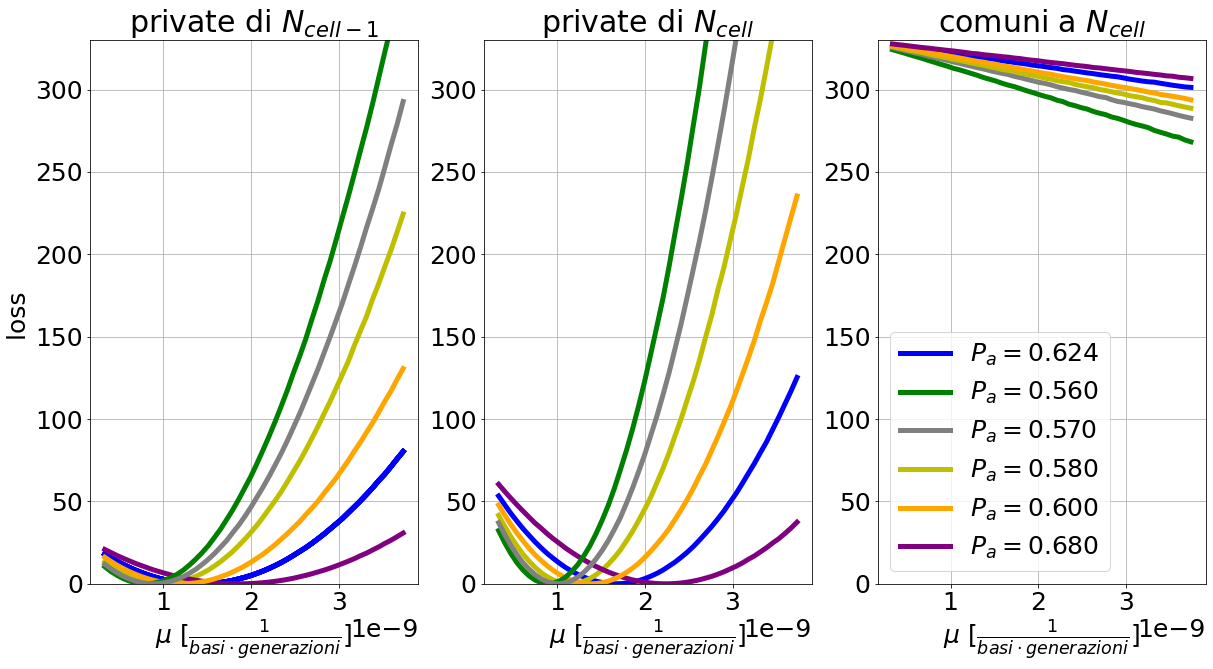

In [5]:
rami_err= np.loadtxt("C:../es_new/LC_CRC1307.txt", unpack='true')
mut_07=np.loadtxt("C:../es_new/mut_LC_CRC1307.txt", unpack='true')
mut_07_58=np.loadtxt("C:../es_new/mut_LC_CRC1307_Pa_0.59.txt", unpack='true')
mut_07_68=np.loadtxt("C:../es_new/mut_LC_CRC1307_Pa_0.68.txt", unpack='true')
mut_07_6=np.loadtxt("C:../es_new/mut_LC_CRC1307_Pa_0.6.txt", unpack='true')
mut_07_56=np.loadtxt("C:../es_new/mut_LC_CRC1307_Pa_0.56.txt", unpack='true')
mut_07_57=np.loadtxt("C:../es_new/mut_LC_CRC1307_Pa_0.57.txt", unpack='true')
plt.rcParams.update({'font.size': 25})
datia_07=np.array([993,912,1996,944,641,697])
datid_07=np.array([1024,953,1772,1762,2653,1574,1588,1561,943,910,880,903])
datie_07=np.array([1657,1647,1224,1251,1676,1709])
datif_07=np.array([2681,2600,3419,3877,2825,2812,2619,2556,2612])

n1=50
n_tr=1000
N_m=5595688850
N_b_15=5316401584
N_b_27=5072406807
N_b_LM=4818048167
N_b_PR=2495801608
N_b_07=4600467279
N_b_82=2748711013
N_b_82_7=820828872.5
mu=3.39448E-09
x=np.linspace(mu*0.1,mu*0.1+(50*mu*0.02), 50)
print(np.mean(datia_07)/(N_b_07*np.mean(rami_err[0])), np.mean(np.mean(datid_07)/(N_b_07*rami_err[1])))
mu_mean=1.52791982E-09

matr_a_07=np.zeros((n1,2))
mu_rate(matr_a_07, n1, mut_07[0] )
matr_d_07=np.zeros((n1,2))
mu_rate(matr_d_07, n1, mut_07[3] )
matr_e_07=np.zeros((n1,2))
mu_rate(matr_e_07, n1, mut_07[4] )

matr_a_07_58=np.zeros((n1,2))
mu_rate(matr_a_07_58, n1, mut_07_58[0] )
matr_d_07_58=np.zeros((n1,2))
mu_rate(matr_d_07_58, n1, mut_07_58[3] )
matr_e_07_58=np.zeros((n1,2))
mu_rate(matr_e_07_58, n1, mut_07_58[4] )


matr_a_07_68=np.zeros((n1,2))
mu_rate(matr_a_07_68, n1, mut_07_68[0] )
matr_d_07_68=np.zeros((n1,2))
mu_rate(matr_d_07_68, n1, mut_07_68[3] )
matr_e_07_68=np.zeros((n1,2))
mu_rate(matr_e_07_68, n1, mut_07_68[4] )

matr_a_07_6=np.zeros((n1,2))
mu_rate(matr_a_07_6, n1, mut_07_6[0] )
matr_d_07_6=np.zeros((n1,2))
mu_rate(matr_d_07_6, n1, mut_07_6[3] )
matr_e_07_6=np.zeros((n1,2))
mu_rate(matr_e_07_6, n1, mut_07_6[4] )


matr_a_07_56=np.zeros((n1,2))
mu_rate(matr_a_07_56, n1, mut_07_56[0] )
matr_d_07_56=np.zeros((n1,2))
mu_rate(matr_d_07_56, n1, mut_07_56[3] )
matr_e_07_56=np.zeros((n1,2))
mu_rate(matr_e_07_56, n1, mut_07_56[4] )

matr_a_07_57=np.zeros((n1,2))
mu_rate(matr_a_07_57, n1, mut_07_57[0] )
matr_d_07_57=np.zeros((n1,2))
mu_rate(matr_d_07_57, n1, mut_07_57[3] )
matr_e_07_57=np.zeros((n1,2))
mu_rate(matr_e_07_57, n1, mut_07_57[4] )

fig = plt.figure(figsize=(20, 10))
plt.subplot(1,3,1)
#plt.axhline(y=0, color='red', linestyle='dotted',linewidth=4 )
#plt.axvline(x=mu, color='black', linestyle='dotted',linewidth=4 )
#plt.axvline(x=mu_mean, color='brown', linestyle='dotted',linewidth=4)
for k in range(len(datia_07)):
    plt.plot(x, np.power((matr_a_07[:,0]-np.mean(datia_07))/np.sqrt(((np.power(matr_a_07[:,1],2)/n_tr) + (np.power(np.std(datia_07),2)/len(datia_07)) )),2), linestyle="solid",  color='b',  linewidth=5.0)
plt.plot(x, np.power((matr_a_07_58[:,0]-np.mean(datia_07))/np.sqrt(((np.power(matr_a_07_58[:,1],2)/n_tr) + (np.power(np.std(datia_07),2)/len(datia_07)))),2),  linestyle="solid", color='y',  linewidth=5.0)
plt.plot(x, np.power((matr_a_07_68[:,0]-np.mean(datia_07))/np.sqrt(((np.power(matr_a_07_68[:,1],2)/n_tr) + (np.power(np.std(datia_07),2)/len(datia_07)))) ,2),  linestyle="solid", color='purple',  linewidth=5.0)
plt.plot(x, np.power((matr_a_07_6[:,0]-np.mean(datia_07))/np.sqrt(((np.power(matr_a_07_6[:,1],2)/n_tr) + (np.power(np.std(datia_07),2)/len(datia_07)))) ,2),  linestyle="solid", color='orange',  linewidth=5.0)
plt.plot(x, np.power((matr_a_07_56[:,0]-np.mean(datia_07))/np.sqrt(((np.power(matr_a_07_56[:,1],2)/n_tr) + (np.power(np.std(datia_07),2)/len(datia_07)))) ,2),  linestyle="solid", color='g',  linewidth=5.0)
plt.plot(x, np.power((matr_a_07_57[:,0]-np.mean(datia_07))/np.sqrt(((np.power(matr_a_07_57[:,1],2)/n_tr) + (np.power(np.std(datia_07),2)/len(datia_07)))),2) ,  linestyle="solid", color='grey',  linewidth=5.0)
plt.xlabel(r'$\mu$ $[\frac{1}{basi \cdot generazioni}]$')
plt.ylabel(r'loss ')
plt.title(r'private di $N_{cell-1}$')
plt.grid(True)
plt.ylim(0, 330)     
#plt.xlim(0,50)
plt.subplot(1,3,2)
#plt.axhline(y=0, color='red', linestyle='dotted',linewidth=4 )
#plt.axvline(x=mu, color='black', linestyle='dotted',linewidth=4 )
#plt.axvline(x=mu_mean, color='brown', linestyle='dotted',linewidth=4)
plt.plot(x, np.power((matr_d_07[:,0]-np.mean(datid_07))/np.sqrt(((np.power(matr_d_07[:,1],2)/n_tr) + (np.power(np.std(datid_07),2)/len(datid_07)) )),2),  linestyle="solid",  color='b', linewidth=5.0)
plt.plot(x, np.power((matr_d_07_58[:,0]-np.mean(datid_07))/np.sqrt(((np.power(matr_d_07_58[:,1],2)/n_tr) + (np.power(np.std(datid_07),2)/len(datid_07)) )),2),  linestyle="solid", color='y', linewidth=5.0)
plt.plot(x, np.power((matr_d_07_68[:,0]-np.mean(datid_07))/np.sqrt(((np.power(matr_d_07_68[:,1],2)/n_tr) + (np.power(np.std(datid_07),2)/len(datid_07)) )),2),  linestyle="solid", color='purple', linewidth=5.0)
plt.plot(x, np.power((matr_d_07_6[:,0]-np.mean(datid_07))/np.sqrt(((np.power(matr_d_07_6[:,1],2)/n_tr) + (np.power(np.std(datid_07),2)/len(datid_07)) )),2),  linestyle="solid", color='orange', linewidth=5.0)
plt.plot(x, np.power((matr_d_07_56[:,0]-np.mean(datid_07))/np.sqrt(((np.power(matr_d_07_56[:,1],2)/n_tr) + (np.power(np.std(datid_07),2)/len(datid_07)) )),2),  linestyle="solid", color='g', linewidth=5.0)
plt.plot(x, np.power((matr_d_07_57[:,0]-np.mean(datid_07))/np.sqrt(((np.power(matr_d_07_57[:,1],2)/n_tr) + (np.power(np.std(datid_07),2)/len(datid_07)) )),2),  linestyle="solid", color='grey',  linewidth=5.0)
plt.xlabel(r'$\mu$ $[\frac{1}{basi \cdot generazioni}]$')
plt.title(r'private di $N_{cell}$')
plt.grid(True)
plt.ylim(0, 330)   
#plt.xlim(0,50)
plt.subplot(1,3,3)
#plt.axhline(y=0, color='red', linestyle='dotted',linewidth=4 )
#plt.axvline(x=mu, color='black', linestyle='dotted',linewidth=4 )
#plt.axvline(x=mu_mean, color='brown', linestyle='dotted',linewidth=4)
plt.plot(x, np.power((matr_e_07[:,0]-np.mean(datie_07))/np.sqrt(((np.power(matr_e_07[:,1],2)/n_tr) + (np.power(np.std(datie_07),2)/len(datie_07)) )),2), linestyle="solid", color='b',  linewidth=5.0,label=r'$P_a=0.624$')
plt.plot(x, np.power((matr_e_07_56[:,0]-np.mean(datie_07))/np.sqrt(((np.power(matr_e_07_56[:,1],2)/n_tr) + (np.power(np.std(datie_07),2)/len(datie_07)) )),2),  linestyle="solid", color='g', linewidth=5.0, label=r'$P_a=0.560$')
plt.plot(x, np.power((matr_e_07_57[:,0]-np.mean(datie_07))/np.sqrt(((np.power(matr_e_07_57[:,1],2)/n_tr) + (np.power(np.std(datie_07),2)/len(datie_07)) )),2),  linestyle="solid", color='grey',  linewidth=5.0, label=r'$P_a=0.570$')
plt.plot(x, np.power((matr_e_07_58[:,0]-np.mean(datie_07))/np.sqrt(((np.power(matr_e_07_58[:,1],2)/n_tr) + (np.power(np.std(datie_07),2)/len(datie_07)) )),2), linestyle="solid",color='y',  linewidth=5.0,label=r'$P_a=0.580$')   
plt.plot(x, np.power((matr_e_07_6[:,0]-np.mean(datie_07))/np.sqrt(((np.power(matr_e_07_6[:,1],2)/n_tr) + (np.power(np.std(datie_07),2)/len(datie_07)) )),2),  linestyle="solid", color='orange', linewidth=5.0, label=r'$P_a=0.600$')
plt.plot(x, np.power((matr_e_07_68[:,0]-np.mean(datie_07))/np.sqrt(((np.power(matr_e_07_68[:,1],2)/n_tr) + (np.power(np.std(datie_07),2)/len(datie_07)) )),2),  linestyle="solid", color='purple', linewidth=5.0, label=r'$P_a=0.680$')

plt.ylim(0, 330)  
plt.xlabel(r'$\mu$ $[\frac{1}{basi \cdot generazioni}]$')
plt.title(r'comuni a $N_{cell}$')

plt.legend()
#plt.xlim(0,50)
plt.grid(True)

## APPLICAZIONE DEL MODELLO A TUTTE LE LINEE CELLULARI STUDIATE IN LABORATORIO
I grafici sottostanti rappresentano l'applicazione al modello alle linee cellulari studiate in laboratorio.
Le linee tratteggiate sono presenti nel grafico utlizzato per stimare $\mu_{finale}$   indicano il valore massimo e minimo 
della stima di $\mu_{finale}$ .
Vedere i nomi dei file per capire i parametri utlizzati. 

### CRC1307

(0.0, 3e-09)

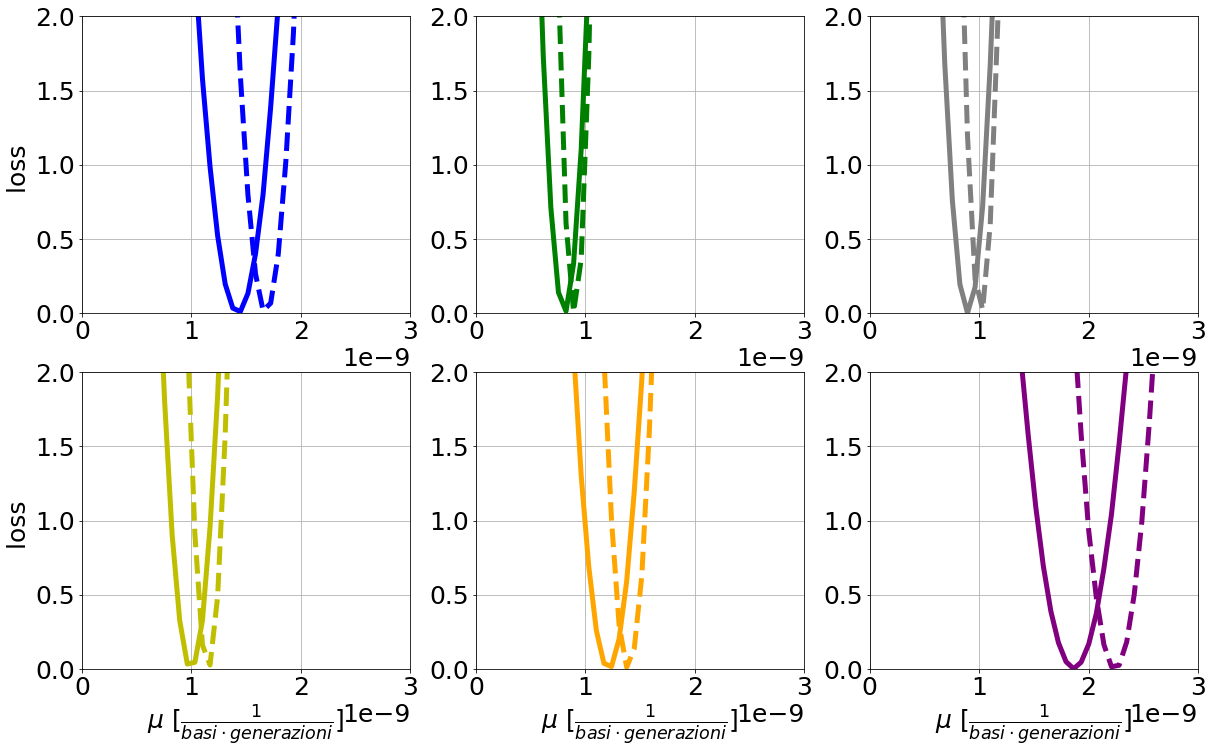

In [6]:
rami_err_07= np.loadtxt("C:../es_new/LC_CRC1307.txt", unpack='true')
mut_07=np.loadtxt("C:../es_new/mut_LC_CRC1307.txt", unpack='true')
mut_07_58=np.loadtxt("C:../es_new/mut_LC_CRC1307_Pa_0.59.txt", unpack='true')
mut_07_68=np.loadtxt("C:../es_new/mut_LC_CRC1307_Pa_0.68.txt", unpack='true')
mut_07_6=np.loadtxt("C:../es_new/mut_LC_CRC1307_Pa_0.6.txt", unpack='true')
mut_07_56=np.loadtxt("C:../es_new/mut_LC_CRC1307_Pa_0.56.txt", unpack='true')
mut_07_57=np.loadtxt("C:../es_new/mut_LC_CRC1307_Pa_0.57.txt", unpack='true')

datia_07=np.array([993,912,1996,944,641,697])
datid_07=np.array([1024,953,1772,1762,2653,1574,1588,1561,943,910,880,903])
datie_07=np.array([1657,1647,1224,1251,1676,1709])
datif_07=np.array([2681,2600,3419,3877,2825,2812,2619,2556,2612])

n1=50
n_tr=1000
N_m=5595688850
N_b_15=5316401584
N_b_27=5072406807
N_b_LM=4818048167
N_b_PR=2495801608
N_b_07=4600467279
N_b_82=2748711013
N_b_82_7=820828872.5
mu=3.39448E-09
x=np.linspace(mu*0.1,mu*0.1+(50*mu*0.02), 50)
mu_mean=1.52791982E-09
matr_a_07=np.zeros((n1,2))
mu_rate(matr_a_07, n1, mut_07[0] )
matr_d_07=np.zeros((n1,2))
mu_rate(matr_d_07, n1, mut_07[3] )
matr_e_07=np.zeros((n1,2))
mu_rate(matr_e_07, n1, mut_07[4] )

matr_a_07_58=np.zeros((n1,2))
mu_rate(matr_a_07_58, n1, mut_07_58[0] )
matr_d_07_58=np.zeros((n1,2))
mu_rate(matr_d_07_58, n1, mut_07_58[3] )
matr_e_07_58=np.zeros((n1,2))
mu_rate(matr_e_07_58, n1, mut_07_58[4] )


matr_a_07_68=np.zeros((n1,2))
mu_rate(matr_a_07_68, n1, mut_07_68[0] )
matr_d_07_68=np.zeros((n1,2))
mu_rate(matr_d_07_68, n1, mut_07_68[3] )
matr_e_07_68=np.zeros((n1,2))
mu_rate(matr_e_07_68, n1, mut_07_68[4] )

matr_a_07_6=np.zeros((n1,2))
mu_rate(matr_a_07_6, n1, mut_07_6[0] )
matr_d_07_6=np.zeros((n1,2))
mu_rate(matr_d_07_6, n1, mut_07_6[3] )
matr_e_07_6=np.zeros((n1,2))
mu_rate(matr_e_07_6, n1, mut_07_6[4] )


matr_a_07_56=np.zeros((n1,2))
mu_rate(matr_a_07_56, n1, mut_07_56[0] )
matr_d_07_56=np.zeros((n1,2))
mu_rate(matr_d_07_56, n1, mut_07_56[3] )
matr_e_07_56=np.zeros((n1,2))
mu_rate(matr_e_07_56, n1, mut_07_56[4] )

matr_a_07_57=np.zeros((n1,2))
mu_rate(matr_a_07_57, n1, mut_07_57[0] )
matr_d_07_57=np.zeros((n1,2))
mu_rate(matr_d_07_57, n1, mut_07_57[3] )
matr_e_07_57=np.zeros((n1,2))
mu_rate(matr_e_07_57, n1, mut_07_57[4] )

fig = plt.figure(figsize=(20, 12))
plt.subplot(2,3, 1)
plt.plot(x, np.power((matr_a_07[:,0]-np.mean(datia_07))/np.sqrt(((np.power(matr_a_07[:,1],2)/n_tr) + (np.power(np.std(datia_07),2)/len(datia_07)) )),2), linestyle="solid",  color='b',  linewidth=5.0)
plt.plot(x, np.power((matr_d_07[:,0]-np.mean(datid_07))/np.sqrt(((np.power(matr_d_07[:,1],2)/n_tr) + (np.power(np.std(datid_07),2)/len(datid_07)) )),2),  linestyle="--",  color='b', linewidth=5.0)
plt.ylim(0, 2)
plt.ylabel(r'loss ')
plt.grid(True)
plt.xlim(0, 3E-9)

plt.subplot(2,3, 4)
plt.plot(x, np.power((matr_a_07_58[:,0]-np.mean(datia_07))/np.sqrt(((np.power(matr_a_07_58[:,1],2)/n_tr) + (np.power(np.std(datia_07),2)/len(datia_07)))),2),  linestyle="solid", color='y',  linewidth=5.0)
plt.plot(x, np.power((matr_d_07_58[:,0]-np.mean(datid_07))/np.sqrt(((np.power(matr_d_07_58[:,1],2)/n_tr) + (np.power(np.std(datid_07),2)/len(datid_07)) )),2),  linestyle="--", color='y', linewidth=5.0)
plt.ylim(0, 2)
plt.grid(True)
plt.xlim(0, 3E-9)
plt.ylabel(r'loss ')
plt.xlabel(r'$\mu$ $[\frac{1}{basi \cdot generazioni}]$')
plt.subplot(2,3, 6)
plt.plot(x, np.power((matr_a_07_68[:,0]-np.mean(datia_07))/np.sqrt(((np.power(matr_a_07_68[:,1],2)/n_tr) + (np.power(np.std(datia_07),2)/len(datia_07)))) ,2),  linestyle="solid", color='purple',  linewidth=5.0)
plt.plot(x, np.power((matr_d_07_68[:,0]-np.mean(datid_07))/np.sqrt(((np.power(matr_d_07_68[:,1],2)/n_tr) + (np.power(np.std(datid_07),2)/len(datid_07)) )),2),  linestyle="--", color='purple', linewidth=5.0)
plt.ylim(0, 2)
plt.xlabel(r'$\mu$ $[\frac{1}{basi \cdot generazioni}]$')
plt.grid(True)
plt.xlim(0, 3E-9)

plt.subplot(2,3, 5)
plt.plot(x, np.power((matr_a_07_6[:,0]-np.mean(datia_07))/np.sqrt(((np.power(matr_a_07_6[:,1],2)/n_tr) + (np.power(np.std(datia_07),2)/len(datia_07)))) ,2),  linestyle="solid", color='orange',  linewidth=5.0)
plt.plot(x, np.power((matr_d_07_6[:,0]-np.mean(datid_07))/np.sqrt(((np.power(matr_d_07_6[:,1],2)/n_tr) + (np.power(np.std(datid_07),2)/len(datid_07)) )),2),  linestyle="--", color='orange', linewidth=5.0)
plt.xlabel(r'$\mu$ $[\frac{1}{basi \cdot generazioni}]$')


plt.ylim(0, 2)
plt.grid(True)
plt.xlim(0, 3E-9)

plt.subplot(2,3, 2)
plt.plot(x, np.power((matr_a_07_56[:,0]-np.mean(datia_07))/np.sqrt(((np.power(matr_a_07_56[:,1],2)/n_tr) + (np.power(np.std(datia_07),2)/len(datia_07)))) ,2),  linestyle="solid", color='g',  linewidth=5.0)
plt.plot(x, np.power((matr_d_07_56[:,0]-np.mean(datid_07))/np.sqrt(((np.power(matr_d_07_56[:,1],2)/n_tr) + (np.power(np.std(datid_07),2)/len(datid_07)) )),2), linestyle="--", color='g', linewidth=5.0)


plt.grid(True)
plt.ylim(0, 2)
plt.xlim(0, 3E-9)

plt.subplot(2,3, 3)   
plt.plot(x, np.power((matr_a_07_57[:,0]-np.mean(datia_07))/np.sqrt(((np.power(matr_a_07_57[:,1],2)/n_tr) + (np.power(np.std(datia_07),2)/len(datia_07)))),2) ,  linestyle="solid", color='grey',  linewidth=5.0)
plt.plot(x, np.power((matr_d_07_57[:,0]-np.mean(datid_07))/np.sqrt(((np.power(matr_d_07_57[:,1],2)/n_tr) + (np.power(np.std(datid_07),2)/len(datid_07)) )),2),  linestyle="--", color='grey',  linewidth=5.0)


plt.grid(True) 
plt.ylim(0, 2)
plt.xlim(0, 3E-9)


[3.39448000e-10 4.08723102e-10 4.77998204e-10 5.47273306e-10
 6.16548408e-10 6.85823510e-10 7.55098612e-10 8.24373714e-10
 8.93648816e-10 9.62923918e-10 1.03219902e-09 1.10147412e-09
 1.17074922e-09 1.24002433e-09 1.30929943e-09 1.37857453e-09
 1.44784963e-09 1.51712473e-09 1.58639984e-09 1.65567494e-09
 1.72495004e-09 1.79422514e-09 1.86350024e-09 1.93277535e-09
 2.00205045e-09 2.07132555e-09 2.14060065e-09 2.20987576e-09
 2.27915086e-09 2.34842596e-09 2.41770106e-09 2.48697616e-09
 2.55625127e-09 2.62552637e-09 2.69480147e-09 2.76407657e-09
 2.83335167e-09 2.90262678e-09 2.97190188e-09 3.04117698e-09
 3.11045208e-09 3.17972718e-09 3.24900229e-09 3.31827739e-09
 3.38755249e-09 3.45682759e-09 3.52610269e-09 3.59537780e-09
 3.66465290e-09 3.73392800e-09]


(0.0, 3e-09)

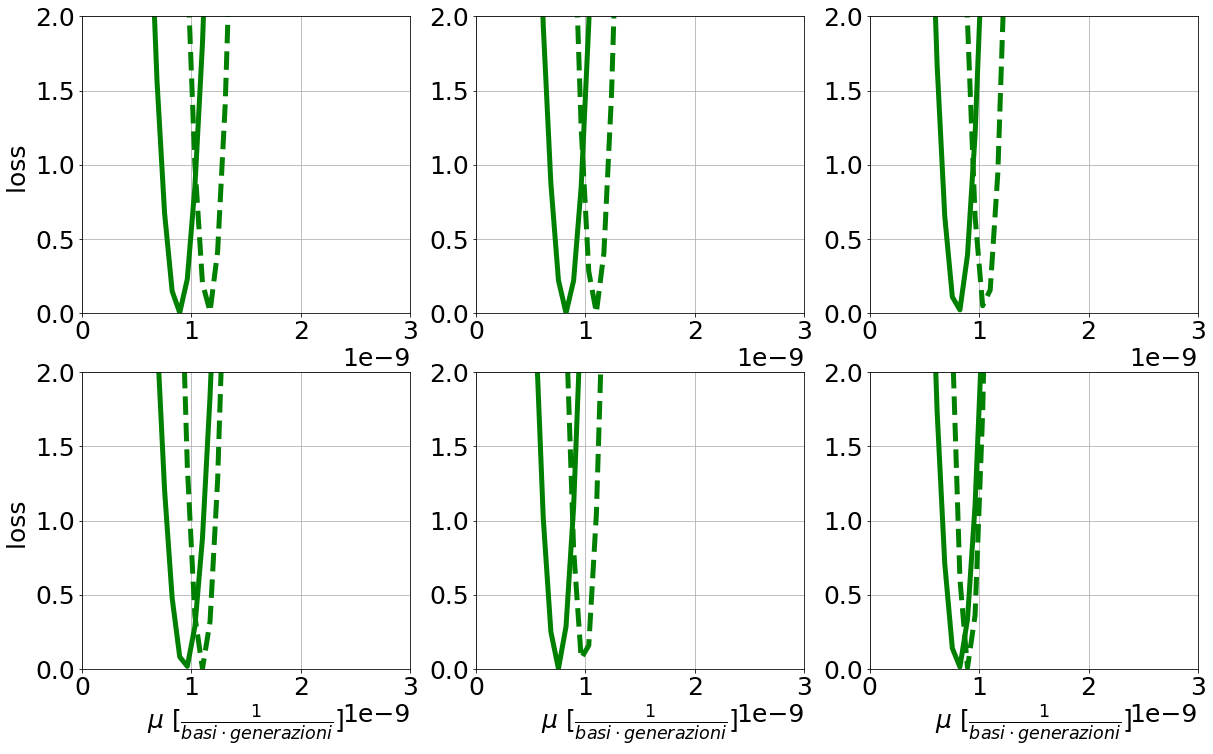

In [8]:
rami_err_07= np.loadtxt("C:../es_new/LC_CRC1307_Pa_0.56.txt", unpack='true')
mut_07_6=np.loadtxt("C:../es_new/mut_LC_CRC1307_Pa_0.56.txt", unpack='true')
mut_07_160=np.loadtxt("C:../es_new/mut_LC_CRC1307_Pa_0.56_ngen0_160.txt", unpack='true')
mut_07_150=np.loadtxt("C:../es_new/mut_LC_CRC1307_Pa_0.56_ngen0_150.txt", unpack='true')
mut_07_170=np.loadtxt("C:../es_new/mut_LC_CRC1307_Pa_0.56_ngen0_170.txt", unpack='true')
mut_07_130=np.loadtxt("C:../es_new/mut_LC_CRC1307_Pa_0.56_ngen0_130.txt", unpack='true')
mut_07_140=np.loadtxt("C:../es_new/mut_LC_CRC1307_Pa_0.56_ngen0_140.txt", unpack='true')
datia_07=np.array([993,912,1996,944,641,697])
datid_07=np.array([1024,953,1772,1762,2653,1574,1588,1561,943,910,880,903])
datie_07=np.array([1657,1647,1224,1251,1676,1709])
datif_07=np.array([2681,2600,3419,3877,2825,2812,2619,2556,2612])

n1=50
n_tr=1000
N_m=5595688850
N_b_15=5316401584
N_b_27=5072406807
N_b_LM=4818048167
N_b_PR=2495801608
N_b_07=4600467279
N_b_82=2748711013
N_b_82_7=820828872.5
mu=3.39448E-09
x=np.linspace(mu*0.1,mu*0.1+(50*mu*0.02), 50)
print(x)
matr_a_07_170=np.zeros((n1,2))
mu_rate(matr_a_07_170, n1, mut_07_170[0] )
matr_d_07_170=np.zeros((n1,2))
mu_rate(matr_d_07_170, n1, mut_07_170[3] )
matr_e_07_170=np.zeros((n1,2))
mu_rate(matr_e_07_170, n1, mut_07_170[4] )

matr_a_07_6=np.zeros((n1,2))
mu_rate(matr_a_07_6, n1, mut_07_6[0] )
matr_d_07_6=np.zeros((n1,2))
mu_rate(matr_d_07_6, n1, mut_07_6[3] )
matr_e_07_6=np.zeros((n1,2))
mu_rate(matr_e_07_6, n1, mut_07_6[4] )

matr_a_07_150=np.zeros((n1,2))
mu_rate(matr_a_07_150, n1, mut_07_150[0] )
matr_d_07_150=np.zeros((n1,2))
mu_rate(matr_d_07_150, n1, mut_07_150[3] )
matr_e_07_150=np.zeros((n1,2))
mu_rate(matr_e_07_150, n1, mut_07_150[4] )


matr_a_07_160=np.zeros((n1,2))
mu_rate(matr_a_07_160, n1, mut_07_160[0] )
matr_d_07_160=np.zeros((n1,2))
mu_rate(matr_d_07_160, n1, mut_07_160[3] )
matr_e_07_160=np.zeros((n1,2))
mu_rate(matr_e_07_160, n1, mut_07_160[4] )

matr_a_07_130=np.zeros((n1,2))
mu_rate(matr_a_07_130, n1, mut_07_130[0] )
matr_d_07_130=np.zeros((n1,2))
mu_rate(matr_d_07_130, n1, mut_07_130[3] )
matr_e_07_130=np.zeros((n1,2))
mu_rate(matr_e_07_130, n1, mut_07_130[4] )


matr_a_07_140=np.zeros((n1,2))
mu_rate(matr_a_07_140, n1, mut_07_140[0] )
matr_d_07_140=np.zeros((n1,2))
mu_rate(matr_d_07_140, n1, mut_07_140[3] )
matr_e_07_140=np.zeros((n1,2))
mu_rate(matr_e_07_140, n1, mut_07_140[4] )

fig = plt.figure(figsize=(20, 12))

plt.axhline(y=0, color='red', linestyle='dotted',linewidth=4 )

plt.subplot(2,3, 1)
plt.plot(x, np.power((matr_a_07_130[:,0]-np.mean(datia_07))/np.sqrt(((np.power(matr_a_07_130[:,1],2)/n_tr) + (np.power(np.std(datia_07),2)/len(datia_07)))) ,2),  linestyle="solid", color='g',  linewidth=5.0)
plt.plot(x, np.power((matr_d_07_130[:,0]-np.mean(datid_07))/np.sqrt(((np.power(matr_d_07_130[:,1],2)/n_tr) + (np.power(np.std(datid_07),2)/len(datid_07)) )),2),  linestyle="--", color='g', linewidth=5.0)
plt.ylim(0, 2)

plt.ylabel(r'loss ')
plt.grid(True)
plt.xlim(0, 3E-9)

plt.subplot(2,3,2)
plt.plot(x, np.power((matr_a_07_140[:,0]-np.mean(datia_07))/np.sqrt(((np.power(matr_a_07_140[:,1],2)/n_tr) + (np.power(np.std(datia_07),2)/len(datia_07)))) ,2),  linestyle="solid", color='g',  linewidth=5.0)
plt.plot(x, np.power((matr_d_07_140[:,0]-np.mean(datid_07))/np.sqrt(((np.power(matr_d_07_140[:,1],2)/n_tr) + (np.power(np.std(datid_07),2)/len(datid_07)) )),2),  linestyle="--", color='g', linewidth=5.0)


plt.ylim(0, 2)
plt.grid(True)
plt.xlim(0, 3E-9)

plt.subplot(2,3,3)
plt.plot(x, np.power((matr_a_07_150[:,0]-np.mean(datia_07))/np.sqrt(((np.power(matr_a_07_150[:,1],2)/n_tr) + (np.power(np.std(datia_07),2)/len(datia_07)))) ,2),  linestyle="solid", color='g',  linewidth=5.0)
plt.plot(x, np.power((matr_d_07_150[:,0]-np.mean(datid_07))/np.sqrt(((np.power(matr_d_07_150[:,1],2)/n_tr) + (np.power(np.std(datid_07),2)/len(datid_07)) )),2), linestyle="--", color='g', linewidth=5.0)


plt.grid(True)
plt.ylim(0, 2)
plt.xlim(0, 3E-9)

plt.subplot(2,3,4)
plt.plot(x, np.power((matr_a_07_160[:,0]-np.mean(datia_07))/np.sqrt(((np.power(matr_a_07_160[:,1],2)/n_tr) + (np.power(np.std(datia_07),2)/len(datia_07)))) ,2),  linestyle="solid", color='g',  linewidth=5.0)
plt.plot(x, np.power((matr_d_07_160[:,0]-np.mean(datid_07))/np.sqrt(((np.power(matr_d_07_160[:,1],2)/n_tr) + (np.power(np.std(datid_07),2)/len(datid_07)) )),2), linestyle="--", color='g', linewidth=5.0)
plt.xlabel(r'$\mu$ $[\frac{1}{basi \cdot generazioni}]$')
plt.ylabel(r'loss ')
plt.grid(True)
plt.ylim(0, 2)
plt.xlim(0, 3E-9)

plt.subplot( 2,3,  5)
plt.plot(x, np.power((matr_a_07_170[:,0]-np.mean(datia_07))/np.sqrt(((np.power(matr_a_07_170[:,1],2)/n_tr) + (np.power(np.std(datia_07),2)/len(datia_07)))) ,2),  linestyle="solid", color='g',  linewidth=5.0)
plt.plot(x, np.power((matr_d_07_170[:,0]-np.mean(datid_07))/np.sqrt(((np.power(matr_d_07_170[:,1],2)/n_tr) + (np.power(np.std(datid_07),2)/len(datid_07)) )),2), linestyle="--", color='g', linewidth=5.0)

plt.xlabel(r'$\mu$ $[\frac{1}{basi \cdot generazioni}]$')
plt.grid(True)
plt.ylim(0, 2)
plt.xlim(0, 3E-9)

plt.subplot(2, 3, 6)

plt.plot(x, np.power((matr_a_07_6[:,0]-np.mean(datia_07))/np.sqrt(((np.power(matr_a_07_6[:,1],2)/n_tr) + (np.power(np.std(datia_07),2)/len(datia_07)))) ,2),  linestyle="solid", color='g',  linewidth=5.0)
plt.plot(x, np.power((matr_d_07_6[:,0]-np.mean(datid_07))/np.sqrt(((np.power(matr_d_07_6[:,1],2)/n_tr) + (np.power(np.std(datid_07),2)/len(datid_07)) )),2), linestyle="--", color='g', linewidth=5.0)
plt.xlabel(r'$\mu$ $[\frac{1}{basi \cdot generazioni}]$')

plt.grid(True)
plt.ylim(0, 2)
plt.xlim(0, 3E-9)







### CRC0441 7

(0.0, 3e-09)

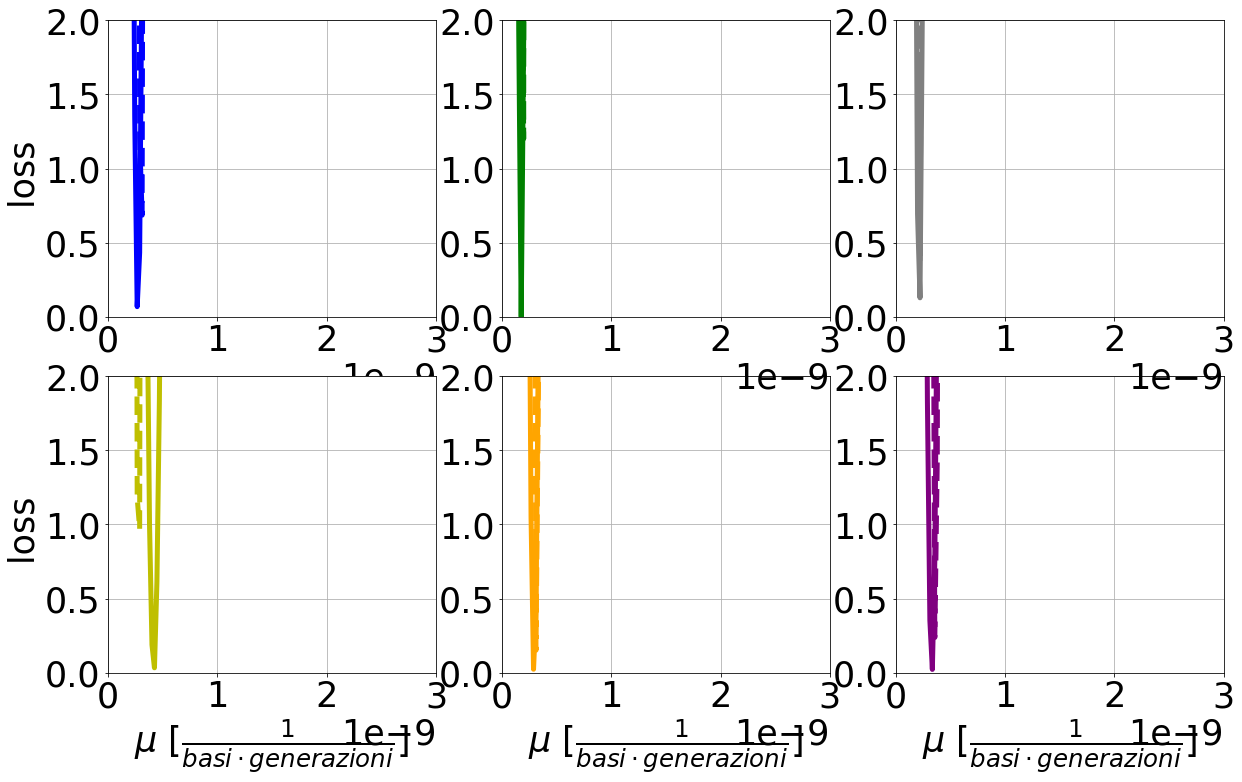

In [8]:
rami_err= np.loadtxt("C:../es_new/LC_CRC0441_7.txt", unpack='true')
mut=np.loadtxt("C:../es_new/mut_LC_CRC0441_7.txt", unpack='true')
mut_58=np.loadtxt("C:../es_new/mut_LC_CRC0441_7_Pa_0.56.txt", unpack='true')
mut_68=np.loadtxt("C:../es_new/mut_LC_CRC0441_7_Pa_0.58.txt", unpack='true')
mut_6=np.loadtxt("C:../es_new/mut_LC_CRC0441_7_Pa_0.57.txt", unpack='true')
mut_56=np.loadtxt("C:../es_new/mut_LC_CRC0441_7_Pa_0.54.txt", unpack='true')
mut_57=np.loadtxt("C:../es_new/mut_LC_CRC0441_7_Pa_0.55.txt", unpack='true')

datia=np.array([558,432])
datid=np.array([527,549,626,522])
datie=np.array([1548,1526])
datif=np.array([2174,2048,2075])


n1=50
n_tr=1000
N_m=5595688850
N_b_15=5316401584
N_b_27=5072406807
N_b_LM=4818048167
N_b_PR=2495801608
N_b_07=4600467279
N_b_82=2748711013
N_b_82_7=820828872.5
mu=1.10482E-9
x=np.linspace(mu*0.1,mu*0.1+(50*mu*0.02), 50)
mu_mean=1.52791982E-09
matr_a=np.zeros((n1,2))
mu_rate(matr_a, n1, mut[0] )
matr_d=np.zeros((n1,2))
mu_rate(matr_d, n1, mut[3] )
matr_e=np.zeros((n1,2))
mu_rate(matr_e, n1, mut[4] )

matr_a_58=np.zeros((n1,2))
mu_rate(matr_a_58, n1, mut_58[0] )
matr_d_58=np.zeros((n1,2))
mu_rate(matr_d_58, n1, mut_58[3] )
matr_e_58=np.zeros((n1,2))
mu_rate(matr_e_58, n1, mut_58[4] )


matr_a_68=np.zeros((n1,2))
mu_rate(matr_a_68, n1, mut_68[0] )
matr_d_68=np.zeros((n1,2))
mu_rate(matr_d_68, n1, mut_68[3] )
matr_e_68=np.zeros((n1,2))
mu_rate(matr_e_68, n1, mut_68[4] )

matr_a_6=np.zeros((n1,2))
mu_rate(matr_a_6, n1, mut_6[0] )
matr_d_6=np.zeros((n1,2))
mu_rate(matr_d_6, n1, mut_6[3] )
matr_e_6=np.zeros((n1,2))
mu_rate(matr_e_6, n1, mut_6[4] )


matr_a_56=np.zeros((n1,2))
mu_rate(matr_a_56, n1, mut_56[0] )
matr_d_56=np.zeros((n1,2))
mu_rate(matr_d_56, n1, mut_56[3] )
matr_e_56=np.zeros((n1,2))
mu_rate(matr_e_56, n1, mut_56[4] )

matr_a_57=np.zeros((n1,2))
mu_rate(matr_a_57, n1, mut_57[0] )
matr_d_57=np.zeros((n1,2))
mu_rate(matr_d_57, n1, mut_57[3] )
matr_e_57=np.zeros((n1,2))
mu_rate(matr_e_57, n1, mut_57[4] )

fig = plt.figure(figsize=(20, 12))
plt.subplot(2,3, 1)
plt.plot(x, np.power((matr_a[:,0]-np.mean(datia))/np.sqrt(((np.power(matr_a[:,1],2)/n_tr) + (np.power(np.std(datia),2)/len(datia)) )),2), linestyle="solid",  color='b',  linewidth=5.0)
plt.plot(x, np.power((matr_d[:,0]-np.mean(datid))/np.sqrt(((np.power(matr_d[:,1],2)/n_tr) + (np.power(np.std(datid),2)/len(datid)) )),2),  linestyle="--",  color='b', linewidth=5.0)
plt.ylim(0, 2)
plt.ylabel(r'loss ')
plt.grid(True)
plt.xlim(0, 3E-9)

plt.subplot(2,3, 4)
plt.plot(x, np.power((matr_a_58[:,0]-np.mean(datia))/np.sqrt(((np.power(matr_a_58[:,1],2)/n_tr) + (np.power(np.std(datia),2)/len(datia)))),2),  linestyle="solid", color='y',  linewidth=5.0)
plt.plot(x, np.power((matr_d_58[:,0]-np.mean(datid))/np.sqrt(((np.power(matr_d_58[:,1],2)/n_tr) + (np.power(np.std(datid),2)/len(datid)) )),2),  linestyle="--", color='y', linewidth=5.0)
plt.ylim(0, 2)
plt.grid(True)
plt.xlim(0, 3E-9)
plt.ylabel(r'loss ')
plt.xlabel(r'$\mu$ $[\frac{1}{basi \cdot generazioni}]$')
plt.subplot(2,3, 6)
plt.plot(x, np.power((matr_a_68[:,0]-np.mean(datia))/np.sqrt(((np.power(matr_a_68[:,1],2)/n_tr) + (np.power(np.std(datia),2)/len(datia)))) ,2),  linestyle="solid", color='purple',  linewidth=5.0)
plt.plot(x, np.power((matr_d_68[:,0]-np.mean(datid))/np.sqrt(((np.power(matr_d_68[:,1],2)/n_tr) + (np.power(np.std(datid),2)/len(datid)) )),2),  linestyle="--", color='purple', linewidth=5.0)
plt.ylim(0, 2)
plt.xlabel(r'$\mu$ $[\frac{1}{basi \cdot generazioni}]$')
plt.grid(True)
plt.xlim(0, 3E-9)

plt.subplot(2,3, 5)
plt.plot(x, np.power((matr_a_6[:,0]-np.mean(datia))/np.sqrt(((np.power(matr_a_6[:,1],2)/n_tr) + (np.power(np.std(datia),2)/len(datia)))) ,2),  linestyle="solid", color='orange',  linewidth=5.0)
plt.plot(x, np.power((matr_d_6[:,0]-np.mean(datid))/np.sqrt(((np.power(matr_d_6[:,1],2)/n_tr) + (np.power(np.std(datid),2)/len(datid)) )),2),  linestyle="--", color='orange', linewidth=5.0)
plt.xlabel(r'$\mu$ $[\frac{1}{basi \cdot generazioni}]$')


plt.ylim(0, 2)
plt.grid(True)
plt.xlim(0, 3E-9)

plt.subplot(2,3, 2)
plt.plot(x, np.power((matr_a_56[:,0]-np.mean(datia))/np.sqrt(((np.power(matr_a_56[:,1],2)/n_tr) + (np.power(np.std(datia),2)/len(datia)))) ,2),  linestyle="solid", color='g',  linewidth=5.0)
plt.plot(x, np.power((matr_d_56[:,0]-np.mean(datid))/np.sqrt(((np.power(matr_d_56[:,1],2)/n_tr) + (np.power(np.std(datid),2)/len(datid)) )),2), linestyle="--", color='g', linewidth=5.0)


plt.grid(True)
plt.ylim(0, 2)
plt.xlim(0, 3E-9)

plt.subplot(2,3, 3)   
plt.plot(x, np.power((matr_a_57[:,0]-np.mean(datia))/np.sqrt(((np.power(matr_a_57[:,1],2)/n_tr) + (np.power(np.std(datia),2)/len(datia)))),2) ,  linestyle="solid", color='grey',  linewidth=5.0)
plt.plot(x, np.power((matr_d_57[:,0]-np.mean(datid))/np.sqrt(((np.power(matr_d_57[:,1],2)/n_tr) + (np.power(np.std(datid),2)/len(datid)) )),2),  linestyle="--", color='grey',  linewidth=5.0)


plt.grid(True) 
plt.ylim(0, 2)
plt.xlim(0, 3E-9)


[8.57421000e-11 1.03240488e-10 1.20738876e-10 1.38237263e-10
 1.55735651e-10 1.73234039e-10 1.90732427e-10 2.08230814e-10
 2.25729202e-10 2.43227590e-10 2.60725978e-10 2.78224365e-10
 2.95722753e-10 3.13221141e-10 3.30719529e-10 3.48217916e-10
 3.65716304e-10 3.83214692e-10 4.00713080e-10 4.18211467e-10
 4.35709855e-10 4.53208243e-10 4.70706631e-10 4.88205018e-10
 5.05703406e-10 5.23201794e-10 5.40700182e-10 5.58198569e-10
 5.75696957e-10 5.93195345e-10 6.10693733e-10 6.28192120e-10
 6.45690508e-10 6.63188896e-10 6.80687284e-10 6.98185671e-10
 7.15684059e-10 7.33182447e-10 7.50680835e-10 7.68179222e-10
 7.85677610e-10 8.03175998e-10 8.20674386e-10 8.38172773e-10
 8.55671161e-10 8.73169549e-10 8.90667937e-10 9.08166324e-10
 9.25664712e-10 9.43163100e-10]


(0.0, 1e-09)

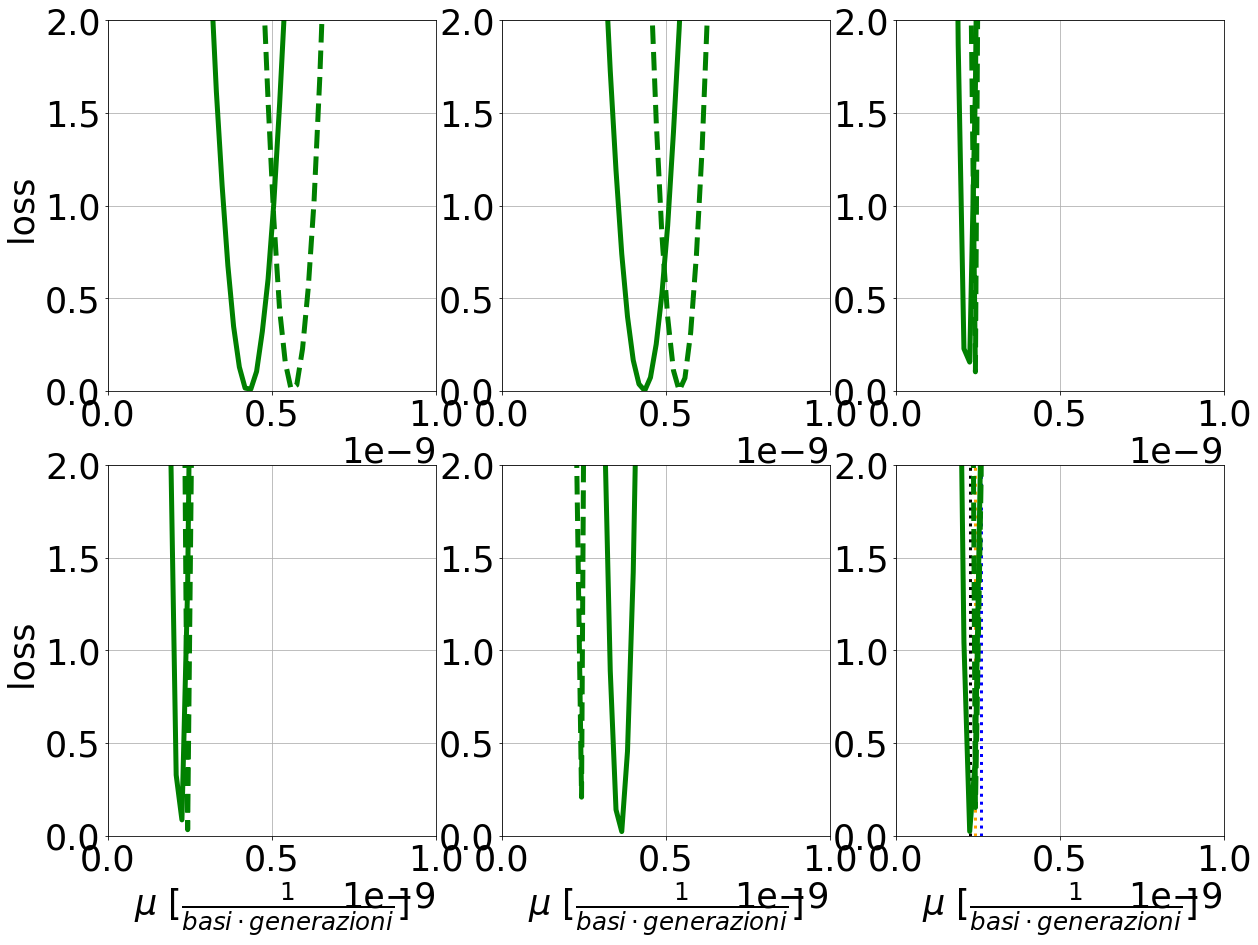

In [8]:
rami_err_07= np.loadtxt("C:../es_new/LC_CRC0441_7_Pa_0.57.txt", unpack='true')
mut_07_6=np.loadtxt("C:../es_new/mut_LC_CRC0441_7_Pa_0.57.txt", unpack='true')
mut_07_160=np.loadtxt("C:../es_new/mut_LC_CRC0441_7_Pa_0.57_ngen0_110.txt", unpack='true')
mut_07_150=np.loadtxt("C:../es_new/mut_LC_CRC0441_7_Pa_0.57_ngen0_120.txt", unpack='true')
mut_07_170=np.loadtxt("C:../es_new/mut_LC_CRC0441_7_Pa_0.57_ngen0_130.txt", unpack='true')
mut_07_130=np.loadtxt("C:../es_new/mut_LC_CRC0441_7_Pa_0.57_ngen0_140.txt", unpack='true')
mut_07_140=np.loadtxt("C:../es_new/mut_LC_CRC0441_7_Pa_0.57_ngen0_150.txt", unpack='true')
datia=np.array([558,432])
datid=np.array([527,549,626,522])
datie=np.array([1548,1526])
datif=np.array([2174,2048,2075])

n1=50
n_tr=1000
N_m=5595688850
N_b_15=5316401584
N_b_27=5072406807
N_b_LM=4818048167
N_b_PR=2495801608
N_b_07=4600467279
N_b_82=2748711013
N_b_82_7=820828872.5
mu=8.57421E-10
x=np.linspace(mu*0.1,mu*0.1+(50*mu*0.02), 50)
print(x)
matr_a_07_170=np.zeros((n1,2))
mu_rate(matr_a_07_170, n1, mut_07_170[0] )
matr_d_07_170=np.zeros((n1,2))
mu_rate(matr_d_07_170, n1, mut_07_170[3] )
matr_e_07_170=np.zeros((n1,2))
mu_rate(matr_e_07_170, n1, mut_07_170[4] )

matr_a_07_6=np.zeros((n1,2))
mu_rate(matr_a_07_6, n1, mut_07_6[0] )
matr_d_07_6=np.zeros((n1,2))
mu_rate(matr_d_07_6, n1, mut_07_6[3] )
matr_e_07_6=np.zeros((n1,2))
mu_rate(matr_e_07_6, n1, mut_07_6[4] )

matr_a_07_150=np.zeros((n1,2))
mu_rate(matr_a_07_150, n1, mut_07_150[0] )
matr_d_07_150=np.zeros((n1,2))
mu_rate(matr_d_07_150, n1, mut_07_150[3] )
matr_e_07_150=np.zeros((n1,2))
mu_rate(matr_e_07_150, n1, mut_07_150[4] )


matr_a_07_160=np.zeros((n1,2))
mu_rate(matr_a_07_160, n1, mut_07_160[0] )
matr_d_07_160=np.zeros((n1,2))
mu_rate(matr_d_07_160, n1, mut_07_160[3] )
matr_e_07_160=np.zeros((n1,2))
mu_rate(matr_e_07_160, n1, mut_07_160[4] )

matr_a_07_130=np.zeros((n1,2))
mu_rate(matr_a_07_130, n1, mut_07_130[0] )
matr_d_07_130=np.zeros((n1,2))
mu_rate(matr_d_07_130, n1, mut_07_130[3] )
matr_e_07_130=np.zeros((n1,2))
mu_rate(matr_e_07_130, n1, mut_07_130[4] )


matr_a_07_140=np.zeros((n1,2))
mu_rate(matr_a_07_140, n1, mut_07_140[0] )
matr_d_07_140=np.zeros((n1,2))
mu_rate(matr_d_07_140, n1, mut_07_140[3] )
matr_e_07_140=np.zeros((n1,2))
mu_rate(matr_e_07_140, n1, mut_07_140[4] )

fig = plt.figure(figsize=(20, 15))


plt.subplot(2,3, 1)
plt.plot(x, np.power((matr_a_07_130[:,0]-np.mean(datia_07))/np.sqrt(((np.power(matr_a_07_130[:,1],2)/n_tr) + (np.power(np.std(datia_07),2)/len(datia_07)))) ,2),  linestyle="solid", color='g',  linewidth=5.0)
plt.plot(x, np.power((matr_d_07_130[:,0]-np.mean(datid_07))/np.sqrt(((np.power(matr_d_07_130[:,1],2)/n_tr) + (np.power(np.std(datid_07),2)/len(datid_07)) )),2),  linestyle="--", color='g', linewidth=5.0)
plt.ylim(0, 2)

plt.ylabel(r'loss ')
plt.grid(True)
plt.xlim(0, 1E-9)

plt.subplot(2,3,2)
plt.plot(x, np.power((matr_a_07_140[:,0]-np.mean(datia_07))/np.sqrt(((np.power(matr_a_07_140[:,1],2)/n_tr) + (np.power(np.std(datia_07),2)/len(datia_07)))) ,2),  linestyle="solid", color='g',  linewidth=5.0)
plt.plot(x, np.power((matr_d_07_140[:,0]-np.mean(datid_07))/np.sqrt(((np.power(matr_d_07_140[:,1],2)/n_tr) + (np.power(np.std(datid_07),2)/len(datid_07)) )),2),  linestyle="--", color='g', linewidth=5.0)


plt.ylim(0, 2)
plt.grid(True)
plt.xlim(0, 1E-9)

plt.subplot(2,3,3)
plt.plot(x, np.power((matr_a_07_150[:,0]-np.mean(datia))/np.sqrt(((np.power(matr_a_07_150[:,1],2)/n_tr) + (np.power(np.std(datia),2)/len(datia)))) ,2),  linestyle="solid", color='g',  linewidth=5.0)
plt.plot(x, np.power((matr_d_07_150[:,0]-np.mean(datid))/np.sqrt(((np.power(matr_d_07_150[:,1],2)/n_tr) + (np.power(np.std(datid),2)/len(datid)) )),2), linestyle="--", color='g', linewidth=5.0)


plt.grid(True)
plt.ylim(0, 2)
plt.xlim(0, 1E-9)

plt.subplot(2,3,4)
plt.plot(x, np.power((matr_a_07_160[:,0]-np.mean(datia))/np.sqrt(((np.power(matr_a_07_160[:,1],2)/n_tr) + (np.power(np.std(datia),2)/len(datia)))) ,2),  linestyle="solid", color='g',  linewidth=5.0)
plt.plot(x, np.power((matr_d_07_160[:,0]-np.mean(datid))/np.sqrt(((np.power(matr_d_07_160[:,1],2)/n_tr) + (np.power(np.std(datid),2)/len(datid)) )),2), linestyle="--", color='g', linewidth=5.0)
plt.xlabel(r'$\mu$ $[\frac{1}{basi \cdot generazioni}]$')
plt.ylabel(r'loss ')
plt.grid(True)
plt.ylim(0, 2)
plt.xlim(0, 1E-9)

plt.subplot( 2,3,  5)
plt.plot(x, np.power((matr_a_07_170[:,0]-np.mean(datia))/np.sqrt(((np.power(matr_a_07_170[:,1],2)/n_tr) + (np.power(np.std(datia),2)/len(datia)))) ,2),  linestyle="solid", color='g',  linewidth=5.0)
plt.plot(x, np.power((matr_d_07_170[:,0]-np.mean(datid))/np.sqrt(((np.power(matr_d_07_170[:,1],2)/n_tr) + (np.power(np.std(datid),2)/len(datid)) )),2), linestyle="--", color='g', linewidth=5.0)

plt.xlabel(r'$\mu$ $[\frac{1}{basi \cdot generazioni}]$')
plt.grid(True)
plt.ylim(0, 2)
plt.xlim(0, 1E-9)

plt.subplot(2, 3, 6)
plt.axvline(x= 2.43227590e-10 , color= 'orange', linewidth=3.0,linestyle='dotted')
plt.axvline(x=  2.60725978e-10 , color= 'b', linewidth=3.0,linestyle='dotted')
plt.axvline(x=   2.25729202e-10 , color= 'black', linewidth=3.0,linestyle='dotted')
plt.plot(x, np.power((matr_a_07_6[:,0]-np.mean(datia))/np.sqrt(((np.power(matr_a_07_6[:,1],2)/n_tr) + (np.power(np.std(datia),2)/len(datia)))) ,2),  linestyle="solid", color='g',  linewidth=5.0)
plt.plot(x, np.power((matr_d_07_6[:,0]-np.mean(datid))/np.sqrt(((np.power(matr_d_07_6[:,1],2)/n_tr) + (np.power(np.std(datid),2)/len(datid)) )),2), linestyle="--", color='g', linewidth=5.0)
plt.xlabel(r'$\mu$ $[\frac{1}{basi \cdot generazioni}]$')

plt.grid(True)
plt.ylim(0, 2)
plt.xlim(0, 1E-9)







### CRC0441 

[1.10482000e-10 1.33029347e-10 1.55576694e-10 1.78124041e-10
 2.00671388e-10 2.23218735e-10 2.45766082e-10 2.68313429e-10
 2.90860776e-10 3.13408122e-10 3.35955469e-10 3.58502816e-10
 3.81050163e-10 4.03597510e-10 4.26144857e-10 4.48692204e-10
 4.71239551e-10 4.93786898e-10 5.16334245e-10 5.38881592e-10
 5.61428939e-10 5.83976286e-10 6.06523633e-10 6.29070980e-10
 6.51618327e-10 6.74165673e-10 6.96713020e-10 7.19260367e-10
 7.41807714e-10 7.64355061e-10 7.86902408e-10 8.09449755e-10
 8.31997102e-10 8.54544449e-10 8.77091796e-10 8.99639143e-10
 9.22186490e-10 9.44733837e-10 9.67281184e-10 9.89828531e-10
 1.01237588e-09 1.03492322e-09 1.05747057e-09 1.08001792e-09
 1.10256527e-09 1.12511261e-09 1.14765996e-09 1.17020731e-09
 1.19275465e-09 1.21530200e-09]


(0.0, 3e-09)

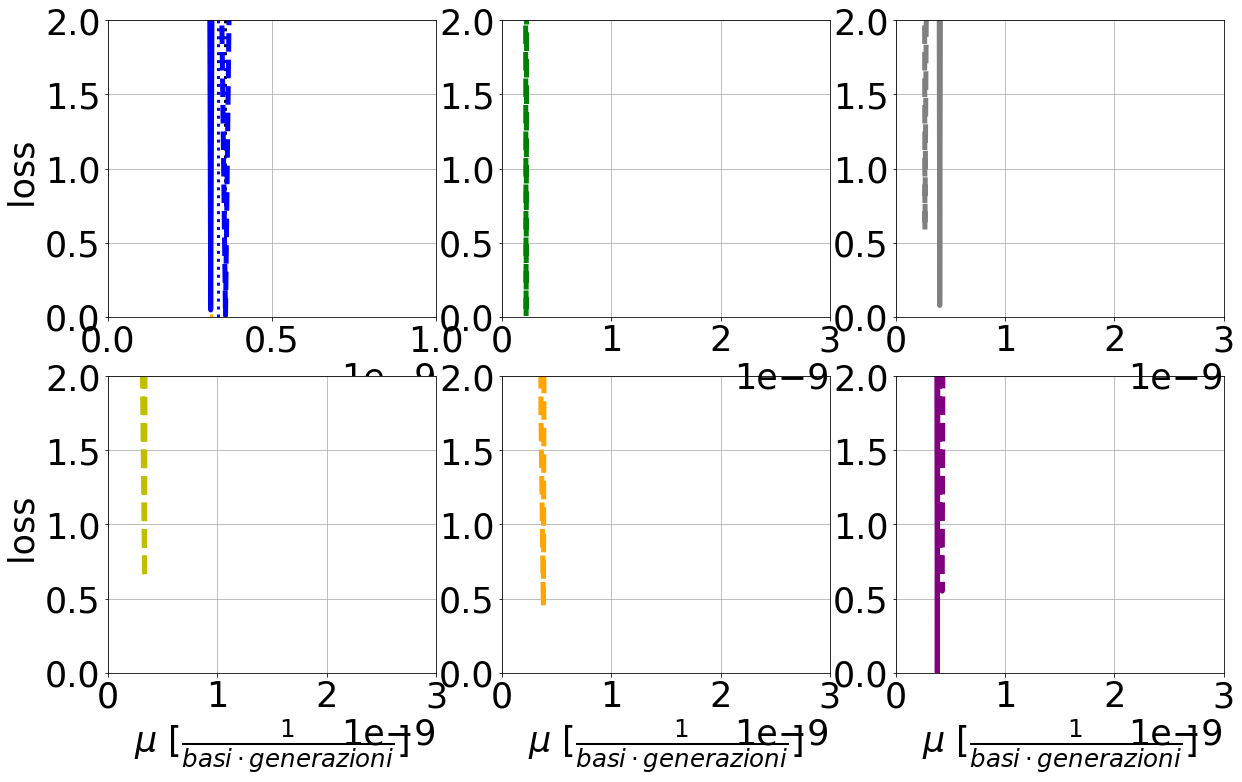

In [65]:
rami_err= np.loadtxt("C:../es_new/LC_CRC0441.txt", unpack='true')
mut=np.loadtxt("C:../es_new/mut_LC_CRC0441.txt", unpack='true')
mut_58=np.loadtxt("C:../es_new/mut_LC_CRC0441_Pa_0.56.txt", unpack='true')
mut_68=np.loadtxt("C:../es_new/mut_LC_CRC0441_Pa_0.58.txt", unpack='true')
mut_6=np.loadtxt("C:../es_new/mut_LC_CRC0441_Pa_0.57.txt", unpack='true')
mut_56=np.loadtxt("C:../es_new/mut_LC_CRC0441_Pa_0.54.txt", unpack='true')
mut_57=np.loadtxt("C:../es_new/mut_LC_CRC0441_Pa_0.55.txt", unpack='true')

datia=np.array([457,433])
datid=np.array([489,484,561,532])
datie=np.array([1155,1160])
datif=np.array([1716,1692,1644])

n1=50
n_tr=1000
N_m=5595688850
N_b_15=5316401584
N_b_27=5072406807
N_b_LM=4818048167
N_b_PR=2495801608
N_b_07=4600467279
N_b_82=2748711013
N_b_82_7=820828872.5
mu=1.10482E-9
x=np.linspace(mu*0.1,mu*0.1+(50*mu*0.02), 50)
print(x)
mu_mean=1.52791982E-09
matr_a=np.zeros((n1,2))
mu_rate(matr_a, n1, mut[0] )
matr_d=np.zeros((n1,2))
mu_rate(matr_d, n1, mut[3] )
matr_e=np.zeros((n1,2))
mu_rate(matr_e, n1, mut[4] )

matr_a_58=np.zeros((n1,2))
mu_rate(matr_a_58, n1, mut_58[0] )
matr_d_58=np.zeros((n1,2))
mu_rate(matr_d_58, n1, mut_58[3] )
matr_e_58=np.zeros((n1,2))
mu_rate(matr_e_58, n1, mut_58[4] )


matr_a_68=np.zeros((n1,2))
mu_rate(matr_a_68, n1, mut_68[0] )
matr_d_68=np.zeros((n1,2))
mu_rate(matr_d_68, n1, mut_68[3] )
matr_e_68=np.zeros((n1,2))
mu_rate(matr_e_68, n1, mut_68[4] )

matr_a_6=np.zeros((n1,2))
mu_rate(matr_a_6, n1, mut_6[0] )
matr_d_6=np.zeros((n1,2))
mu_rate(matr_d_6, n1, mut_6[3] )
matr_e_6=np.zeros((n1,2))
mu_rate(matr_e_6, n1, mut_6[4] )


matr_a_56=np.zeros((n1,2))
mu_rate(matr_a_56, n1, mut_56[0] )
matr_d_56=np.zeros((n1,2))
mu_rate(matr_d_56, n1, mut_56[3] )
matr_e_56=np.zeros((n1,2))
mu_rate(matr_e_56, n1, mut_56[4] )

matr_a_57=np.zeros((n1,2))
mu_rate(matr_a_57, n1, mut_57[0] )
matr_d_57=np.zeros((n1,2))
mu_rate(matr_d_57, n1, mut_57[3] )
matr_e_57=np.zeros((n1,2))
mu_rate(matr_e_57, n1, mut_57[4] )

fig = plt.figure(figsize=(20, 12))
plt.subplot(2,3, 1)

plt.axvline(x=  3.13408122e-10 , color= 'orange', linewidth=3.0,linestyle='dotted')
plt.axvline(x= 3.35955469e-10 , color= 'b', linewidth=3.0,linestyle='dotted')
plt.axvline(x= 3.58502816e-10, color= 'black', linewidth=3.0,linestyle='dotted')
plt.plot(x, np.power((matr_a[:,0]-np.mean(datia))/np.sqrt(((np.power(matr_a[:,1],2)/n_tr) + (np.power(np.std(datia),2)/len(datia)) )),2), linestyle="solid",  color='b',  linewidth=5.0)
plt.plot(x, np.power((matr_d[:,0]-np.mean(datid))/np.sqrt(((np.power(matr_d[:,1],2)/n_tr) + (np.power(np.std(datid),2)/len(datid)) )),2),  linestyle="--",  color='b', linewidth=5.0)
plt.ylim(0, 2)
plt.ylabel(r'loss ')
plt.grid(True)
plt.xlim(0, 1E-9)

plt.subplot(2,3, 4)
plt.plot(x, np.power((matr_a_58[:,0]-np.mean(datia))/np.sqrt(((np.power(matr_a_58[:,1],2)/n_tr) + (np.power(np.std(datia),2)/len(datia)))),2),  linestyle="solid", color='y',  linewidth=5.0)
plt.plot(x, np.power((matr_d_58[:,0]-np.mean(datid))/np.sqrt(((np.power(matr_d_58[:,1],2)/n_tr) + (np.power(np.std(datid),2)/len(datid)) )),2),  linestyle="--", color='y', linewidth=5.0)
plt.ylim(0, 2)
plt.grid(True)
plt.xlim(0, 3E-9)
plt.ylabel(r'loss ')
plt.xlabel(r'$\mu$ $[\frac{1}{basi \cdot generazioni}]$')
plt.subplot(2,3, 6)
plt.plot(x, np.power((matr_a_68[:,0]-np.mean(datia))/np.sqrt(((np.power(matr_a_68[:,1],2)/n_tr) + (np.power(np.std(datia),2)/len(datia)))) ,2),  linestyle="solid", color='purple',  linewidth=5.0)
plt.plot(x, np.power((matr_d_68[:,0]-np.mean(datid))/np.sqrt(((np.power(matr_d_68[:,1],2)/n_tr) + (np.power(np.std(datid),2)/len(datid)) )),2),  linestyle="--", color='purple', linewidth=5.0)
plt.ylim(0, 2)
plt.xlabel(r'$\mu$ $[\frac{1}{basi \cdot generazioni}]$')
plt.grid(True)
plt.xlim(0, 3E-9)

plt.subplot(2,3, 5)
plt.plot(x, np.power((matr_a_6[:,0]-np.mean(datia))/np.sqrt(((np.power(matr_a_6[:,1],2)/n_tr) + (np.power(np.std(datia),2)/len(datia)))) ,2),  linestyle="solid", color='orange',  linewidth=5.0)
plt.plot(x, np.power((matr_d_6[:,0]-np.mean(datid))/np.sqrt(((np.power(matr_d_6[:,1],2)/n_tr) + (np.power(np.std(datid),2)/len(datid)) )),2),  linestyle="--", color='orange', linewidth=5.0)
plt.xlabel(r'$\mu$ $[\frac{1}{basi \cdot generazioni}]$')


plt.ylim(0, 2)
plt.grid(True)
plt.xlim(0, 3E-9)

plt.subplot(2,3, 2)
plt.plot(x, np.power((matr_a_56[:,0]-np.mean(datia))/np.sqrt(((np.power(matr_a_56[:,1],2)/n_tr) + (np.power(np.std(datia),2)/len(datia)))) ,2),  linestyle="solid", color='g',  linewidth=5.0)
plt.plot(x, np.power((matr_d_56[:,0]-np.mean(datid))/np.sqrt(((np.power(matr_d_56[:,1],2)/n_tr) + (np.power(np.std(datid),2)/len(datid)) )),2), linestyle="--", color='g', linewidth=5.0)


plt.grid(True)
plt.ylim(0, 2)
plt.xlim(0, 3E-9)

plt.subplot(2,3, 3)   
plt.plot(x, np.power((matr_a_57[:,0]-np.mean(datia))/np.sqrt(((np.power(matr_a_57[:,1],2)/n_tr) + (np.power(np.std(datia),2)/len(datia)))),2) ,  linestyle="solid", color='grey',  linewidth=5.0)
plt.plot(x, np.power((matr_d_57[:,0]-np.mean(datid))/np.sqrt(((np.power(matr_d_57[:,1],2)/n_tr) + (np.power(np.std(datid),2)/len(datid)) )),2),  linestyle="--", color='grey',  linewidth=5.0)


plt.grid(True) 
plt.ylim(0, 2)
plt.xlim(0, 3E-9)


### CRC1599PR

(0.0, 3e-09)

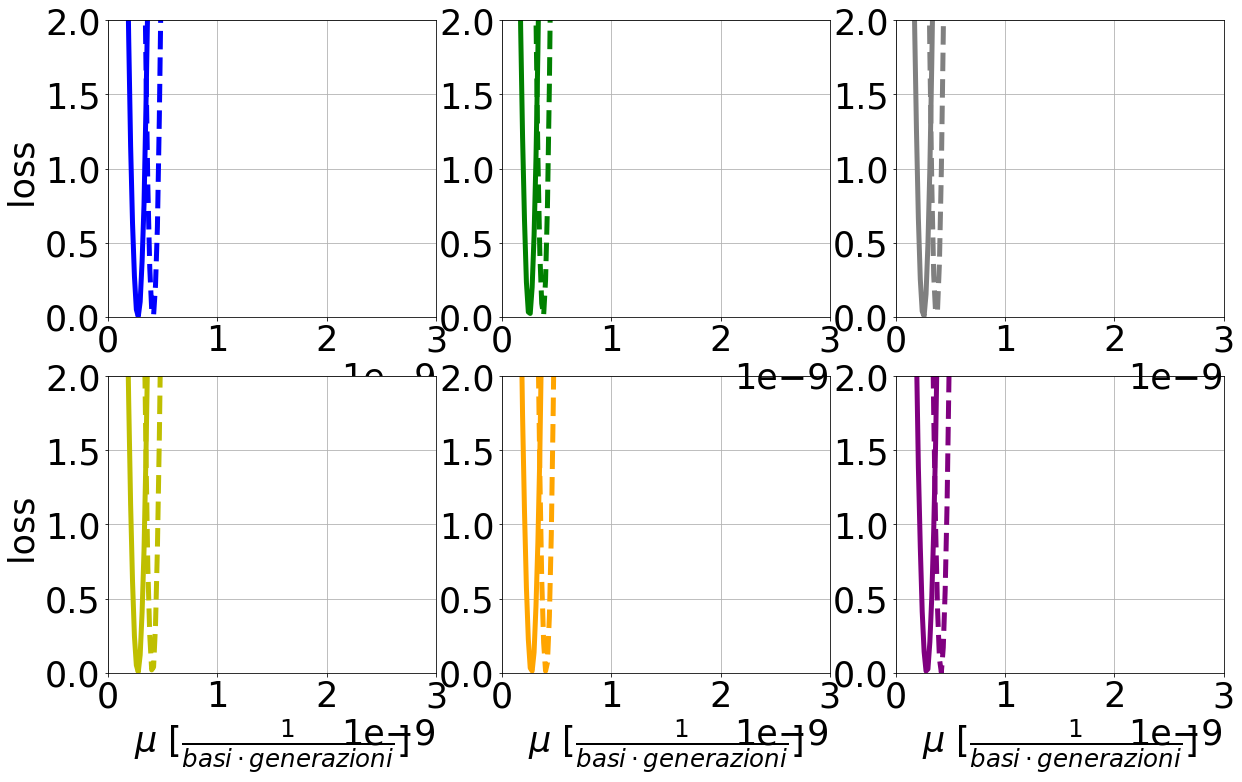

In [55]:
rami_err= np.loadtxt("C:../es_new/LC_CRC1599PR.txt", unpack='true')
mut=np.loadtxt("C:../es_new/mut_LC_CRC1599PR.txt", unpack='true')
mut_58=np.loadtxt("C:../es_new/mut_LC_CRC1599PR_Pa_0.56.txt", unpack='true')
mut_68=np.loadtxt("C:../es_new/mut_LC_CRC1599PR_Pa_0.58.txt", unpack='true')
mut_6=np.loadtxt("C:../es_new/mut_LC_CRC1599PR_Pa_0.57.txt", unpack='true')
mut_56=np.loadtxt("C:../es_new/mut_LC_CRC1599PR_Pa_0.54.txt", unpack='true')
mut_57=np.loadtxt("C:../es_new/mut_LC_CRC1599PR_Pa_0.55.txt", unpack='true')

datia=np.array([259,274,124,83])
datid=np.array([241,237,383,372,355,359,124,161])
datie=np.array([398,402,281,285])
datif=np.array([639,770,785,446,405,640])

n1=50
n_tr=1000
N_m=5595688850
N_b_15=5316401584
N_b_27=5072406807
N_b_LM=4818048167
N_b_PR=2495801608
N_b_07=4600467279
N_b_82=2748711013
N_b_82_7=820828872.5
mu=8.57421E-10
x=np.linspace(mu*0.1,mu*0.1+(50*mu*0.02), 50)
mu_mean=1.52791982E-09
matr_a=np.zeros((n1,2))
mu_rate(matr_a, n1, mut[0] )
matr_d=np.zeros((n1,2))
mu_rate(matr_d, n1, mut[3] )
matr_e=np.zeros((n1,2))
mu_rate(matr_e, n1, mut[4] )

matr_a_58=np.zeros((n1,2))
mu_rate(matr_a_58, n1, mut_58[0] )
matr_d_58=np.zeros((n1,2))
mu_rate(matr_d_58, n1, mut_58[3] )
matr_e_58=np.zeros((n1,2))
mu_rate(matr_e_58, n1, mut_58[4] )


matr_a_68=np.zeros((n1,2))
mu_rate(matr_a_68, n1, mut_68[0] )
matr_d_68=np.zeros((n1,2))
mu_rate(matr_d_68, n1, mut_68[3] )
matr_e_68=np.zeros((n1,2))
mu_rate(matr_e_68, n1, mut_68[4] )

matr_a_6=np.zeros((n1,2))
mu_rate(matr_a_6, n1, mut_6[0] )
matr_d_6=np.zeros((n1,2))
mu_rate(matr_d_6, n1, mut_6[3] )
matr_e_6=np.zeros((n1,2))
mu_rate(matr_e_6, n1, mut_6[4] )


matr_a_56=np.zeros((n1,2))
mu_rate(matr_a_56, n1, mut_56[0] )
matr_d_56=np.zeros((n1,2))
mu_rate(matr_d_56, n1, mut_56[3] )
matr_e_56=np.zeros((n1,2))
mu_rate(matr_e_56, n1, mut_56[4] )

matr_a_57=np.zeros((n1,2))
mu_rate(matr_a_57, n1, mut_57[0] )
matr_d_57=np.zeros((n1,2))
mu_rate(matr_d_57, n1, mut_57[3] )
matr_e_57=np.zeros((n1,2))
mu_rate(matr_e_57, n1, mut_57[4] )

fig = plt.figure(figsize=(20, 12))
plt.subplot(2,3, 1)
plt.plot(x, np.power((matr_a[:,0]-np.mean(datia))/np.sqrt(((np.power(matr_a[:,1],2)/n_tr) + (np.power(np.std(datia),2)/len(datia)) )),2), linestyle="solid",  color='b',  linewidth=5.0)
plt.plot(x, np.power((matr_d[:,0]-np.mean(datid))/np.sqrt(((np.power(matr_d[:,1],2)/n_tr) + (np.power(np.std(datid),2)/len(datid)) )),2),  linestyle="--",  color='b', linewidth=5.0)
plt.ylim(0, 2)
plt.ylabel(r'loss ')
plt.grid(True)
plt.xlim(0, 3E-9)

plt.subplot(2,3, 4)
plt.plot(x, np.power((matr_a_58[:,0]-np.mean(datia))/np.sqrt(((np.power(matr_a_58[:,1],2)/n_tr) + (np.power(np.std(datia),2)/len(datia)))),2),  linestyle="solid", color='y',  linewidth=5.0)
plt.plot(x, np.power((matr_d_58[:,0]-np.mean(datid))/np.sqrt(((np.power(matr_d_58[:,1],2)/n_tr) + (np.power(np.std(datid),2)/len(datid)) )),2),  linestyle="--", color='y', linewidth=5.0)
plt.ylim(0, 2)
plt.grid(True)
plt.xlim(0, 3E-9)
plt.ylabel(r'loss ')
plt.xlabel(r'$\mu$ $[\frac{1}{basi \cdot generazioni}]$')
plt.subplot(2,3, 6)
plt.plot(x, np.power((matr_a_68[:,0]-np.mean(datia))/np.sqrt(((np.power(matr_a_68[:,1],2)/n_tr) + (np.power(np.std(datia),2)/len(datia)))) ,2),  linestyle="solid", color='purple',  linewidth=5.0)
plt.plot(x, np.power((matr_d_68[:,0]-np.mean(datid))/np.sqrt(((np.power(matr_d_68[:,1],2)/n_tr) + (np.power(np.std(datid),2)/len(datid)) )),2),  linestyle="--", color='purple', linewidth=5.0)
plt.ylim(0, 2)
plt.xlabel(r'$\mu$ $[\frac{1}{basi \cdot generazioni}]$')
plt.grid(True)
plt.xlim(0, 3E-9)

plt.subplot(2,3, 5)
plt.plot(x, np.power((matr_a_6[:,0]-np.mean(datia))/np.sqrt(((np.power(matr_a_6[:,1],2)/n_tr) + (np.power(np.std(datia),2)/len(datia)))) ,2),  linestyle="solid", color='orange',  linewidth=5.0)
plt.plot(x, np.power((matr_d_6[:,0]-np.mean(datid))/np.sqrt(((np.power(matr_d_6[:,1],2)/n_tr) + (np.power(np.std(datid),2)/len(datid)) )),2),  linestyle="--", color='orange', linewidth=5.0)
plt.xlabel(r'$\mu$ $[\frac{1}{basi \cdot generazioni}]$')


plt.ylim(0, 2)
plt.grid(True)
plt.xlim(0, 3E-9)

plt.subplot(2,3, 2)
plt.plot(x, np.power((matr_a_56[:,0]-np.mean(datia))/np.sqrt(((np.power(matr_a_56[:,1],2)/n_tr) + (np.power(np.std(datia),2)/len(datia)))) ,2),  linestyle="solid", color='g',  linewidth=5.0)
plt.plot(x, np.power((matr_d_56[:,0]-np.mean(datid))/np.sqrt(((np.power(matr_d_56[:,1],2)/n_tr) + (np.power(np.std(datid),2)/len(datid)) )),2), linestyle="--", color='g', linewidth=5.0)


plt.grid(True)
plt.ylim(0, 2)
plt.xlim(0, 3E-9)

plt.subplot(2,3, 3)   
plt.plot(x, np.power((matr_a_57[:,0]-np.mean(datia))/np.sqrt(((np.power(matr_a_57[:,1],2)/n_tr) + (np.power(np.std(datia),2)/len(datia)))),2) ,  linestyle="solid", color='grey',  linewidth=5.0)
plt.plot(x, np.power((matr_d_57[:,0]-np.mean(datid))/np.sqrt(((np.power(matr_d_57[:,1],2)/n_tr) + (np.power(np.std(datid),2)/len(datid)) )),2),  linestyle="--", color='grey',  linewidth=5.0)


plt.grid(True) 
plt.ylim(0, 2)
plt.xlim(0, 3E-9)


[8.57421000e-11 1.03240488e-10 1.20738876e-10 1.38237263e-10
 1.55735651e-10 1.73234039e-10 1.90732427e-10 2.08230814e-10
 2.25729202e-10 2.43227590e-10 2.60725978e-10 2.78224365e-10
 2.95722753e-10 3.13221141e-10 3.30719529e-10 3.48217916e-10
 3.65716304e-10 3.83214692e-10 4.00713080e-10 4.18211467e-10
 4.35709855e-10 4.53208243e-10 4.70706631e-10 4.88205018e-10
 5.05703406e-10 5.23201794e-10 5.40700182e-10 5.58198569e-10
 5.75696957e-10 5.93195345e-10 6.10693733e-10 6.28192120e-10
 6.45690508e-10 6.63188896e-10 6.80687284e-10 6.98185671e-10
 7.15684059e-10 7.33182447e-10 7.50680835e-10 7.68179222e-10
 7.85677610e-10 8.03175998e-10 8.20674386e-10 8.38172773e-10
 8.55671161e-10 8.73169549e-10 8.90667937e-10 9.08166324e-10
 9.25664712e-10 9.43163100e-10]


(0.0, 3e-09)

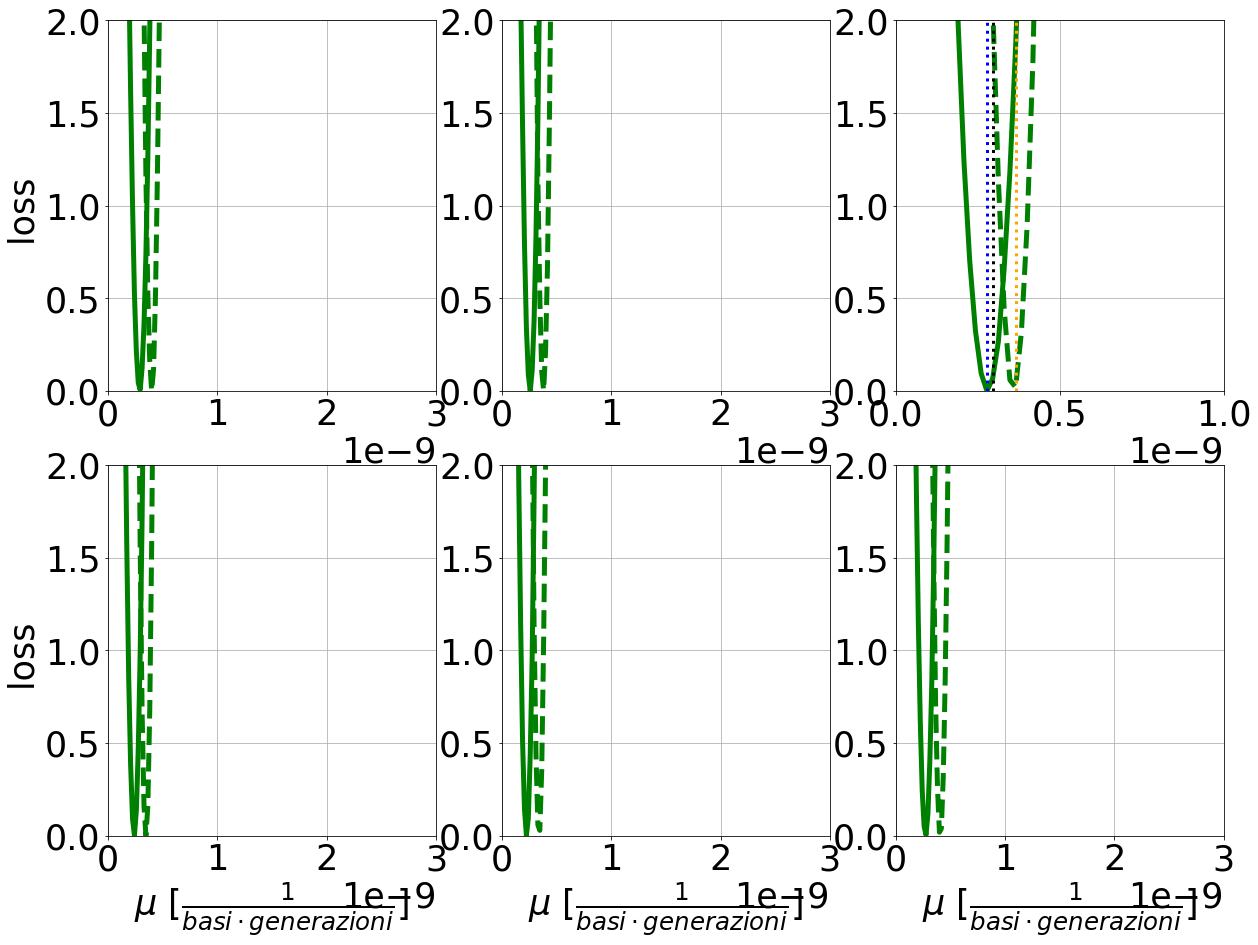

In [68]:
rami_err_07= np.loadtxt("C:../es_new/LC_CRC1599PR_Pa_0.56.txt", unpack='true')
mut_07_6=np.loadtxt("C:../es_new/mut_LC_CRC1599PR_Pa_0.56.txt", unpack='true')
mut_07_160=np.loadtxt("C:../es_new/mut_LC_CRC1599PR_Pa_0.56_ngen0_160.txt", unpack='true')
mut_07_150=np.loadtxt("C:../es_new/mut_LC_CRC1599PR_Pa_0.56_ngen0_150.txt", unpack='true')
mut_07_170=np.loadtxt("C:../es_new/mut_LC_CRC1599PR_Pa_0.56_ngen0_170.txt", unpack='true')
mut_07_130=np.loadtxt("C:../es_new/mut_LC_CRC1599PR_Pa_0.56_ngen0_130.txt", unpack='true')
mut_07_140=np.loadtxt("C:../es_new/mut_LC_CRC1599PR_Pa_0.56_ngen0_140.txt", unpack='true')
datia=np.array([259,274,124,83])
datid=np.array([241,237,383,372,355,359,124,161])
datie=np.array([398,402,281,285])
datif=np.array([639,770,785,446,405,640])

n1=50
n_tr=1000
N_m=5595688850
N_b_15=5316401584
N_b_27=5072406807
N_b_LM=4818048167
N_b_PR=2495801608
N_b_07=4600467279
N_b_82=2748711013
N_b_82_7=820828872.5
mu=8.57421E-10
x=np.linspace(mu*0.1,mu*0.1+(50*mu*0.02), 50)
print(x)
matr_a_07_170=np.zeros((n1,2))
mu_rate(matr_a_07_170, n1, mut_07_170[0] )
matr_d_07_170=np.zeros((n1,2))
mu_rate(matr_d_07_170, n1, mut_07_170[3] )
matr_e_07_170=np.zeros((n1,2))
mu_rate(matr_e_07_170, n1, mut_07_170[4] )

matr_a_07_6=np.zeros((n1,2))
mu_rate(matr_a_07_6, n1, mut_07_6[0] )
matr_d_07_6=np.zeros((n1,2))
mu_rate(matr_d_07_6, n1, mut_07_6[3] )
matr_e_07_6=np.zeros((n1,2))
mu_rate(matr_e_07_6, n1, mut_07_6[4] )

matr_a_07_150=np.zeros((n1,2))
mu_rate(matr_a_07_150, n1, mut_07_150[0] )
matr_d_07_150=np.zeros((n1,2))
mu_rate(matr_d_07_150, n1, mut_07_150[3] )
matr_e_07_150=np.zeros((n1,2))
mu_rate(matr_e_07_150, n1, mut_07_150[4] )


matr_a_07_160=np.zeros((n1,2))
mu_rate(matr_a_07_160, n1, mut_07_160[0] )
matr_d_07_160=np.zeros((n1,2))
mu_rate(matr_d_07_160, n1, mut_07_160[3] )
matr_e_07_160=np.zeros((n1,2))
mu_rate(matr_e_07_160, n1, mut_07_160[4] )

matr_a_07_130=np.zeros((n1,2))
mu_rate(matr_a_07_130, n1, mut_07_130[0] )
matr_d_07_130=np.zeros((n1,2))
mu_rate(matr_d_07_130, n1, mut_07_130[3] )
matr_e_07_130=np.zeros((n1,2))
mu_rate(matr_e_07_130, n1, mut_07_130[4] )


matr_a_07_140=np.zeros((n1,2))
mu_rate(matr_a_07_140, n1, mut_07_140[0] )
matr_d_07_140=np.zeros((n1,2))
mu_rate(matr_d_07_140, n1, mut_07_140[3] )
matr_e_07_140=np.zeros((n1,2))
mu_rate(matr_e_07_140, n1, mut_07_140[4] )

fig = plt.figure(figsize=(20, 15))

plt.axhline(y=0, color='red', linestyle='dotted',linewidth=4 )

plt.subplot(2,3, 1)
plt.plot(x, np.power((matr_a_07_130[:,0]-np.mean(datia))/np.sqrt(((np.power(matr_a_07_130[:,1],2)/n_tr) + (np.power(np.std(datia),2)/len(datia)))) ,2),  linestyle="solid", color='g',  linewidth=5.0)
plt.plot(x, np.power((matr_d_07_130[:,0]-np.mean(datid))/np.sqrt(((np.power(matr_d_07_130[:,1],2)/n_tr) + (np.power(np.std(datid),2)/len(datid)) )),2),  linestyle="--", color='g', linewidth=5.0)
plt.ylim(0, 2)

plt.ylabel(r'loss ')
plt.grid(True)
plt.xlim(0, 1E-9)
plt.xlim(0, 3E-9)
plt.subplot(2,3,2)
plt.plot(x, np.power((matr_a_07_140[:,0]-np.mean(datia))/np.sqrt(((np.power(matr_a_07_140[:,1],2)/n_tr) + (np.power(np.std(datia),2)/len(datia)))) ,2),  linestyle="solid", color='g',  linewidth=5.0)
plt.plot(x, np.power((matr_d_07_140[:,0]-np.mean(datid))/np.sqrt(((np.power(matr_d_07_140[:,1],2)/n_tr) + (np.power(np.std(datid),2)/len(datid)) )),2),  linestyle="--", color='g', linewidth=5.0)


plt.ylim(0, 2)
plt.grid(True)
plt.xlim(0, 3E-9)

plt.subplot(2,3,3)
plt.plot(x, np.power((matr_a_07_150[:,0]-np.mean(datia))/np.sqrt(((np.power(matr_a_07_150[:,1],2)/n_tr) + (np.power(np.std(datia),2)/len(datia)))) ,2),  linestyle="solid", color='g',  linewidth=5.0)
plt.plot(x, np.power((matr_d_07_150[:,0]-np.mean(datid))/np.sqrt(((np.power(matr_d_07_150[:,1],2)/n_tr) + (np.power(np.std(datid),2)/len(datid)) )),2), linestyle="--", color='g', linewidth=5.0)
plt.axvline(x= 3.65716304e-10 , color= 'orange', linewidth=3.0,linestyle='dotted')
plt.axvline(x=  2.78224365e-10, color= 'b', linewidth=3.0,linestyle='dotted')
plt.axvline(x=  2.95722753e-10, color= 'black', linewidth=3.0,linestyle='dotted')

plt.grid(True)
plt.ylim(0, 2)
plt.xlim(0, 1E-9)

plt.subplot(2,3,4)
plt.plot(x, np.power((matr_a_07_160[:,0]-np.mean(datia))/np.sqrt(((np.power(matr_a_07_160[:,1],2)/n_tr) + (np.power(np.std(datia),2)/len(datia)))) ,2),  linestyle="solid", color='g',  linewidth=5.0)
plt.plot(x, np.power((matr_d_07_160[:,0]-np.mean(datid))/np.sqrt(((np.power(matr_d_07_160[:,1],2)/n_tr) + (np.power(np.std(datid),2)/len(datid)) )),2), linestyle="--", color='g', linewidth=5.0)
plt.xlabel(r'$\mu$ $[\frac{1}{basi \cdot generazioni}]$')
plt.ylabel(r'loss ')
plt.grid(True)
plt.ylim(0, 2)
plt.xlim(0, 3E-9)

plt.subplot( 2,3,  5)
plt.plot(x, np.power((matr_a_07_170[:,0]-np.mean(datia))/np.sqrt(((np.power(matr_a_07_170[:,1],2)/n_tr) + (np.power(np.std(datia),2)/len(datia)))) ,2),  linestyle="solid", color='g',  linewidth=5.0)
plt.plot(x, np.power((matr_d_07_170[:,0]-np.mean(datid))/np.sqrt(((np.power(matr_d_07_170[:,1],2)/n_tr) + (np.power(np.std(datid),2)/len(datid)) )),2), linestyle="--", color='g', linewidth=5.0)

plt.xlabel(r'$\mu$ $[\frac{1}{basi \cdot generazioni}]$')
plt.grid(True)
plt.ylim(0, 2)
plt.xlim(0, 3E-9)

plt.subplot(2, 3, 6)
plt.plot(x, np.power((matr_a_07_6[:,0]-np.mean(datia))/np.sqrt(((np.power(matr_a_07_6[:,1],2)/n_tr) + (np.power(np.std(datia),2)/len(datia)))) ,2),  linestyle="solid", color='g',  linewidth=5.0)
plt.plot(x, np.power((matr_d_07_6[:,0]-np.mean(datid))/np.sqrt(((np.power(matr_d_07_6[:,1],2)/n_tr) + (np.power(np.std(datid),2)/len(datid)) )),2), linestyle="--", color='g', linewidth=5.0)
plt.xlabel(r'$\mu$ $[\frac{1}{basi \cdot generazioni}]$')

plt.grid(True)
plt.ylim(0, 2)
plt.xlim(0, 3E-9)









### CRC1599LM

(0.0, 1e-09)

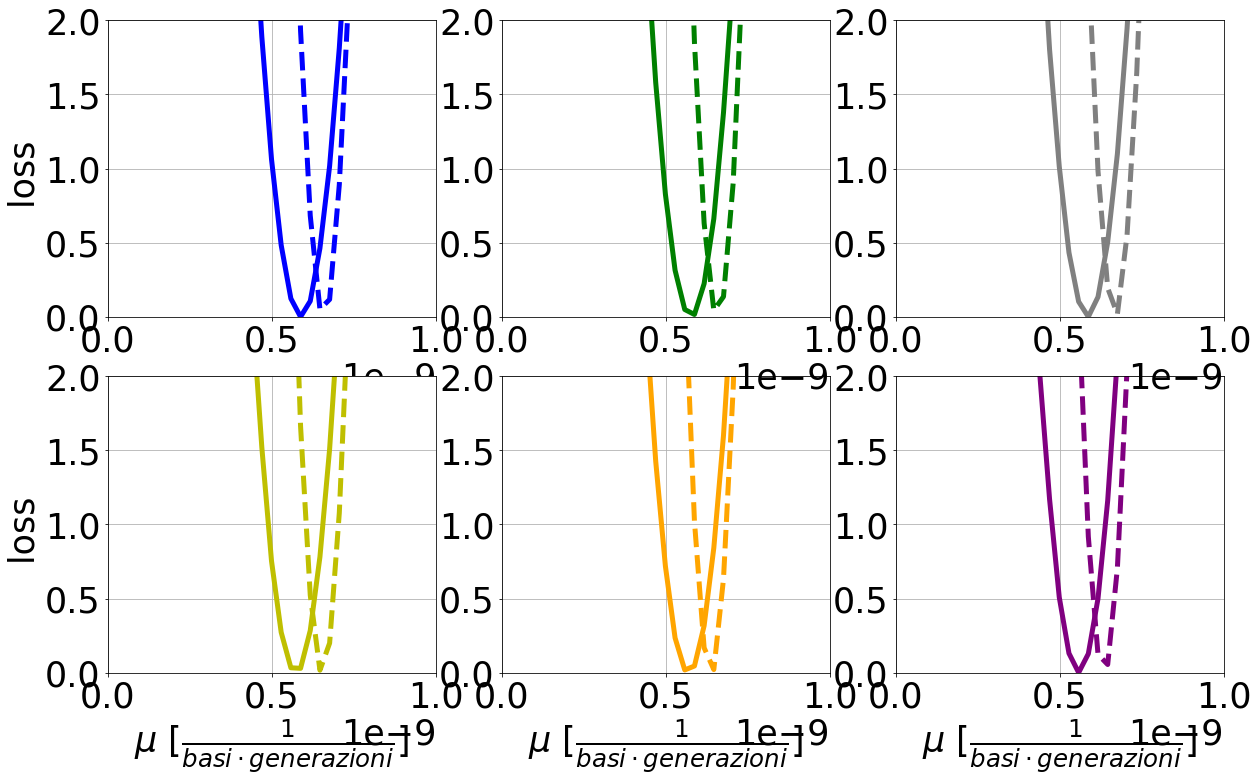

In [32]:
rami_err= np.loadtxt("C:../es_new/LC_CRC1599LM.txt", unpack='true')
mut=np.loadtxt("C:../es_new/mut_LC_CRC1599LM.txt", unpack='true')
mut_56=np.loadtxt("C:../es_new/mut_LC_CRC1599LM_Pa_0.56.txt", unpack='true')
mut_58=np.loadtxt("C:../es_new/mut_LC_CRC1599LM_Pa_0.58.txt", unpack='true')
mut_57=np.loadtxt("C:../es_new/mut_LC_CRC1599LM_Pa_0.57.txt", unpack='true')
mut_54=np.loadtxt("C:../es_new/mut_LC_CRC1599LM_Pa_0.54.txt", unpack='true')
mut_55=np.loadtxt("C:../es_new/mut_LC_CRC1599LM_Pa_0.55.txt", unpack='true')

datia=np.array([1332,1506,898,696])
datid=np.array([796,914,1412,1704,1396,1367,1160,1391])
datie=np.array([1905,1787,1273,1302])
datif=np.array([2701,3317,3491,2664,2669,2462])

n1=50
n_tr=1000

mu=1.44585E-09
x=np.linspace(mu*0.1,mu*0.1+(50*mu*0.02), 50)
mu_mean=1.44585E-9
matr_a=np.zeros((n1,2))
mu_rate(matr_a, n1, mut[0] )
matr_d=np.zeros((n1,2))
mu_rate(matr_d, n1, mut[3] )
matr_e=np.zeros((n1,2))
mu_rate(matr_e, n1, mut[4] )

matr_a_58=np.zeros((n1,2))
mu_rate(matr_a_58, n1, mut_58[0] )
matr_d_58=np.zeros((n1,2))
mu_rate(matr_d_58, n1, mut_58[3] )
matr_e_58=np.zeros((n1,2))
mu_rate(matr_e_58, n1, mut_58[4] )


matr_a_68=np.zeros((n1,2))
mu_rate(matr_a_68, n1, mut_55[0] )
matr_d_68=np.zeros((n1,2))
mu_rate(matr_d_68, n1, mut_55[3] )
matr_e_68=np.zeros((n1,2))
mu_rate(matr_e_68, n1, mut_55[4] )

matr_a_6=np.zeros((n1,2))
mu_rate(matr_a_6, n1, mut_54[0] )
matr_d_6=np.zeros((n1,2))
mu_rate(matr_d_6, n1, mut_54[3] )
matr_e_6=np.zeros((n1,2))
mu_rate(matr_e_6, n1, mut_54[4] )


matr_a_56=np.zeros((n1,2))
mu_rate(matr_a_56, n1, mut_56[0] )
matr_d_56=np.zeros((n1,2))
mu_rate(matr_d_56, n1, mut_56[3] )
matr_e_56=np.zeros((n1,2))
mu_rate(matr_e_56, n1, mut_56[4] )

matr_a_57=np.zeros((n1,2))
mu_rate(matr_a_57, n1, mut_57[0] )
matr_d_57=np.zeros((n1,2))
mu_rate(matr_d_57, n1, mut_57[3] )
matr_e_57=np.zeros((n1,2))
mu_rate(matr_e_57, n1, mut_57[4] )

fig = plt.figure(figsize=(20, 12))
plt.subplot(2,3, 1)
plt.plot(x, np.power((matr_a[:,0]-np.mean(datia))/np.sqrt(((np.power(matr_a[:,1],2)/n_tr) + (np.power(np.std(datia),2)/len(datia)) )),2), linestyle="solid",  color='b',  linewidth=5.0)
plt.plot(x, np.power((matr_d[:,0]-np.mean(datid))/np.sqrt(((np.power(matr_d[:,1],2)/n_tr) + (np.power(np.std(datid),2)/len(datid)) )),2),  linestyle="--",  color='b', linewidth=5.0)
plt.ylim(0, 2)
plt.ylabel(r'loss ')
plt.grid(True)
plt.xlim(0, 1E-9)

plt.subplot(2,3, 4)
plt.plot(x, np.power((matr_a_58[:,0]-np.mean(datia))/np.sqrt(((np.power(matr_a_58[:,1],2)/n_tr) + (np.power(np.std(datia),2)/len(datia)))),2),  linestyle="solid", color='y',  linewidth=5.0)
plt.plot(x, np.power((matr_d_58[:,0]-np.mean(datid))/np.sqrt(((np.power(matr_d_58[:,1],2)/n_tr) + (np.power(np.std(datid),2)/len(datid)) )),2),  linestyle="--", color='y', linewidth=5.0)
plt.ylim(0, 2)
plt.grid(True)
plt.xlim(0, 1E-9)
plt.ylabel(r'loss ')
plt.xlabel(r'$\mu$ $[\frac{1}{basi \cdot generazioni}]$')
plt.subplot(2,3, 6)
plt.plot(x, np.power((matr_a_68[:,0]-np.mean(datia))/np.sqrt(((np.power(matr_a_68[:,1],2)/n_tr) + (np.power(np.std(datia),2)/len(datia)))) ,2),  linestyle="solid", color='purple',  linewidth=5.0)
plt.plot(x, np.power((matr_d_68[:,0]-np.mean(datid))/np.sqrt(((np.power(matr_d_68[:,1],2)/n_tr) + (np.power(np.std(datid),2)/len(datid)) )),2),  linestyle="--", color='purple', linewidth=5.0)
plt.ylim(0, 2)
plt.xlabel(r'$\mu$ $[\frac{1}{basi \cdot generazioni}]$')
plt.grid(True)
plt.xlim(0, 1E-9)

plt.subplot(2,3, 5)
plt.plot(x, np.power((matr_a_6[:,0]-np.mean(datia))/np.sqrt(((np.power(matr_a_6[:,1],2)/n_tr) + (np.power(np.std(datia),2)/len(datia)))) ,2),  linestyle="solid", color='orange',  linewidth=5.0)
plt.plot(x, np.power((matr_d_6[:,0]-np.mean(datid))/np.sqrt(((np.power(matr_d_6[:,1],2)/n_tr) + (np.power(np.std(datid),2)/len(datid)) )),2),  linestyle="--", color='orange', linewidth=5.0)
plt.xlabel(r'$\mu$ $[\frac{1}{basi \cdot generazioni}]$')


plt.ylim(0, 2)
plt.grid(True)
plt.xlim(0, 1E-9)

plt.subplot(2,3, 2)
plt.plot(x, np.power((matr_a_56[:,0]-np.mean(datia))/np.sqrt(((np.power(matr_a_56[:,1],2)/n_tr) + (np.power(np.std(datia),2)/len(datia)))) ,2),  linestyle="solid", color='g',  linewidth=5.0)
plt.plot(x, np.power((matr_d_56[:,0]-np.mean(datid))/np.sqrt(((np.power(matr_d_56[:,1],2)/n_tr) + (np.power(np.std(datid),2)/len(datid)) )),2), linestyle="--", color='g', linewidth=5.0)


plt.grid(True)
plt.ylim(0, 2)
plt.xlim(0, 1E-9)

plt.subplot(2,3, 3)   
plt.plot(x, np.power((matr_a_57[:,0]-np.mean(datia))/np.sqrt(((np.power(matr_a_57[:,1],2)/n_tr) + (np.power(np.std(datia),2)/len(datia)))),2) ,  linestyle="solid", color='grey',  linewidth=5.0)
plt.plot(x, np.power((matr_d_57[:,0]-np.mean(datid))/np.sqrt(((np.power(matr_d_57[:,1],2)/n_tr) + (np.power(np.std(datid),2)/len(datid)) )),2),  linestyle="--", color='grey',  linewidth=5.0)


plt.grid(True) 
plt.ylim(0, 2)
plt.xlim(0, 1E-9)


[1.44585000e-10 1.74092143e-10 2.03599286e-10 2.33106429e-10
 2.62613571e-10 2.92120714e-10 3.21627857e-10 3.51135000e-10
 3.80642143e-10 4.10149286e-10 4.39656429e-10 4.69163571e-10
 4.98670714e-10 5.28177857e-10 5.57685000e-10 5.87192143e-10
 6.16699286e-10 6.46206429e-10 6.75713571e-10 7.05220714e-10
 7.34727857e-10 7.64235000e-10 7.93742143e-10 8.23249286e-10
 8.52756429e-10 8.82263571e-10 9.11770714e-10 9.41277857e-10
 9.70785000e-10 1.00029214e-09 1.02979929e-09 1.05930643e-09
 1.08881357e-09 1.11832071e-09 1.14782786e-09 1.17733500e-09
 1.20684214e-09 1.23634929e-09 1.26585643e-09 1.29536357e-09
 1.32487071e-09 1.35437786e-09 1.38388500e-09 1.41339214e-09
 1.44289929e-09 1.47240643e-09 1.50191357e-09 1.53142071e-09
 1.56092786e-09 1.59043500e-09]


(0.0, 1e-09)

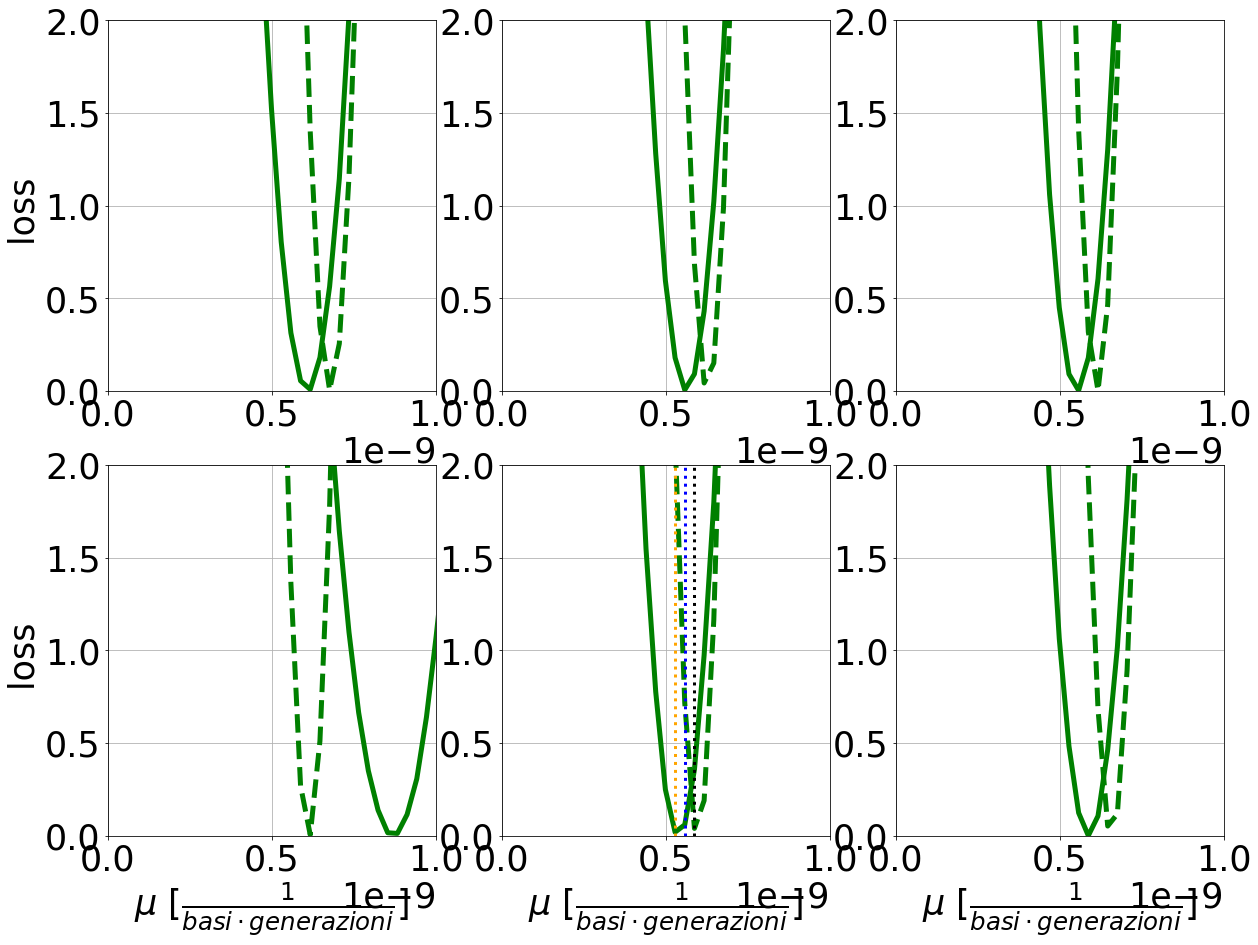

In [69]:
rami_err_07= np.loadtxt("C:../es_new/LC_CRC1599LM.txt", unpack='true')
mut_07_6=np.loadtxt("C:../es_new/mut_LC_CRC1599LM.txt", unpack='true')
mut_07_160=np.loadtxt("C:../es_new/mut_LC_CRC1599_160.txt", unpack='true')
mut_07_150=np.loadtxt("C:../es_new/mut_LC_CRC1599_150.txt", unpack='true')
mut_07_170=np.loadtxt("C:../es_new/mut_LC_CRC1599_170.txt", unpack='true')
mut_07_130=np.loadtxt("C:../es_new/mut_LC_CRC1599_130.txt", unpack='true')
mut_07_140=np.loadtxt("C:../es_new/mut_LC_CRC1599_140.txt", unpack='true')
datia=np.array([1332,1506,898,696])
datid=np.array([796,914,1412,1704,1396,1367,1160,1391])
datie=np.array([1905,1787,1273,1302])
datif=np.array([2701,3317,3491,2664,2669,2462])

n1=50
n_tr=1000
N_m=5595688850
N_b_15=5316401584
N_b_27=5072406807
N_b_LM=4818048167
N_b_PR=2495801608
N_b_07=4600467279
N_b_82=2748711013
N_b_82_7=820828872.5
mu=1.44585E-09
x=np.linspace(mu*0.1,mu*0.1+(50*mu*0.02), 50)
print(x)
matr_a_07_170=np.zeros((n1,2))
mu_rate(matr_a_07_170, n1, mut_07_170[0] )
matr_d_07_170=np.zeros((n1,2))
mu_rate(matr_d_07_170, n1, mut_07_170[3] )
matr_e_07_170=np.zeros((n1,2))
mu_rate(matr_e_07_170, n1, mut_07_170[4] )

matr_a_07_6=np.zeros((n1,2))
mu_rate(matr_a_07_6, n1, mut_07_6[0] )
matr_d_07_6=np.zeros((n1,2))
mu_rate(matr_d_07_6, n1, mut_07_6[3] )
matr_e_07_6=np.zeros((n1,2))
mu_rate(matr_e_07_6, n1, mut_07_6[4] )

matr_a_07_150=np.zeros((n1,2))
mu_rate(matr_a_07_150, n1, mut_07_150[0] )
matr_d_07_150=np.zeros((n1,2))
mu_rate(matr_d_07_150, n1, mut_07_150[3] )
matr_e_07_150=np.zeros((n1,2))
mu_rate(matr_e_07_150, n1, mut_07_150[4] )


matr_a_07_160=np.zeros((n1,2))
mu_rate(matr_a_07_160, n1, mut_07_160[0] )
matr_d_07_160=np.zeros((n1,2))
mu_rate(matr_d_07_160, n1, mut_07_160[3] )
matr_e_07_160=np.zeros((n1,2))
mu_rate(matr_e_07_160, n1, mut_07_160[4] )

matr_a_07_130=np.zeros((n1,2))
mu_rate(matr_a_07_130, n1, mut_07_130[0] )
matr_d_07_130=np.zeros((n1,2))
mu_rate(matr_d_07_130, n1, mut_07_130[3] )
matr_e_07_130=np.zeros((n1,2))
mu_rate(matr_e_07_130, n1, mut_07_130[4] )


matr_a_07_140=np.zeros((n1,2))
mu_rate(matr_a_07_140, n1, mut_07_140[0] )
matr_d_07_140=np.zeros((n1,2))
mu_rate(matr_d_07_140, n1, mut_07_140[3] )
matr_e_07_140=np.zeros((n1,2))
mu_rate(matr_e_07_140, n1, mut_07_140[4] )

fig = plt.figure(figsize=(20, 15))

plt.axhline(y=0, color='red', linestyle='dotted',linewidth=4 )

plt.subplot(2,3, 1)
plt.plot(x, np.power((matr_a_07_130[:,0]-np.mean(datia))/np.sqrt(((np.power(matr_a_07_130[:,1],2)/n_tr) + (np.power(np.std(datia),2)/len(datia)))) ,2),  linestyle="solid", color='g',  linewidth=5.0)
plt.plot(x, np.power((matr_d_07_130[:,0]-np.mean(datid))/np.sqrt(((np.power(matr_d_07_130[:,1],2)/n_tr) + (np.power(np.std(datid),2)/len(datid)) )),2),  linestyle="--", color='g', linewidth=5.0)
plt.ylim(0, 2)

plt.ylabel(r'loss ')
plt.grid(True)
plt.xlim(0, 1E-9)
plt.xlim(0, 1E-9)
plt.subplot(2,3,2)
plt.plot(x, np.power((matr_a_07_140[:,0]-np.mean(datia))/np.sqrt(((np.power(matr_a_07_140[:,1],2)/n_tr) + (np.power(np.std(datia),2)/len(datia)))) ,2),  linestyle="solid", color='g',  linewidth=5.0)
plt.plot(x, np.power((matr_d_07_140[:,0]-np.mean(datid))/np.sqrt(((np.power(matr_d_07_140[:,1],2)/n_tr) + (np.power(np.std(datid),2)/len(datid)) )),2),  linestyle="--", color='g', linewidth=5.0)


plt.ylim(0, 2)
plt.grid(True)
plt.xlim(0, 1E-9)

plt.subplot(2,3,3)
plt.plot(x, np.power((matr_a_07_150[:,0]-np.mean(datia))/np.sqrt(((np.power(matr_a_07_150[:,1],2)/n_tr) + (np.power(np.std(datia),2)/len(datia)))) ,2),  linestyle="solid", color='g',  linewidth=5.0)
plt.plot(x, np.power((matr_d_07_150[:,0]-np.mean(datid))/np.sqrt(((np.power(matr_d_07_150[:,1],2)/n_tr) + (np.power(np.std(datid),2)/len(datid)) )),2), linestyle="--", color='g', linewidth=5.0)


plt.grid(True)
plt.ylim(0, 2)
plt.xlim(0, 1E-9)

plt.subplot(2,3,4)
plt.plot(x, np.power((matr_a_07_160[:,0]-np.mean(datia))/np.sqrt(((np.power(matr_a_07_160[:,1],2)/n_tr) + (np.power(np.std(datia),2)/len(datia)))) ,2),  linestyle="solid", color='g',  linewidth=5.0)
plt.plot(x, np.power((matr_d_07_160[:,0]-np.mean(datid))/np.sqrt(((np.power(matr_d_07_160[:,1],2)/n_tr) + (np.power(np.std(datid),2)/len(datid)) )),2), linestyle="--", color='g', linewidth=5.0)
plt.xlabel(r'$\mu$ $[\frac{1}{basi \cdot generazioni}]$')
plt.ylabel(r'loss ')
plt.grid(True)
plt.ylim(0, 2)
plt.xlim(0, 1E-9)

plt.subplot( 2,3,  5)
plt.plot(x, np.power((matr_a_07_170[:,0]-np.mean(datia))/np.sqrt(((np.power(matr_a_07_170[:,1],2)/n_tr) + (np.power(np.std(datia),2)/len(datia)))) ,2),  linestyle="solid", color='g',  linewidth=5.0)
plt.plot(x, np.power((matr_d_07_170[:,0]-np.mean(datid))/np.sqrt(((np.power(matr_d_07_170[:,1],2)/n_tr) + (np.power(np.std(datid),2)/len(datid)) )),2), linestyle="--", color='g', linewidth=5.0)
plt.axvline(x= 5.28177857e-10 , color= 'orange', linewidth=3.0,linestyle='dotted')
plt.axvline(x= 5.57685000e-10  , color= 'b', linewidth=3.0,linestyle='dotted')
plt.axvline(x=  5.87192143e-10  , color= 'black', linewidth=3.0,linestyle='dotted')

plt.xlabel(r'$\mu$ $[\frac{1}{basi \cdot generazioni}]$')
plt.grid(True)
plt.ylim(0, 2)
plt.xlim(0, 1E-9)

plt.subplot(2, 3, 6)
plt.plot(x, np.power((matr_a_07_6[:,0]-np.mean(datia))/np.sqrt(((np.power(matr_a_07_6[:,1],2)/n_tr) + (np.power(np.std(datia),2)/len(datia)))) ,2),  linestyle="solid", color='g',  linewidth=5.0)
plt.plot(x, np.power((matr_d_07_6[:,0]-np.mean(datid))/np.sqrt(((np.power(matr_d_07_6[:,1],2)/n_tr) + (np.power(np.std(datid),2)/len(datid)) )),2), linestyle="--", color='g', linewidth=5.0)
plt.xlabel(r'$\mu$ $[\frac{1}{basi \cdot generazioni}]$')

plt.grid(True)
plt.ylim(0, 2)
plt.xlim(0, 1E-9)









### CRC0327 

(0.0, 1e-09)

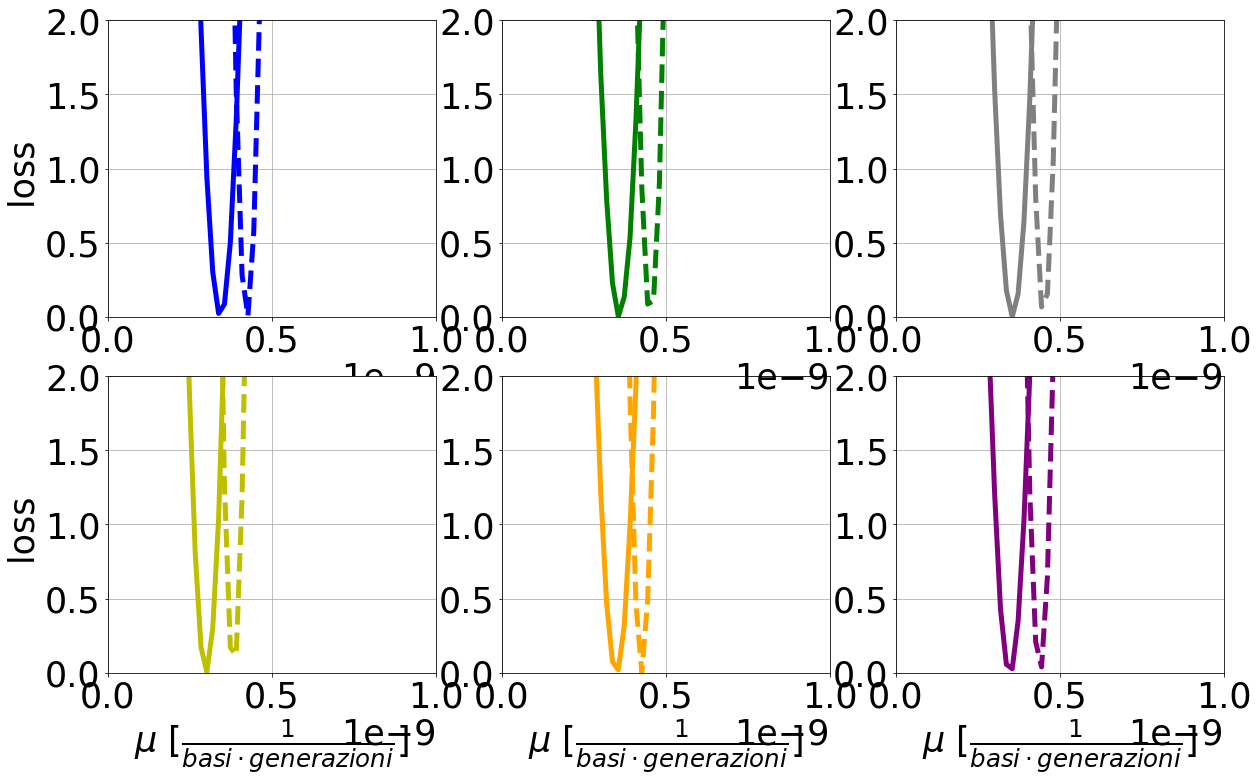

In [37]:
rami_err= np.loadtxt("C:../es_new/LC_CRC0327.txt", unpack='true')
mut=np.loadtxt("C:../es_new/mut_LC_CRC0327.txt", unpack='true')
mut_56=np.loadtxt("C:../es_new/mut_LC_CRC0327_Pa_0.56.txt", unpack='true')
mut_58=np.loadtxt("C:../es_new/mut_LC_CRC0327_Pa_0.53.txt", unpack='true')
mut_57=np.loadtxt("C:../es_new/mut_LC_CRC0327_Pa_0.57.txt", unpack='true')
mut_54=np.loadtxt("C:../es_new/mut_LC_CRC0327_Pa_0.54.txt", unpack='true')
mut_55=np.loadtxt("C:../es_new/mut_LC_CRC0327_Pa_0.55.txt", unpack='true')

datia=np.array([518,570,439,759,841,1048])
datid=np.array([746,704,619,629,914,833,884,1123,1161,879,1101,1176])
datie=np.array([1052,1094,974,1055,887,1169])
datif=np.array([1671,1798,1723,1858,1888,2178,2063,2048,2270])

n1=50
n_tr=1000

mu=8.7505E-10
x=np.linspace(mu*0.1,mu*0.1+(50*mu*0.02), 50)
mu_mean=1.44585E-9
matr_a=np.zeros((n1,2))
mu_rate(matr_a, n1, mut[0] )
matr_d=np.zeros((n1,2))
mu_rate(matr_d, n1, mut[3] )
matr_e=np.zeros((n1,2))
mu_rate(matr_e, n1, mut[4] )

matr_a_58=np.zeros((n1,2))
mu_rate(matr_a_58, n1, mut_58[0] )
matr_d_58=np.zeros((n1,2))
mu_rate(matr_d_58, n1, mut_58[3] )
matr_e_58=np.zeros((n1,2))
mu_rate(matr_e_58, n1, mut_58[4] )


matr_a_68=np.zeros((n1,2))
mu_rate(matr_a_68, n1, mut_55[0] )
matr_d_68=np.zeros((n1,2))
mu_rate(matr_d_68, n1, mut_55[3] )
matr_e_68=np.zeros((n1,2))
mu_rate(matr_e_68, n1, mut_55[4] )

matr_a_6=np.zeros((n1,2))
mu_rate(matr_a_6, n1, mut_54[0] )
matr_d_6=np.zeros((n1,2))
mu_rate(matr_d_6, n1, mut_54[3] )
matr_e_6=np.zeros((n1,2))
mu_rate(matr_e_6, n1, mut_54[4] )


matr_a_56=np.zeros((n1,2))
mu_rate(matr_a_56, n1, mut_56[0] )
matr_d_56=np.zeros((n1,2))
mu_rate(matr_d_56, n1, mut_56[3] )
matr_e_56=np.zeros((n1,2))
mu_rate(matr_e_56, n1, mut_56[4] )

matr_a_57=np.zeros((n1,2))
mu_rate(matr_a_57, n1, mut_57[0] )
matr_d_57=np.zeros((n1,2))
mu_rate(matr_d_57, n1, mut_57[3] )
matr_e_57=np.zeros((n1,2))
mu_rate(matr_e_57, n1, mut_57[4] )

fig = plt.figure(figsize=(20, 12))
plt.subplot(2,3, 1)
plt.plot(x, np.power((matr_a[:,0]-np.mean(datia))/np.sqrt(((np.power(matr_a[:,1],2)/n_tr) + (np.power(np.std(datia),2)/len(datia)) )),2), linestyle="solid",  color='b',  linewidth=5.0)
plt.plot(x, np.power((matr_d[:,0]-np.mean(datid))/np.sqrt(((np.power(matr_d[:,1],2)/n_tr) + (np.power(np.std(datid),2)/len(datid)) )),2),  linestyle="--",  color='b', linewidth=5.0)
plt.ylim(0, 2)
plt.ylabel(r'loss ')
plt.grid(True)
plt.xlim(0, 1E-9)

plt.subplot(2,3, 4)
plt.plot(x, np.power((matr_a_58[:,0]-np.mean(datia))/np.sqrt(((np.power(matr_a_58[:,1],2)/n_tr) + (np.power(np.std(datia),2)/len(datia)))),2),  linestyle="solid", color='y',  linewidth=5.0)
plt.plot(x, np.power((matr_d_58[:,0]-np.mean(datid))/np.sqrt(((np.power(matr_d_58[:,1],2)/n_tr) + (np.power(np.std(datid),2)/len(datid)) )),2),  linestyle="--", color='y', linewidth=5.0)
plt.ylim(0, 2)
plt.grid(True)
plt.xlim(0, 1E-9)
plt.ylabel(r'loss ')
plt.xlabel(r'$\mu$ $[\frac{1}{basi \cdot generazioni}]$')
plt.subplot(2,3, 6)
plt.plot(x, np.power((matr_a_68[:,0]-np.mean(datia))/np.sqrt(((np.power(matr_a_68[:,1],2)/n_tr) + (np.power(np.std(datia),2)/len(datia)))) ,2),  linestyle="solid", color='purple',  linewidth=5.0)
plt.plot(x, np.power((matr_d_68[:,0]-np.mean(datid))/np.sqrt(((np.power(matr_d_68[:,1],2)/n_tr) + (np.power(np.std(datid),2)/len(datid)) )),2),  linestyle="--", color='purple', linewidth=5.0)
plt.ylim(0, 2)
plt.xlabel(r'$\mu$ $[\frac{1}{basi \cdot generazioni}]$')
plt.grid(True)
plt.xlim(0, 1E-9)

plt.subplot(2,3, 5)
plt.plot(x, np.power((matr_a_6[:,0]-np.mean(datia))/np.sqrt(((np.power(matr_a_6[:,1],2)/n_tr) + (np.power(np.std(datia),2)/len(datia)))) ,2),  linestyle="solid", color='orange',  linewidth=5.0)
plt.plot(x, np.power((matr_d_6[:,0]-np.mean(datid))/np.sqrt(((np.power(matr_d_6[:,1],2)/n_tr) + (np.power(np.std(datid),2)/len(datid)) )),2),  linestyle="--", color='orange', linewidth=5.0)
plt.xlabel(r'$\mu$ $[\frac{1}{basi \cdot generazioni}]$')


plt.ylim(0, 2)
plt.grid(True)
plt.xlim(0, 1E-9)

plt.subplot(2,3, 2)
plt.plot(x, np.power((matr_a_56[:,0]-np.mean(datia))/np.sqrt(((np.power(matr_a_56[:,1],2)/n_tr) + (np.power(np.std(datia),2)/len(datia)))) ,2),  linestyle="solid", color='g',  linewidth=5.0)
plt.plot(x, np.power((matr_d_56[:,0]-np.mean(datid))/np.sqrt(((np.power(matr_d_56[:,1],2)/n_tr) + (np.power(np.std(datid),2)/len(datid)) )),2), linestyle="--", color='g', linewidth=5.0)


plt.grid(True)
plt.ylim(0, 2)
plt.xlim(0, 1E-9)

plt.subplot(2,3, 3)   
plt.plot(x, np.power((matr_a_57[:,0]-np.mean(datia))/np.sqrt(((np.power(matr_a_57[:,1],2)/n_tr) + (np.power(np.std(datia),2)/len(datia)))),2) ,  linestyle="solid", color='grey',  linewidth=5.0)
plt.plot(x, np.power((matr_d_57[:,0]-np.mean(datid))/np.sqrt(((np.power(matr_d_57[:,1],2)/n_tr) + (np.power(np.std(datid),2)/len(datid)) )),2),  linestyle="--", color='grey',  linewidth=5.0)


plt.grid(True) 
plt.ylim(0, 2)
plt.xlim(0, 1E-9)


[8.75050000e-11 1.05363163e-10 1.23221327e-10 1.41079490e-10
 1.58937653e-10 1.76795816e-10 1.94653980e-10 2.12512143e-10
 2.30370306e-10 2.48228469e-10 2.66086633e-10 2.83944796e-10
 3.01802959e-10 3.19661122e-10 3.37519286e-10 3.55377449e-10
 3.73235612e-10 3.91093776e-10 4.08951939e-10 4.26810102e-10
 4.44668265e-10 4.62526429e-10 4.80384592e-10 4.98242755e-10
 5.16100918e-10 5.33959082e-10 5.51817245e-10 5.69675408e-10
 5.87533571e-10 6.05391735e-10 6.23249898e-10 6.41108061e-10
 6.58966224e-10 6.76824388e-10 6.94682551e-10 7.12540714e-10
 7.30398878e-10 7.48257041e-10 7.66115204e-10 7.83973367e-10
 8.01831531e-10 8.19689694e-10 8.37547857e-10 8.55406020e-10
 8.73264184e-10 8.91122347e-10 9.08980510e-10 9.26838673e-10
 9.44696837e-10 9.62555000e-10]


(0.0, 1e-09)

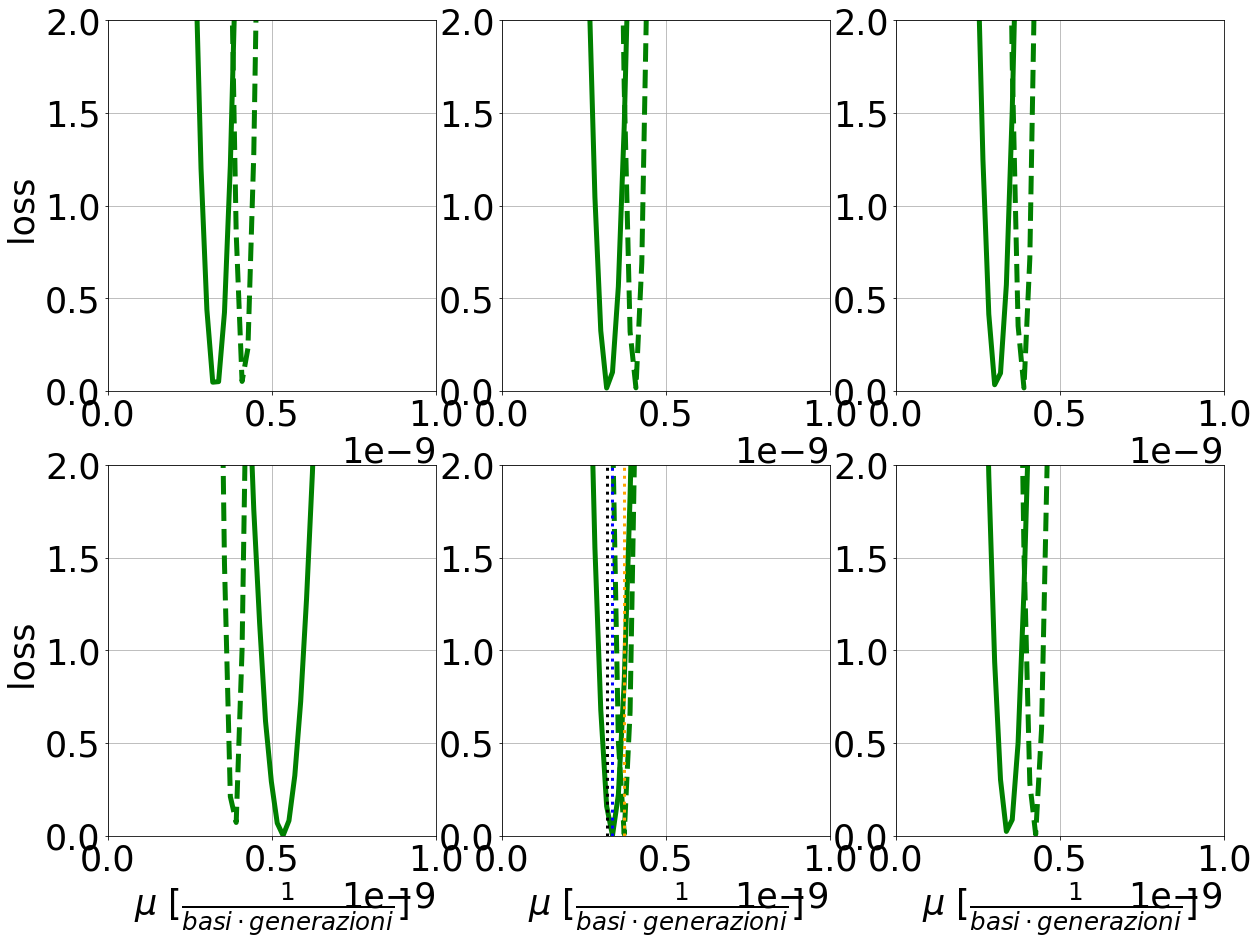

In [72]:
rami_err_07= np.loadtxt("C:../es_new/LC_CRC0327.txt", unpack='true')
mut_07_6=np.loadtxt("C:../es_new/mut_LC_CRC0327.txt", unpack='true')
mut_07_160=np.loadtxt("C:../es_new/mut_LC_CRC0327_ngen0_210.txt", unpack='true')
mut_07_150=np.loadtxt("C:../es_new/mut_LC_CRC0327_ngen0_200.txt", unpack='true')
mut_07_170=np.loadtxt("C:../es_new/mut_LC_CRC0327_ngen0_220.txt", unpack='true')
mut_07_130=np.loadtxt("C:../es_new/mut_LC_CRC0327_ngen0_180.txt", unpack='true')
mut_07_140=np.loadtxt("C:../es_new/mut_LC_CRC0327_ngen0_190.txt", unpack='true')
datia=np.array([518,570,439,759,841,1048])
datid=np.array([746,704,619,629,914,833,884,1123,1161,879,1101,1176])
datie=np.array([1052,1094,974,1055,887,1169])
datif=np.array([1671,1798,1723,1858,1888,2178,2063,2048,2270])

n1=50
n_tr=1000
N_m=5595688850
N_b_15=5316401584
N_b_27=5072406807
N_b_LM=4818048167
N_b_PR=2495801608
N_b_07=4600467279
N_b_82=2748711013
N_b_82_7=820828872.5
mu=8.7505E-10
x=np.linspace(mu*0.1,mu*0.1+(50*mu*0.02), 50)
print(x)
matr_a_07_170=np.zeros((n1,2))
mu_rate(matr_a_07_170, n1, mut_07_170[0] )
matr_d_07_170=np.zeros((n1,2))
mu_rate(matr_d_07_170, n1, mut_07_170[3] )
matr_e_07_170=np.zeros((n1,2))
mu_rate(matr_e_07_170, n1, mut_07_170[4] )

matr_a_07_6=np.zeros((n1,2))
mu_rate(matr_a_07_6, n1, mut_07_6[0] )
matr_d_07_6=np.zeros((n1,2))
mu_rate(matr_d_07_6, n1, mut_07_6[3] )
matr_e_07_6=np.zeros((n1,2))
mu_rate(matr_e_07_6, n1, mut_07_6[4] )

matr_a_07_150=np.zeros((n1,2))
mu_rate(matr_a_07_150, n1, mut_07_150[0] )
matr_d_07_150=np.zeros((n1,2))
mu_rate(matr_d_07_150, n1, mut_07_150[3] )
matr_e_07_150=np.zeros((n1,2))
mu_rate(matr_e_07_150, n1, mut_07_150[4] )


matr_a_07_160=np.zeros((n1,2))
mu_rate(matr_a_07_160, n1, mut_07_160[0] )
matr_d_07_160=np.zeros((n1,2))
mu_rate(matr_d_07_160, n1, mut_07_160[3] )
matr_e_07_160=np.zeros((n1,2))
mu_rate(matr_e_07_160, n1, mut_07_160[4] )

matr_a_07_130=np.zeros((n1,2))
mu_rate(matr_a_07_130, n1, mut_07_130[0] )
matr_d_07_130=np.zeros((n1,2))
mu_rate(matr_d_07_130, n1, mut_07_130[3] )
matr_e_07_130=np.zeros((n1,2))
mu_rate(matr_e_07_130, n1, mut_07_130[4] )


matr_a_07_140=np.zeros((n1,2))
mu_rate(matr_a_07_140, n1, mut_07_140[0] )
matr_d_07_140=np.zeros((n1,2))
mu_rate(matr_d_07_140, n1, mut_07_140[3] )
matr_e_07_140=np.zeros((n1,2))
mu_rate(matr_e_07_140, n1, mut_07_140[4] )

fig = plt.figure(figsize=(20, 15))

plt.axhline(y=0, color='red', linestyle='dotted',linewidth=4 )

plt.subplot(2,3, 1)
plt.plot(x, np.power((matr_a_07_130[:,0]-np.mean(datia))/np.sqrt(((np.power(matr_a_07_130[:,1],2)/n_tr) + (np.power(np.std(datia),2)/len(datia)))) ,2),  linestyle="solid", color='g',  linewidth=5.0)
plt.plot(x, np.power((matr_d_07_130[:,0]-np.mean(datid))/np.sqrt(((np.power(matr_d_07_130[:,1],2)/n_tr) + (np.power(np.std(datid),2)/len(datid)) )),2),  linestyle="--", color='g', linewidth=5.0)
plt.ylim(0, 2)

plt.ylabel(r'loss ')
plt.grid(True)
plt.xlim(0, 1E-9)
plt.xlim(0, 1E-9)
plt.subplot(2,3,2)
plt.plot(x, np.power((matr_a_07_140[:,0]-np.mean(datia))/np.sqrt(((np.power(matr_a_07_140[:,1],2)/n_tr) + (np.power(np.std(datia),2)/len(datia)))) ,2),  linestyle="solid", color='g',  linewidth=5.0)
plt.plot(x, np.power((matr_d_07_140[:,0]-np.mean(datid))/np.sqrt(((np.power(matr_d_07_140[:,1],2)/n_tr) + (np.power(np.std(datid),2)/len(datid)) )),2),  linestyle="--", color='g', linewidth=5.0)


plt.ylim(0, 2)
plt.grid(True)
plt.xlim(0, 1E-9)

plt.subplot(2,3,3)
plt.plot(x, np.power((matr_a_07_150[:,0]-np.mean(datia))/np.sqrt(((np.power(matr_a_07_150[:,1],2)/n_tr) + (np.power(np.std(datia),2)/len(datia)))) ,2),  linestyle="solid", color='g',  linewidth=5.0)
plt.plot(x, np.power((matr_d_07_150[:,0]-np.mean(datid))/np.sqrt(((np.power(matr_d_07_150[:,1],2)/n_tr) + (np.power(np.std(datid),2)/len(datid)) )),2), linestyle="--", color='g', linewidth=5.0)


plt.grid(True)
plt.ylim(0, 2)
plt.xlim(0, 1E-9)

plt.subplot(2,3,4)
plt.plot(x, np.power((matr_a_07_160[:,0]-np.mean(datia))/np.sqrt(((np.power(matr_a_07_160[:,1],2)/n_tr) + (np.power(np.std(datia),2)/len(datia)))) ,2),  linestyle="solid", color='g',  linewidth=5.0)
plt.plot(x, np.power((matr_d_07_160[:,0]-np.mean(datid))/np.sqrt(((np.power(matr_d_07_160[:,1],2)/n_tr) + (np.power(np.std(datid),2)/len(datid)) )),2), linestyle="--", color='g', linewidth=5.0)
plt.xlabel(r'$\mu$ $[\frac{1}{basi \cdot generazioni}]$')
plt.ylabel(r'loss ')
plt.grid(True)
plt.ylim(0, 2)
plt.xlim(0, 1E-9)

plt.subplot( 2,3,  5)
plt.plot(x, np.power((matr_a_07_170[:,0]-np.mean(datia))/np.sqrt(((np.power(matr_a_07_170[:,1],2)/n_tr) + (np.power(np.std(datia),2)/len(datia)))) ,2),  linestyle="solid", color='g',  linewidth=5.0)
plt.plot(x, np.power((matr_d_07_170[:,0]-np.mean(datid))/np.sqrt(((np.power(matr_d_07_170[:,1],2)/n_tr) + (np.power(np.std(datid),2)/len(datid)) )),2), linestyle="--", color='g', linewidth=5.0)
plt.axvline(x= 3.73235612e-10 , color= 'orange', linewidth=3.0,linestyle='dotted')
plt.axvline(x=  3.37519286e-10  , color= 'b', linewidth=3.0,linestyle='dotted')
plt.axvline(x= 3.19661122e-10 , color= 'black', linewidth=3.0,linestyle='dotted')

plt.xlabel(r'$\mu$ $[\frac{1}{basi \cdot generazioni}]$')
plt.grid(True)
plt.ylim(0, 2)
plt.xlim(0, 1E-9)

plt.subplot(2, 3, 6)
plt.plot(x, np.power((matr_a_07_6[:,0]-np.mean(datia))/np.sqrt(((np.power(matr_a_07_6[:,1],2)/n_tr) + (np.power(np.std(datia),2)/len(datia)))) ,2),  linestyle="solid", color='g',  linewidth=5.0)
plt.plot(x, np.power((matr_d_07_6[:,0]-np.mean(datid))/np.sqrt(((np.power(matr_d_07_6[:,1],2)/n_tr) + (np.power(np.std(datid),2)/len(datid)) )),2), linestyle="--", color='g', linewidth=5.0)
plt.xlabel(r'$\mu$ $[\frac{1}{basi \cdot generazioni}]$')

plt.grid(True)
plt.ylim(0, 2)
plt.xlim(0, 1E-9)









### CRC1502

(0.0, 3e-09)

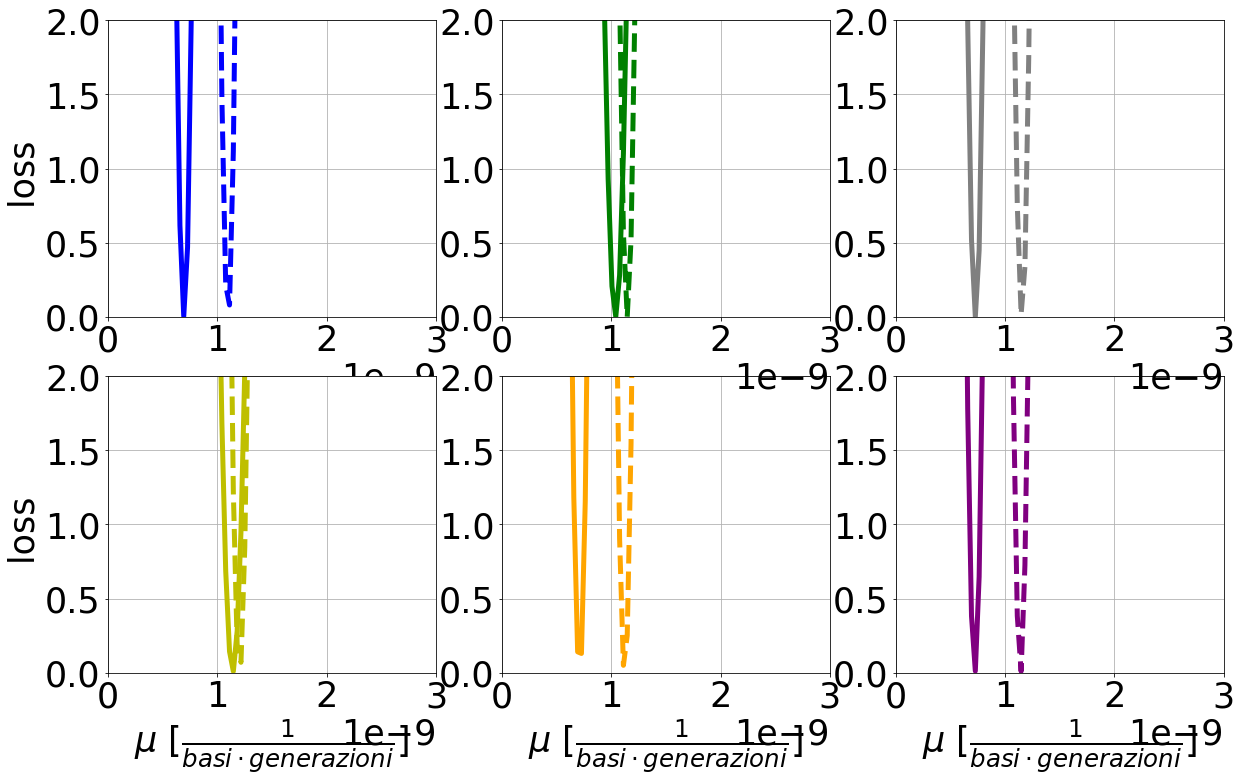

In [41]:
rami_err= np.loadtxt("C:../es_new/LC_CRC1502.txt", unpack='true')
mut=np.loadtxt("C:../es_new/mut_LC_CRC1502.txt", unpack='true')
mut_56=np.loadtxt("C:../es_new/mut_LC_CRC1502_Pa_0.56.txt", unpack='true')
mut_58=np.loadtxt("C:../es_new/mut_LC_CRC1502_Pa_0.58.txt", unpack='true')
mut_57=np.loadtxt("C:../es_new/mut_LC_CRC1502_Pa_0.57.txt", unpack='true')
mut_54=np.loadtxt("C:../es_new/mut_LC_CRC1502_Pa_0.54.txt", unpack='true')
mut_55=np.loadtxt("C:../es_new/mut_LC_CRC1502_Pa_0.55.txt", unpack='true')

datia=np.array([1503,2032,1529,1893,1369,1619,1081,1283])
datid=np.array([2136,2618,1775,1728,2206,2119,2318,2595,2950,2801,2945,2043,2960,2976,2486,2300])
datie=np.array([2661,2708,1651,1738,611,616,705,689])
datif=np.array([4797,4436,5326,3969,3857,4333,3561,3412,3662,3191,3665,2989])

n1=50
n_tr=1000

mu=1.70859E-09
x=np.linspace(mu*0.1,mu*0.1+(50*mu*0.02), 50)
mu_mean=1.44585E-9
matr_a=np.zeros((n1,2))
mu_rate(matr_a, n1, mut[0] )
matr_d=np.zeros((n1,2))
mu_rate(matr_d, n1, mut[3] )
matr_e=np.zeros((n1,2))
mu_rate(matr_e, n1, mut[4] )

matr_a_58=np.zeros((n1,2))
mu_rate(matr_a_58, n1, mut_58[0] )
matr_d_58=np.zeros((n1,2))
mu_rate(matr_d_58, n1, mut_58[3] )
matr_e_58=np.zeros((n1,2))
mu_rate(matr_e_58, n1, mut_58[4] )


matr_a_68=np.zeros((n1,2))
mu_rate(matr_a_68, n1, mut_55[0] )
matr_d_68=np.zeros((n1,2))
mu_rate(matr_d_68, n1, mut_55[3] )
matr_e_68=np.zeros((n1,2))
mu_rate(matr_e_68, n1, mut_55[4] )

matr_a_6=np.zeros((n1,2))
mu_rate(matr_a_6, n1, mut_54[0] )
matr_d_6=np.zeros((n1,2))
mu_rate(matr_d_6, n1, mut_54[3] )
matr_e_6=np.zeros((n1,2))
mu_rate(matr_e_6, n1, mut_54[4] )


matr_a_56=np.zeros((n1,2))
mu_rate(matr_a_56, n1, mut_56[0] )
matr_d_56=np.zeros((n1,2))
mu_rate(matr_d_56, n1, mut_56[3] )
matr_e_56=np.zeros((n1,2))
mu_rate(matr_e_56, n1, mut_56[4] )

matr_a_57=np.zeros((n1,2))
mu_rate(matr_a_57, n1, mut_57[0] )
matr_d_57=np.zeros((n1,2))
mu_rate(matr_d_57, n1, mut_57[3] )
matr_e_57=np.zeros((n1,2))
mu_rate(matr_e_57, n1, mut_57[4] )

fig = plt.figure(figsize=(20, 12))
plt.subplot(2,3, 1)
plt.plot(x, np.power((matr_a[:,0]-np.mean(datia))/np.sqrt(((np.power(matr_a[:,1],2)/n_tr) + (np.power(np.std(datia),2)/len(datia)) )),2), linestyle="solid",  color='b',  linewidth=5.0)
plt.plot(x, np.power((matr_d[:,0]-np.mean(datid))/np.sqrt(((np.power(matr_d[:,1],2)/n_tr) + (np.power(np.std(datid),2)/len(datid)) )),2),  linestyle="--",  color='b', linewidth=5.0)
plt.ylim(0, 2)
plt.ylabel(r'loss ')
plt.grid(True)
plt.xlim(0, 3E-9)

plt.subplot(2,3, 4)
plt.plot(x, np.power((matr_a_58[:,0]-np.mean(datia))/np.sqrt(((np.power(matr_a_58[:,1],2)/n_tr) + (np.power(np.std(datia),2)/len(datia)))),2),  linestyle="solid", color='y',  linewidth=5.0)
plt.plot(x, np.power((matr_d_58[:,0]-np.mean(datid))/np.sqrt(((np.power(matr_d_58[:,1],2)/n_tr) + (np.power(np.std(datid),2)/len(datid)) )),2),  linestyle="--", color='y', linewidth=5.0)
plt.ylim(0, 2)
plt.grid(True)
plt.xlim(0, 3E-9)
plt.ylabel(r'loss ')
plt.xlabel(r'$\mu$ $[\frac{1}{basi \cdot generazioni}]$')
plt.subplot(2,3, 6)
plt.plot(x, np.power((matr_a_68[:,0]-np.mean(datia))/np.sqrt(((np.power(matr_a_68[:,1],2)/n_tr) + (np.power(np.std(datia),2)/len(datia)))) ,2),  linestyle="solid", color='purple',  linewidth=5.0)
plt.plot(x, np.power((matr_d_68[:,0]-np.mean(datid))/np.sqrt(((np.power(matr_d_68[:,1],2)/n_tr) + (np.power(np.std(datid),2)/len(datid)) )),2),  linestyle="--", color='purple', linewidth=5.0)
plt.ylim(0, 2)
plt.xlabel(r'$\mu$ $[\frac{1}{basi \cdot generazioni}]$')
plt.grid(True)
plt.xlim(0, 3E-9)

plt.subplot(2,3, 5)
plt.plot(x, np.power((matr_a_6[:,0]-np.mean(datia))/np.sqrt(((np.power(matr_a_6[:,1],2)/n_tr) + (np.power(np.std(datia),2)/len(datia)))) ,2),  linestyle="solid", color='orange',  linewidth=5.0)
plt.plot(x, np.power((matr_d_6[:,0]-np.mean(datid))/np.sqrt(((np.power(matr_d_6[:,1],2)/n_tr) + (np.power(np.std(datid),2)/len(datid)) )),2),  linestyle="--", color='orange', linewidth=5.0)
plt.xlabel(r'$\mu$ $[\frac{1}{basi \cdot generazioni}]$')


plt.ylim(0, 2)
plt.grid(True)
plt.xlim(0, 3E-9)

plt.subplot(2,3, 2)
plt.plot(x, np.power((matr_a_56[:,0]-np.mean(datia))/np.sqrt(((np.power(matr_a_56[:,1],2)/n_tr) + (np.power(np.std(datia),2)/len(datia)))) ,2),  linestyle="solid", color='g',  linewidth=5.0)
plt.plot(x, np.power((matr_d_56[:,0]-np.mean(datid))/np.sqrt(((np.power(matr_d_56[:,1],2)/n_tr) + (np.power(np.std(datid),2)/len(datid)) )),2), linestyle="--", color='g', linewidth=5.0)


plt.grid(True)
plt.ylim(0, 2)
plt.xlim(0, 3E-9)

plt.subplot(2,3, 3)   
plt.plot(x, np.power((matr_a_57[:,0]-np.mean(datia))/np.sqrt(((np.power(matr_a_57[:,1],2)/n_tr) + (np.power(np.std(datia),2)/len(datia)))),2) ,  linestyle="solid", color='grey',  linewidth=5.0)
plt.plot(x, np.power((matr_d_57[:,0]-np.mean(datid))/np.sqrt(((np.power(matr_d_57[:,1],2)/n_tr) + (np.power(np.std(datid),2)/len(datid)) )),2),  linestyle="--", color='grey',  linewidth=5.0)


plt.grid(True) 
plt.ylim(0, 2)
plt.xlim(0, 3E-9)


[1.70859000e-10 2.05728184e-10 2.40597367e-10 2.75466551e-10
 3.10335735e-10 3.45204918e-10 3.80074102e-10 4.14943286e-10
 4.49812469e-10 4.84681653e-10 5.19550837e-10 5.54420020e-10
 5.89289204e-10 6.24158388e-10 6.59027571e-10 6.93896755e-10
 7.28765939e-10 7.63635122e-10 7.98504306e-10 8.33373490e-10
 8.68242673e-10 9.03111857e-10 9.37981041e-10 9.72850224e-10
 1.00771941e-09 1.04258859e-09 1.07745778e-09 1.11232696e-09
 1.14719614e-09 1.18206533e-09 1.21693451e-09 1.25180369e-09
 1.28667288e-09 1.32154206e-09 1.35641124e-09 1.39128043e-09
 1.42614961e-09 1.46101880e-09 1.49588798e-09 1.53075716e-09
 1.56562635e-09 1.60049553e-09 1.63536471e-09 1.67023390e-09
 1.70510308e-09 1.73997227e-09 1.77484145e-09 1.80971063e-09
 1.84457982e-09 1.87944900e-09]


(0.0, 3e-09)

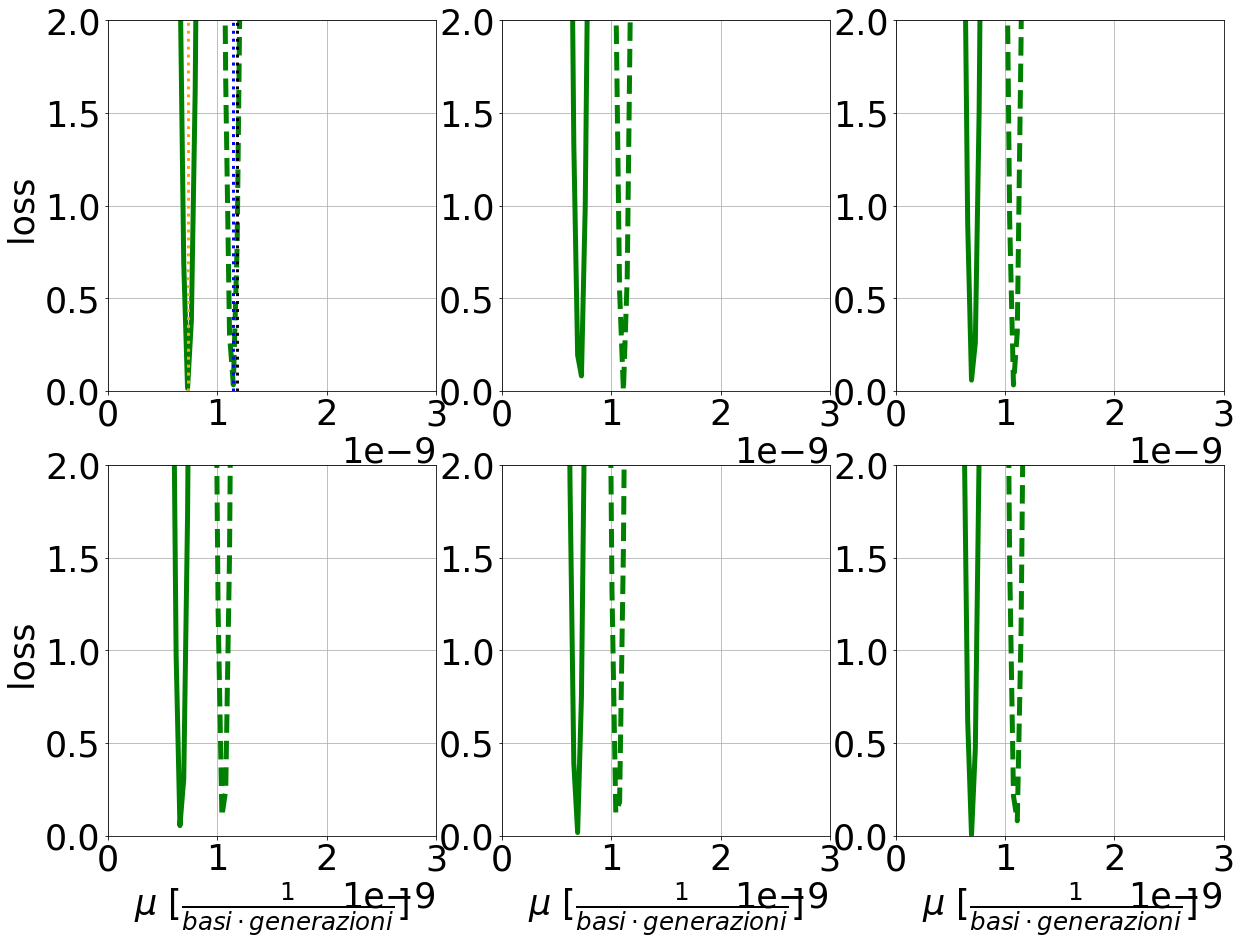

In [75]:
rami_err_07= np.loadtxt("C:../es_new/LC_CRC1502_Pa_0.58.txt", unpack='true')
mut_07_6=np.loadtxt("C:../es_new/mut_LC_CRC1502.txt", unpack='true')
mut_07_160=np.loadtxt("C:../es_new/mut_LC_CRC1502_Pa_0.58_ngen0_130.txt", unpack='true')
mut_07_150=np.loadtxt("C:../es_new/mut_LC_CRC1502_Pa_0.58_ngen0_120.txt", unpack='true')
mut_07_170=np.loadtxt("C:../es_new/mut_LC_CRC1502_Pa_0.58_ngen0_140.txt", unpack='true')
mut_07_130=np.loadtxt("C:../es_new/mut_LC_CRC1502_Pa_0.58_ngen0_100.txt", unpack='true')
mut_07_140=np.loadtxt("C:../es_new/mut_LC_CRC1502_Pa_0.58_ngen0_110.txt", unpack='true')
datia=np.array([1503,2032,1529,1893,1369,1619,1081,1283])
datid=np.array([2136,2618,1775,1728,2206,2119,2318,2595,2950,2801,2945,2043,2960,2976,2486,2300])
datie=np.array([2661,2708,1651,1738,611,616,705,689])
datif=np.array([4797,4436,5326,3969,3857,4333,3561,3412,3662,3191,3665,2989])

n1=50
n_tr=1000
N_m=5595688850
N_b_15=5316401584
N_b_27=5072406807
N_b_LM=4818048167
N_b_PR=2495801608
N_b_07=4600467279
N_b_82=2748711013
N_b_82_7=820828872.5
mu=1.70859E-09
x=np.linspace(mu*0.1,mu*0.1+(50*mu*0.02), 50)
print(x)
matr_a_07_170=np.zeros((n1,2))
mu_rate(matr_a_07_170, n1, mut_07_170[0] )
matr_d_07_170=np.zeros((n1,2))
mu_rate(matr_d_07_170, n1, mut_07_170[3] )
matr_e_07_170=np.zeros((n1,2))
mu_rate(matr_e_07_170, n1, mut_07_170[4] )

matr_a_07_6=np.zeros((n1,2))
mu_rate(matr_a_07_6, n1, mut_07_6[0] )
matr_d_07_6=np.zeros((n1,2))
mu_rate(matr_d_07_6, n1, mut_07_6[3] )
matr_e_07_6=np.zeros((n1,2))
mu_rate(matr_e_07_6, n1, mut_07_6[4] )

matr_a_07_150=np.zeros((n1,2))
mu_rate(matr_a_07_150, n1, mut_07_150[0] )
matr_d_07_150=np.zeros((n1,2))
mu_rate(matr_d_07_150, n1, mut_07_150[3] )
matr_e_07_150=np.zeros((n1,2))
mu_rate(matr_e_07_150, n1, mut_07_150[4] )


matr_a_07_160=np.zeros((n1,2))
mu_rate(matr_a_07_160, n1, mut_07_160[0] )
matr_d_07_160=np.zeros((n1,2))
mu_rate(matr_d_07_160, n1, mut_07_160[3] )
matr_e_07_160=np.zeros((n1,2))
mu_rate(matr_e_07_160, n1, mut_07_160[4] )

matr_a_07_130=np.zeros((n1,2))
mu_rate(matr_a_07_130, n1, mut_07_130[0] )
matr_d_07_130=np.zeros((n1,2))
mu_rate(matr_d_07_130, n1, mut_07_130[3] )
matr_e_07_130=np.zeros((n1,2))
mu_rate(matr_e_07_130, n1, mut_07_130[4] )


matr_a_07_140=np.zeros((n1,2))
mu_rate(matr_a_07_140, n1, mut_07_140[0] )
matr_d_07_140=np.zeros((n1,2))
mu_rate(matr_d_07_140, n1, mut_07_140[3] )
matr_e_07_140=np.zeros((n1,2))
mu_rate(matr_e_07_140, n1, mut_07_140[4] )

fig = plt.figure(figsize=(20, 15))

plt.axhline(y=0, color='red', linestyle='dotted',linewidth=4 )

plt.subplot(2,3, 1)
plt.plot(x, np.power((matr_a_07_130[:,0]-np.mean(datia))/np.sqrt(((np.power(matr_a_07_130[:,1],2)/n_tr) + (np.power(np.std(datia),2)/len(datia)))) ,2),  linestyle="solid", color='g',  linewidth=5.0)
plt.plot(x, np.power((matr_d_07_130[:,0]-np.mean(datid))/np.sqrt(((np.power(matr_d_07_130[:,1],2)/n_tr) + (np.power(np.std(datid),2)/len(datid)) )),2),  linestyle="--", color='g', linewidth=5.0)
plt.axvline(x=  7.28765939e-10 , color= 'orange', linewidth=3.0,linestyle='dotted')
plt.axvline(x=1.14719614e-09, color= 'b', linewidth=3.0,linestyle='dotted')
plt.axvline(x= 1.18206533e-09 , color= 'black', linewidth=3.0,linestyle='dotted')

plt.ylim(0, 2)

plt.ylabel(r'loss ')
plt.grid(True)
plt.xlim(0, 3E-9)
plt.subplot(2,3,2)
plt.plot(x, np.power((matr_a_07_140[:,0]-np.mean(datia))/np.sqrt(((np.power(matr_a_07_140[:,1],2)/n_tr) + (np.power(np.std(datia),2)/len(datia)))) ,2),  linestyle="solid", color='g',  linewidth=5.0)
plt.plot(x, np.power((matr_d_07_140[:,0]-np.mean(datid))/np.sqrt(((np.power(matr_d_07_140[:,1],2)/n_tr) + (np.power(np.std(datid),2)/len(datid)) )),2),  linestyle="--", color='g', linewidth=5.0)


plt.ylim(0, 2)
plt.grid(True)
plt.xlim(0, 3E-9)

plt.subplot(2,3,3)
plt.plot(x, np.power((matr_a_07_150[:,0]-np.mean(datia))/np.sqrt(((np.power(matr_a_07_150[:,1],2)/n_tr) + (np.power(np.std(datia),2)/len(datia)))) ,2),  linestyle="solid", color='g',  linewidth=5.0)
plt.plot(x, np.power((matr_d_07_150[:,0]-np.mean(datid))/np.sqrt(((np.power(matr_d_07_150[:,1],2)/n_tr) + (np.power(np.std(datid),2)/len(datid)) )),2), linestyle="--", color='g', linewidth=5.0)


plt.grid(True)
plt.ylim(0, 2)
plt.xlim(0, 3E-9)

plt.subplot(2,3,4)
plt.plot(x, np.power((matr_a_07_160[:,0]-np.mean(datia))/np.sqrt(((np.power(matr_a_07_160[:,1],2)/n_tr) + (np.power(np.std(datia),2)/len(datia)))) ,2),  linestyle="solid", color='g',  linewidth=5.0)
plt.plot(x, np.power((matr_d_07_160[:,0]-np.mean(datid))/np.sqrt(((np.power(matr_d_07_160[:,1],2)/n_tr) + (np.power(np.std(datid),2)/len(datid)) )),2), linestyle="--", color='g', linewidth=5.0)
plt.xlabel(r'$\mu$ $[\frac{1}{basi \cdot generazioni}]$')
plt.ylabel(r'loss ')
plt.grid(True)
plt.ylim(0, 2)
plt.xlim(0, 3E-9)

plt.subplot( 2,3,  5)
plt.plot(x, np.power((matr_a_07_170[:,0]-np.mean(datia))/np.sqrt(((np.power(matr_a_07_170[:,1],2)/n_tr) + (np.power(np.std(datia),2)/len(datia)))) ,2),  linestyle="solid", color='g',  linewidth=5.0)
plt.plot(x, np.power((matr_d_07_170[:,0]-np.mean(datid))/np.sqrt(((np.power(matr_d_07_170[:,1],2)/n_tr) + (np.power(np.std(datid),2)/len(datid)) )),2), linestyle="--", color='g', linewidth=5.0)

plt.xlabel(r'$\mu$ $[\frac{1}{basi \cdot generazioni}]$')
plt.grid(True)
plt.ylim(0, 2)
plt.xlim(0, 3E-9)

plt.subplot(2, 3, 6)
plt.plot(x, np.power((matr_a_07_6[:,0]-np.mean(datia))/np.sqrt(((np.power(matr_a_07_6[:,1],2)/n_tr) + (np.power(np.std(datia),2)/len(datia)))) ,2),  linestyle="solid", color='g',  linewidth=5.0)
plt.plot(x, np.power((matr_d_07_6[:,0]-np.mean(datid))/np.sqrt(((np.power(matr_d_07_6[:,1],2)/n_tr) + (np.power(np.std(datid),2)/len(datid)) )),2), linestyle="--", color='g', linewidth=5.0)
plt.xlabel(r'$\mu$ $[\frac{1}{basi \cdot generazioni}]$')

plt.grid(True)
plt.ylim(0, 2)
plt.xlim(0, 3E-9)









### CRC0282

(0.0, 1e-08)

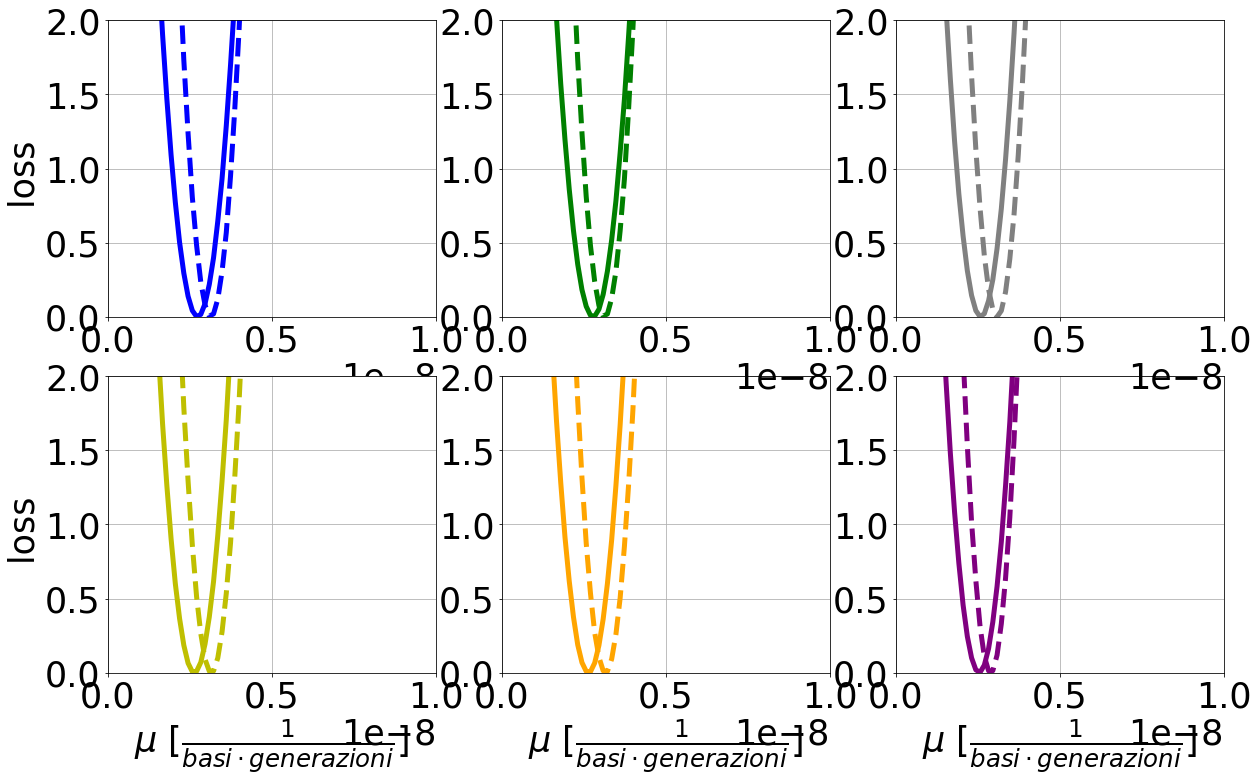

In [58]:
rami_err= np.loadtxt("C:../es_new/LC_CRC0282.txt", unpack='true')
mut=np.loadtxt("C:../es_new/mut_LC_CRC0282.txt", unpack='true')
mut_56=np.loadtxt("C:../es_new/mut_LC_CRC0282_Pa_0.56.txt", unpack='true')
mut_58=np.loadtxt("C:../es_new/mut_LC_CRC0282_Pa_0.58.txt", unpack='true')
mut_57=np.loadtxt("C:../es_new/mut_LC_CRC0282_Pa_0.57.txt", unpack='true')
mut_54=np.loadtxt("C:../es_new/mut_LC_CRC0282_Pa_0.59.txt", unpack='true')
mut_55=np.loadtxt("C:../es_new/mut_LC_CRC0282_Pa_0.55.txt", unpack='true')

datia=np.array([5007,4393,1262,1240,1124,1307])
datid=np.array([6133,6214,4802,5335,1647,1634,1386,1351,1582,1581,1554,1370])
datie=np.array([10661,10580,2543,2556,2617,2618])
datif=np.array([3929,4190,4199,4171,3988,15996,16794,15382])

n1=50
n_tr=1000

mu=6.33828E-09
x=np.linspace(mu*0.1,mu*0.1+(50*mu*0.02), 50)
mu_mean=1.44585E-9
matr_a=np.zeros((n1,2))
mu_rate(matr_a, n1, mut[0] )
matr_d=np.zeros((n1,2))
mu_rate(matr_d, n1, mut[3] )
matr_e=np.zeros((n1,2))
mu_rate(matr_e, n1, mut[4] )

matr_a_58=np.zeros((n1,2))
mu_rate(matr_a_58, n1, mut_58[0] )
matr_d_58=np.zeros((n1,2))
mu_rate(matr_d_58, n1, mut_58[3] )
matr_e_58=np.zeros((n1,2))
mu_rate(matr_e_58, n1, mut_58[4] )


matr_a_68=np.zeros((n1,2))
mu_rate(matr_a_68, n1, mut_55[0] )
matr_d_68=np.zeros((n1,2))
mu_rate(matr_d_68, n1, mut_55[3] )
matr_e_68=np.zeros((n1,2))
mu_rate(matr_e_68, n1, mut_55[4] )

matr_a_6=np.zeros((n1,2))
mu_rate(matr_a_6, n1, mut_54[0] )
matr_d_6=np.zeros((n1,2))
mu_rate(matr_d_6, n1, mut_54[3] )
matr_e_6=np.zeros((n1,2))
mu_rate(matr_e_6, n1, mut_54[4] )


matr_a_56=np.zeros((n1,2))
mu_rate(matr_a_56, n1, mut_56[0] )
matr_d_56=np.zeros((n1,2))
mu_rate(matr_d_56, n1, mut_56[3] )
matr_e_56=np.zeros((n1,2))
mu_rate(matr_e_56, n1, mut_56[4] )

matr_a_57=np.zeros((n1,2))
mu_rate(matr_a_57, n1, mut_57[0] )
matr_d_57=np.zeros((n1,2))
mu_rate(matr_d_57, n1, mut_57[3] )
matr_e_57=np.zeros((n1,2))
mu_rate(matr_e_57, n1, mut_57[4] )

fig = plt.figure(figsize=(20, 12))
plt.subplot(2,3, 1)
plt.plot(x, np.power((matr_a[:,0]-np.mean(datia))/np.sqrt(((np.power(matr_a[:,1],2)/n_tr) + (np.power(np.std(datia),2)/len(datia)) )),2), linestyle="solid",  color='b',  linewidth=5.0)
plt.plot(x, np.power((matr_d[:,0]-np.mean(datid))/np.sqrt(((np.power(matr_d[:,1],2)/n_tr) + (np.power(np.std(datid),2)/len(datid)) )),2),  linestyle="--",  color='b', linewidth=5.0)
plt.ylim(0, 2)
plt.ylabel(r'loss ')
plt.grid(True)
plt.xlim(0, 10E-9)

plt.subplot(2,3, 4)
plt.plot(x, np.power((matr_a_58[:,0]-np.mean(datia))/np.sqrt(((np.power(matr_a_58[:,1],2)/n_tr) + (np.power(np.std(datia),2)/len(datia)))),2),  linestyle="solid", color='y',  linewidth=5.0)
plt.plot(x, np.power((matr_d_58[:,0]-np.mean(datid))/np.sqrt(((np.power(matr_d_58[:,1],2)/n_tr) + (np.power(np.std(datid),2)/len(datid)) )),2),  linestyle="--", color='y', linewidth=5.0)
plt.ylim(0, 2)
plt.grid(True)
plt.xlim(0, 10E-9)
plt.ylabel(r'loss ')
plt.xlabel(r'$\mu$ $[\frac{1}{basi \cdot generazioni}]$')
plt.subplot(2,3, 6)
plt.plot(x, np.power((matr_a_68[:,0]-np.mean(datia))/np.sqrt(((np.power(matr_a_68[:,1],2)/n_tr) + (np.power(np.std(datia),2)/len(datia)))) ,2),  linestyle="solid", color='purple',  linewidth=5.0)
plt.plot(x, np.power((matr_d_68[:,0]-np.mean(datid))/np.sqrt(((np.power(matr_d_68[:,1],2)/n_tr) + (np.power(np.std(datid),2)/len(datid)) )),2),  linestyle="--", color='purple', linewidth=5.0)
plt.ylim(0, 2)
plt.xlabel(r'$\mu$ $[\frac{1}{basi \cdot generazioni}]$')
plt.grid(True)
plt.xlim(0, 10E-9)

plt.subplot(2,3, 5)
plt.plot(x, np.power((matr_a_6[:,0]-np.mean(datia))/np.sqrt(((np.power(matr_a_6[:,1],2)/n_tr) + (np.power(np.std(datia),2)/len(datia)))) ,2),  linestyle="solid", color='orange',  linewidth=5.0)
plt.plot(x, np.power((matr_d_6[:,0]-np.mean(datid))/np.sqrt(((np.power(matr_d_6[:,1],2)/n_tr) + (np.power(np.std(datid),2)/len(datid)) )),2),  linestyle="--", color='orange', linewidth=5.0)
plt.xlabel(r'$\mu$ $[\frac{1}{basi \cdot generazioni}]$')


plt.ylim(0, 2)
plt.grid(True)
plt.xlim(0, 10E-9)

plt.subplot(2,3, 2)
plt.plot(x, np.power((matr_a_56[:,0]-np.mean(datia))/np.sqrt(((np.power(matr_a_56[:,1],2)/n_tr) + (np.power(np.std(datia),2)/len(datia)))) ,2),  linestyle="solid", color='g',  linewidth=5.0)
plt.plot(x, np.power((matr_d_56[:,0]-np.mean(datid))/np.sqrt(((np.power(matr_d_56[:,1],2)/n_tr) + (np.power(np.std(datid),2)/len(datid)) )),2), linestyle="--", color='g', linewidth=5.0)


plt.grid(True)
plt.ylim(0, 2)
plt.xlim(0, 10E-9)

plt.subplot(2,3, 3)   
plt.plot(x, np.power((matr_a_57[:,0]-np.mean(datia))/np.sqrt(((np.power(matr_a_57[:,1],2)/n_tr) + (np.power(np.std(datia),2)/len(datia)))),2) ,  linestyle="solid", color='grey',  linewidth=5.0)
plt.plot(x, np.power((matr_d_57[:,0]-np.mean(datid))/np.sqrt(((np.power(matr_d_57[:,1],2)/n_tr) + (np.power(np.std(datid),2)/len(datid)) )),2),  linestyle="--", color='grey',  linewidth=5.0)


plt.grid(True) 
plt.ylim(0, 2)
plt.xlim(0, 10E-9)


[1.70859000e-10 2.05728184e-10 2.40597367e-10 2.75466551e-10
 3.10335735e-10 3.45204918e-10 3.80074102e-10 4.14943286e-10
 4.49812469e-10 4.84681653e-10 5.19550837e-10 5.54420020e-10
 5.89289204e-10 6.24158388e-10 6.59027571e-10 6.93896755e-10
 7.28765939e-10 7.63635122e-10 7.98504306e-10 8.33373490e-10
 8.68242673e-10 9.03111857e-10 9.37981041e-10 9.72850224e-10
 1.00771941e-09 1.04258859e-09 1.07745778e-09 1.11232696e-09
 1.14719614e-09 1.18206533e-09 1.21693451e-09 1.25180369e-09
 1.28667288e-09 1.32154206e-09 1.35641124e-09 1.39128043e-09
 1.42614961e-09 1.46101880e-09 1.49588798e-09 1.53075716e-09
 1.56562635e-09 1.60049553e-09 1.63536471e-09 1.67023390e-09
 1.70510308e-09 1.73997227e-09 1.77484145e-09 1.80971063e-09
 1.84457982e-09 1.87944900e-09]


(0.0, 1e-09)

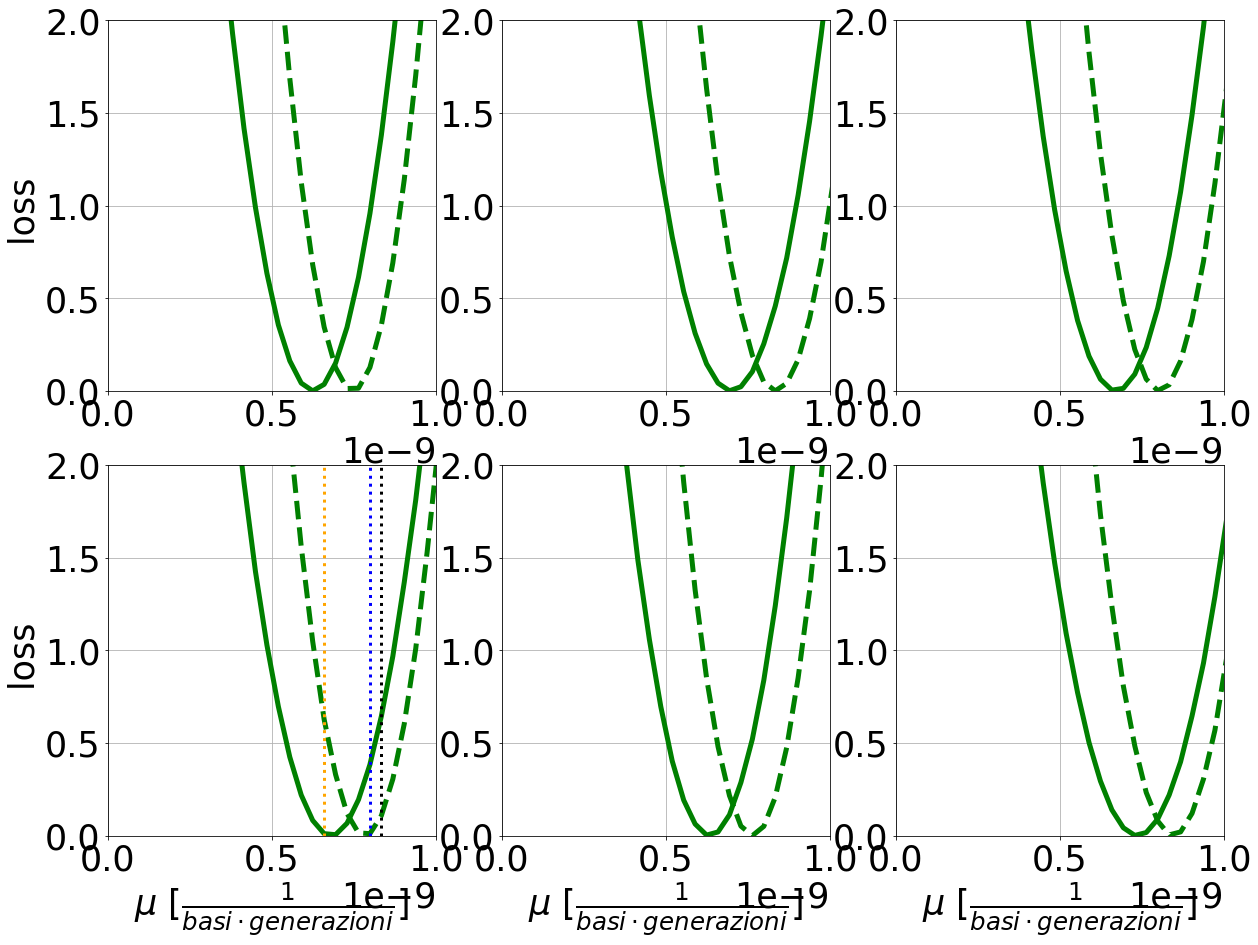

In [78]:
rami_err_07= np.loadtxt("C:../es_new/LC_CRC0282.txt", unpack='true')
mut_07_6=np.loadtxt("C:../es_new/mut_LC_CRC0282.txt", unpack='true')
mut_07_160=np.loadtxt("C:../es_new/mut_LC_CRC0282_ngen0_130.txt", unpack='true')
mut_07_150=np.loadtxt("C:../es_new/mut_LC_CRC0282_ngen0_120.txt", unpack='true')
mut_07_170=np.loadtxt("C:../es_new/mut_LC_CRC0282_ngen0_140.txt", unpack='true')
mut_07_130=np.loadtxt("C:../es_new/mut_LC_CRC0282_ngen0_150.txt", unpack='true')
mut_07_140=np.loadtxt("C:../es_new/mut_LC_CRC0282_ngen0_110.txt", unpack='true')
datia=np.array([5007,4393,1262,1240,1124,1307])
datid=np.array([6133,6214,4802,5335,1647,1634,1386,1351,1582,1581,1554,1370])
datie=np.array([10661,10580,2543,2556,2617,2618])
datif=np.array([3929,4190,4199,4171,3988,15996,16794,15382])
n1=50
n_tr=1000
N_m=5595688850
N_b_15=5316401584
N_b_27=5072406807
N_b_LM=4818048167
N_b_PR=2495801608
N_b_07=4600467279
N_b_82=2748711013
N_b_82_7=820828872.5
mu=1.70859E-09
x=np.linspace(mu*0.1,mu*0.1+(50*mu*0.02), 50)
print(x)
matr_a_07_170=np.zeros((n1,2))
mu_rate(matr_a_07_170, n1, mut_07_170[0] )
matr_d_07_170=np.zeros((n1,2))
mu_rate(matr_d_07_170, n1, mut_07_170[3] )
matr_e_07_170=np.zeros((n1,2))
mu_rate(matr_e_07_170, n1, mut_07_170[4] )

matr_a_07_6=np.zeros((n1,2))
mu_rate(matr_a_07_6, n1, mut_07_6[0] )
matr_d_07_6=np.zeros((n1,2))
mu_rate(matr_d_07_6, n1, mut_07_6[3] )
matr_e_07_6=np.zeros((n1,2))
mu_rate(matr_e_07_6, n1, mut_07_6[4] )

matr_a_07_150=np.zeros((n1,2))
mu_rate(matr_a_07_150, n1, mut_07_150[0] )
matr_d_07_150=np.zeros((n1,2))
mu_rate(matr_d_07_150, n1, mut_07_150[3] )
matr_e_07_150=np.zeros((n1,2))
mu_rate(matr_e_07_150, n1, mut_07_150[4] )


matr_a_07_160=np.zeros((n1,2))
mu_rate(matr_a_07_160, n1, mut_07_160[0] )
matr_d_07_160=np.zeros((n1,2))
mu_rate(matr_d_07_160, n1, mut_07_160[3] )
matr_e_07_160=np.zeros((n1,2))
mu_rate(matr_e_07_160, n1, mut_07_160[4] )

matr_a_07_130=np.zeros((n1,2))
mu_rate(matr_a_07_130, n1, mut_07_130[0] )
matr_d_07_130=np.zeros((n1,2))
mu_rate(matr_d_07_130, n1, mut_07_130[3] )
matr_e_07_130=np.zeros((n1,2))
mu_rate(matr_e_07_130, n1, mut_07_130[4] )


matr_a_07_140=np.zeros((n1,2))
mu_rate(matr_a_07_140, n1, mut_07_140[0] )
matr_d_07_140=np.zeros((n1,2))
mu_rate(matr_d_07_140, n1, mut_07_140[3] )
matr_e_07_140=np.zeros((n1,2))
mu_rate(matr_e_07_140, n1, mut_07_140[4] )

fig = plt.figure(figsize=(20, 15))

plt.axhline(y=0, color='red', linestyle='dotted',linewidth=4 )

plt.subplot(2,3, 1)
plt.plot(x, np.power((matr_a_07_130[:,0]-np.mean(datia))/np.sqrt(((np.power(matr_a_07_130[:,1],2)/n_tr) + (np.power(np.std(datia),2)/len(datia)))) ,2),  linestyle="solid", color='g',  linewidth=5.0)
plt.plot(x, np.power((matr_d_07_130[:,0]-np.mean(datid))/np.sqrt(((np.power(matr_d_07_130[:,1],2)/n_tr) + (np.power(np.std(datid),2)/len(datid)) )),2),  linestyle="--", color='g', linewidth=5.0)
plt.ylim(0, 2)

plt.ylabel(r'loss ')
plt.grid(True)
plt.xlim(0, 1E-9)
plt.subplot(2,3,2)
plt.plot(x, np.power((matr_a_07_140[:,0]-np.mean(datia))/np.sqrt(((np.power(matr_a_07_140[:,1],2)/n_tr) + (np.power(np.std(datia),2)/len(datia)))) ,2),  linestyle="solid", color='g',  linewidth=5.0)
plt.plot(x, np.power((matr_d_07_140[:,0]-np.mean(datid))/np.sqrt(((np.power(matr_d_07_140[:,1],2)/n_tr) + (np.power(np.std(datid),2)/len(datid)) )),2),  linestyle="--", color='g', linewidth=5.0)


plt.ylim(0, 2)
plt.grid(True)
plt.xlim(0, 1E-9)

plt.subplot(2,3,3)
plt.plot(x, np.power((matr_a_07_150[:,0]-np.mean(datia))/np.sqrt(((np.power(matr_a_07_150[:,1],2)/n_tr) + (np.power(np.std(datia),2)/len(datia)))) ,2),  linestyle="solid", color='g',  linewidth=5.0)
plt.plot(x, np.power((matr_d_07_150[:,0]-np.mean(datid))/np.sqrt(((np.power(matr_d_07_150[:,1],2)/n_tr) + (np.power(np.std(datid),2)/len(datid)) )),2), linestyle="--", color='g', linewidth=5.0)


plt.grid(True)
plt.ylim(0, 2)
plt.xlim(0, 1E-9)

plt.subplot(2,3,4)
plt.plot(x, np.power((matr_a_07_160[:,0]-np.mean(datia))/np.sqrt(((np.power(matr_a_07_160[:,1],2)/n_tr) + (np.power(np.std(datia),2)/len(datia)))) ,2),  linestyle="solid", color='g',  linewidth=5.0)
plt.plot(x, np.power((matr_d_07_160[:,0]-np.mean(datid))/np.sqrt(((np.power(matr_d_07_160[:,1],2)/n_tr) + (np.power(np.std(datid),2)/len(datid)) )),2), linestyle="--", color='g', linewidth=5.0)
plt.xlabel(r'$\mu$ $[\frac{1}{basi \cdot generazioni}]$')
plt.ylabel(r'loss ')
plt.axvline(x= 6.59027571e-10 , color= 'orange', linewidth=3.0,linestyle='dotted')
plt.axvline(x=   7.98504306e-10 , color= 'b', linewidth=3.0,linestyle='dotted')
plt.axvline(x= 8.33373490e-10 , color= 'black', linewidth=3.0,linestyle='dotted')

plt.grid(True)
plt.ylim(0, 2)
plt.xlim(0, 1E-9)

plt.subplot( 2,3,  5)
plt.plot(x, np.power((matr_a_07_170[:,0]-np.mean(datia))/np.sqrt(((np.power(matr_a_07_170[:,1],2)/n_tr) + (np.power(np.std(datia),2)/len(datia)))) ,2),  linestyle="solid", color='g',  linewidth=5.0)
plt.plot(x, np.power((matr_d_07_170[:,0]-np.mean(datid))/np.sqrt(((np.power(matr_d_07_170[:,1],2)/n_tr) + (np.power(np.std(datid),2)/len(datid)) )),2), linestyle="--", color='g', linewidth=5.0)

plt.xlabel(r'$\mu$ $[\frac{1}{basi \cdot generazioni}]$')
plt.grid(True)
plt.ylim(0, 2)
plt.xlim(0, 1E-9)

plt.subplot(2, 3, 6)
plt.plot(x, np.power((matr_a_07_6[:,0]-np.mean(datia))/np.sqrt(((np.power(matr_a_07_6[:,1],2)/n_tr) + (np.power(np.std(datia),2)/len(datia)))) ,2),  linestyle="solid", color='g',  linewidth=5.0)
plt.plot(x, np.power((matr_d_07_6[:,0]-np.mean(datid))/np.sqrt(((np.power(matr_d_07_6[:,1],2)/n_tr) + (np.power(np.std(datid),2)/len(datid)) )),2), linestyle="--", color='g', linewidth=5.0)
plt.xlabel(r'$\mu$ $[\frac{1}{basi \cdot generazioni}]$')

plt.grid(True)
plt.ylim(0, 2)
plt.xlim(0, 1E-9)









### CRC0282 7

[9.17132000e-10 1.10430180e-09 1.29147159e-09 1.47864139e-09
 1.66581118e-09 1.85298098e-09 2.04015078e-09 2.22732057e-09
 2.41449037e-09 2.60166016e-09 2.78882996e-09 2.97599976e-09
 3.16316955e-09 3.35033935e-09 3.53750914e-09 3.72467894e-09
 3.91184873e-09 4.09901853e-09 4.28618833e-09 4.47335812e-09
 4.66052792e-09 4.84769771e-09 5.03486751e-09 5.22203731e-09
 5.40920710e-09 5.59637690e-09 5.78354669e-09 5.97071649e-09
 6.15788629e-09 6.34505608e-09 6.53222588e-09 6.71939567e-09
 6.90656547e-09 7.09373527e-09 7.28090506e-09 7.46807486e-09
 7.65524465e-09 7.84241445e-09 8.02958424e-09 8.21675404e-09
 8.40392384e-09 8.59109363e-09 8.77826343e-09 8.96543322e-09
 9.15260302e-09 9.33977282e-09 9.52694261e-09 9.71411241e-09
 9.90128220e-09 1.00884520e-08]


(0.0, 1e-08)

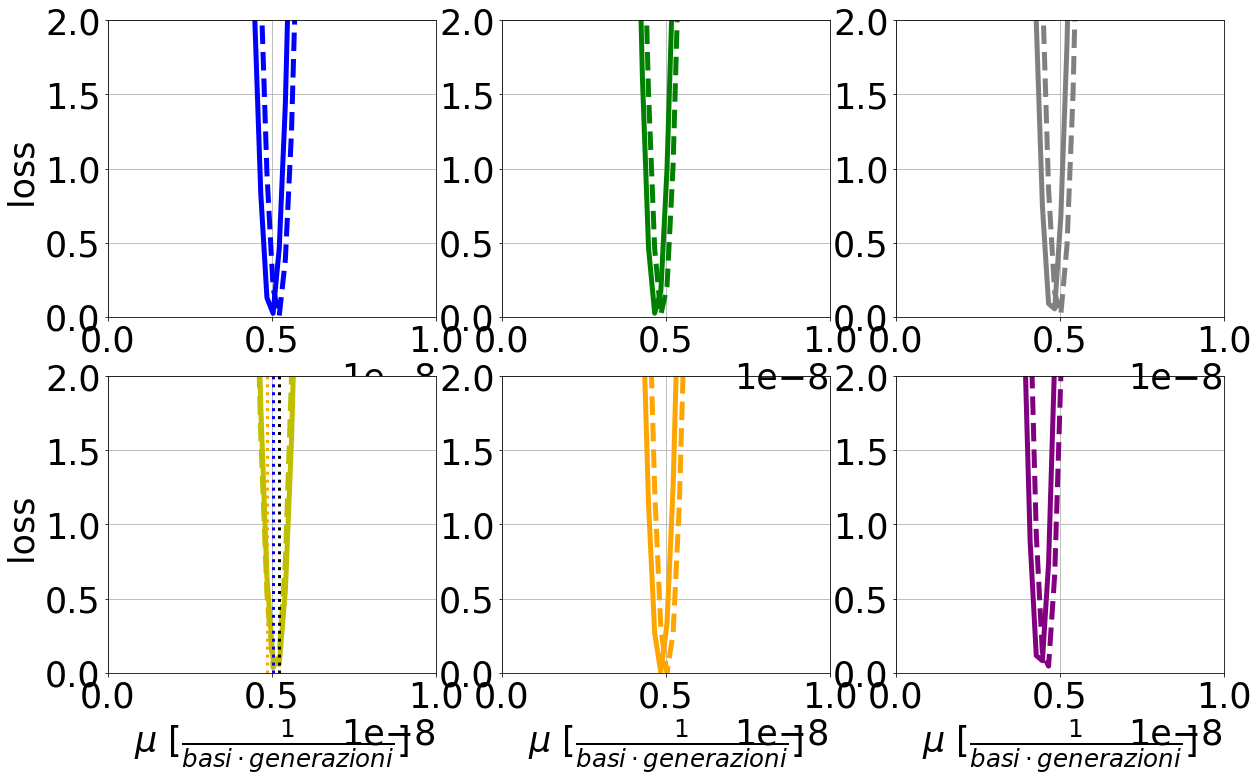

In [80]:
rami_err= np.loadtxt("C:../es_new/LC_CRC0282_7.txt", unpack='true')
mut=np.loadtxt("C:../es_new/mut_LC_CRC0282_7.txt", unpack='true')
mut_56=np.loadtxt("C:../es_new/mut_LC_CRC0282_7_Pa_0.56.txt", unpack='true')
mut_58=np.loadtxt("C:../es_new/mut_LC_CRC0282_7_Pa_0.58.txt", unpack='true')
mut_57=np.loadtxt("C:../es_new/mut_LC_CRC0282_7_Pa_0.57.txt", unpack='true')
mut_54=np.loadtxt("C:../es_new/mut_LC_CRC0282_7_Pa_0.59.txt", unpack='true')
mut_55=np.loadtxt("C:../es_new/mut_LC_CRC0282_7_Pa_0.55.txt", unpack='true')

datia=np.array([1657,1913,798,755,1446,1441,1203,1674,1392,1428,1418,1138,894])
datid=np.array([1418,1918,1657,621,1657,1674,1418,1392,1418,1446,1657,1441,377,605,1859,1913,621,536,1918,1823,1392,1371,1674,1409])
datie=np.array([871,371,871,854,871,843,615,387,371,456,854,875])
datif=np.array([2289,2528,2279,992,2246,2284])

n1=50
n_tr=1000

mu=9.17132E-09
x=np.linspace(mu*0.1,mu*0.1+(50*mu*0.02), 50)
print(x)
mu_mean=1.44585E-9
matr_a=np.zeros((n1,2))
mu_rate(matr_a, n1, mut[0] )
matr_d=np.zeros((n1,2))
mu_rate(matr_d, n1, mut[3] )
matr_e=np.zeros((n1,2))
mu_rate(matr_e, n1, mut[4] )

matr_a_58=np.zeros((n1,2))
mu_rate(matr_a_58, n1, mut_58[0] )
matr_d_58=np.zeros((n1,2))
mu_rate(matr_d_58, n1, mut_58[3] )
matr_e_58=np.zeros((n1,2))
mu_rate(matr_e_58, n1, mut_58[4] )


matr_a_68=np.zeros((n1,2))
mu_rate(matr_a_68, n1, mut_55[0] )
matr_d_68=np.zeros((n1,2))
mu_rate(matr_d_68, n1, mut_55[3] )
matr_e_68=np.zeros((n1,2))
mu_rate(matr_e_68, n1, mut_55[4] )

matr_a_6=np.zeros((n1,2))
mu_rate(matr_a_6, n1, mut_54[0] )
matr_d_6=np.zeros((n1,2))
mu_rate(matr_d_6, n1, mut_54[3] )
matr_e_6=np.zeros((n1,2))
mu_rate(matr_e_6, n1, mut_54[4] )


matr_a_56=np.zeros((n1,2))
mu_rate(matr_a_56, n1, mut_56[0] )
matr_d_56=np.zeros((n1,2))
mu_rate(matr_d_56, n1, mut_56[3] )
matr_e_56=np.zeros((n1,2))
mu_rate(matr_e_56, n1, mut_56[4] )

matr_a_57=np.zeros((n1,2))
mu_rate(matr_a_57, n1, mut_57[0] )
matr_d_57=np.zeros((n1,2))
mu_rate(matr_d_57, n1, mut_57[3] )
matr_e_57=np.zeros((n1,2))
mu_rate(matr_e_57, n1, mut_57[4] )

fig = plt.figure(figsize=(20, 12))
plt.subplot(2,3, 1)
plt.plot(x, np.power((matr_a[:,0]-np.mean(datia))/np.sqrt(((np.power(matr_a[:,1],2)/n_tr) + (np.power(np.std(datia),2)/len(datia)) )),2), linestyle="solid",  color='b',  linewidth=5.0)
plt.plot(x, np.power((matr_d[:,0]-np.mean(datid))/np.sqrt(((np.power(matr_d[:,1],2)/n_tr) + (np.power(np.std(datid),2)/len(datid)) )),2),  linestyle="--",  color='b', linewidth=5.0)
plt.ylim(0, 2)
plt.ylabel(r'loss ')
plt.grid(True)
plt.xlim(0, 10E-9)

plt.subplot(2,3, 4)
plt.plot(x, np.power((matr_a_58[:,0]-np.mean(datia))/np.sqrt(((np.power(matr_a_58[:,1],2)/n_tr) + (np.power(np.std(datia),2)/len(datia)))),2),  linestyle="solid", color='y',  linewidth=5.0)
plt.plot(x, np.power((matr_d_58[:,0]-np.mean(datid))/np.sqrt(((np.power(matr_d_58[:,1],2)/n_tr) + (np.power(np.std(datid),2)/len(datid)) )),2),  linestyle="--", color='y', linewidth=5.0)
plt.axvline(x=4.84769771e-09  , color= 'orange', linewidth=3.0,linestyle='dotted')
plt.axvline(x= 5.03486751e-09, color= 'b', linewidth=3.0,linestyle='dotted')
plt.axvline(x= 5.22203731e-09, color= 'black', linewidth=3.0,linestyle='dotted')

  
plt.ylim(0, 2)
plt.grid(True)
plt.xlim(0, 10E-9)
plt.ylabel(r'loss ')
plt.xlabel(r'$\mu$ $[\frac{1}{basi \cdot generazioni}]$')
plt.subplot(2,3, 6)
plt.plot(x, np.power((matr_a_68[:,0]-np.mean(datia))/np.sqrt(((np.power(matr_a_68[:,1],2)/n_tr) + (np.power(np.std(datia),2)/len(datia)))) ,2),  linestyle="solid", color='purple',  linewidth=5.0)
plt.plot(x, np.power((matr_d_68[:,0]-np.mean(datid))/np.sqrt(((np.power(matr_d_68[:,1],2)/n_tr) + (np.power(np.std(datid),2)/len(datid)) )),2),  linestyle="--", color='purple', linewidth=5.0)
plt.ylim(0, 2)
plt.xlabel(r'$\mu$ $[\frac{1}{basi \cdot generazioni}]$')
plt.grid(True)
plt.xlim(0, 10E-9)

plt.subplot(2,3, 5)
plt.plot(x, np.power((matr_a_6[:,0]-np.mean(datia))/np.sqrt(((np.power(matr_a_6[:,1],2)/n_tr) + (np.power(np.std(datia),2)/len(datia)))) ,2),  linestyle="solid", color='orange',  linewidth=5.0)
plt.plot(x, np.power((matr_d_6[:,0]-np.mean(datid))/np.sqrt(((np.power(matr_d_6[:,1],2)/n_tr) + (np.power(np.std(datid),2)/len(datid)) )),2),  linestyle="--", color='orange', linewidth=5.0)
plt.xlabel(r'$\mu$ $[\frac{1}{basi \cdot generazioni}]$')


plt.ylim(0, 2)
plt.grid(True)
plt.xlim(0, 10E-9)

plt.subplot(2,3, 2)
plt.plot(x, np.power((matr_a_56[:,0]-np.mean(datia))/np.sqrt(((np.power(matr_a_56[:,1],2)/n_tr) + (np.power(np.std(datia),2)/len(datia)))) ,2),  linestyle="solid", color='g',  linewidth=5.0)
plt.plot(x, np.power((matr_d_56[:,0]-np.mean(datid))/np.sqrt(((np.power(matr_d_56[:,1],2)/n_tr) + (np.power(np.std(datid),2)/len(datid)) )),2), linestyle="--", color='g', linewidth=5.0)


plt.grid(True)
plt.ylim(0, 2)
plt.xlim(0, 10E-9)

plt.subplot(2,3, 3)   
plt.plot(x, np.power((matr_a_57[:,0]-np.mean(datia))/np.sqrt(((np.power(matr_a_57[:,1],2)/n_tr) + (np.power(np.std(datia),2)/len(datia)))),2) ,  linestyle="solid", color='grey',  linewidth=5.0)
plt.plot(x, np.power((matr_d_57[:,0]-np.mean(datid))/np.sqrt(((np.power(matr_d_57[:,1],2)/n_tr) + (np.power(np.std(datid),2)/len(datid)) )),2),  linestyle="--", color='grey',  linewidth=5.0)


plt.grid(True) 
plt.ylim(0, 2)
plt.xlim(0, 10E-9)


# CONCLUSIONI
## rate di mutazione ottenuto con lo stimatore standard, dai dati e con il modello 
Il primo grafico rappresenta il tasso di mutazione
$\mu_{standard}$ e $\mu_{private}$ . Il grafico a destra rappresenta $\mu_{finale}$  e $\mu_{private}$ . Le barre di errore indicano la
deviazione standard di $\mu_{standard}$  e $\mu_{private}$ e la semi distanza tra il valore massimo e quello minimo di
$\mu_{finale}$.


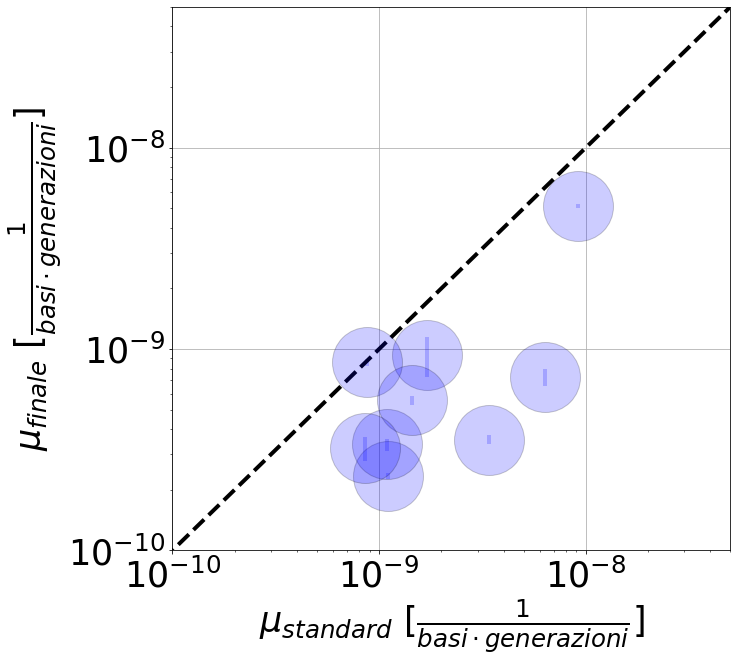

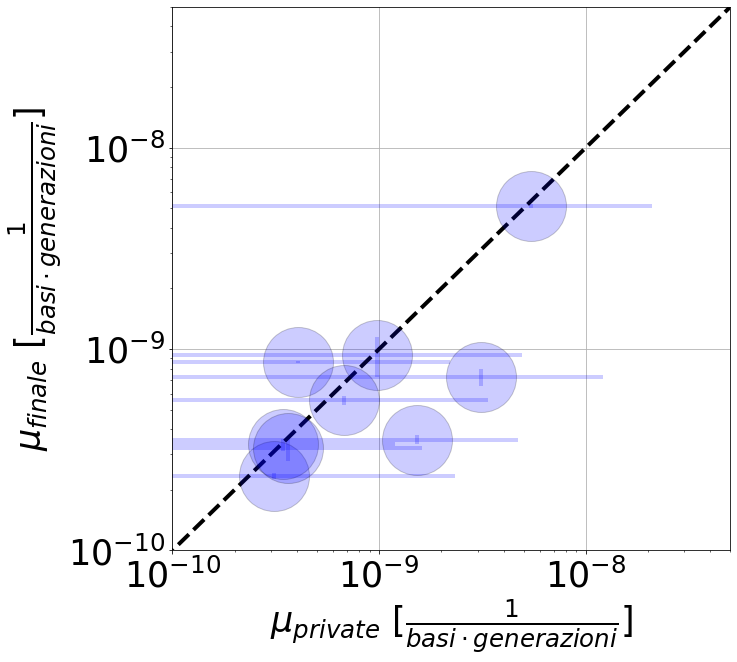

In [103]:
ngen=20
ngen0=65
nalb=6
durata=ngen0+(ngen*nalb)
N_b=5595688850
n=5
n_tr=1000
plt.rcParams.update({'font.size': 35})
rami_err= np.loadtxt("C:../es_new/CRC0441_7.txt", unpack='true')
mutazioni= np.loadtxt("C:../es_new/mut_CRC0441_7.txt", unpack='true')
rami_err_5= np.loadtxt("C:../es_new/CRC0441.txt", unpack='true')
mutazioni_5= np.loadtxt("C:../es_new/mut_CRC0441.txt", unpack='true')
rami_err_15= np.loadtxt("C:../es_new/CRC1502.txt", unpack='true')
mutazioni_15= np.loadtxt("C:../es_new/mut_CRC1502.txt", unpack='true')
rami_err_27= np.loadtxt("C:../es_new/CRC0327.txt", unpack='true')
mutazioni_27= np.loadtxt("C:../es_new/mut_CRC0327.txt", unpack='true')
rami_err_LM= np.loadtxt("C:../es_new/CRC1599LM.txt", unpack='true')
mutazioni_LM= np.loadtxt("C:../es_new/mut_CRC1599LM.txt", unpack='true')
rami_err_PR= np.loadtxt("C:../es_new/CRC1599PR.txt", unpack='true')
mutazioni_PR= np.loadtxt("C:../es_new/mut_CRC1599PR.txt", unpack='true')
rami_err_07= np.loadtxt("C:../es_new/CRC1307.txt", unpack='true')
mutazioni_07= np.loadtxt("C:../es_new/mut_CRC1307.txt", unpack='true')
rami_err_82= np.loadtxt("C:../es_new/CRC0282.txt", unpack='true')
mutazioni_82= np.loadtxt("C:../es_new/mut_CRC0282.txt", unpack='true')
rami_err_82_7= np.loadtxt("C:../es_new/CRC0282.txt", unpack='true')
mutazioni_82_7= np.loadtxt("C:../es_new/mut_CRC0282_7.txt", unpack='true')

#print(rami_err[0,:])
mu_arr=np.array([1.10482E-9, 1.09435E-09, 1.70859E-09, 8.7505E-10, 1.44585E-09, 8.57421E-10, 3.39448E-09, 6.33828E-09, 9.17132E-09])
x=np.linspace(0.52,0.54, 5)
mu_arr_pr=np.array([ 3.1179268E-10, 3.440307E-10, 9.7963396E-10, 4.037607E-10, 
                    6.77304E-10, 3.62274E-10, 1.52792E-09,3.127846988E-09, 5.40560194E-09])


datia=np.array([558,432])
datid=np.array([527,549,626,522])
datie=np.array([1548,1526])
datif=np.array([2174,2048,2075])

datia_5=np.array([457,433])
datid_5=np.array([489,484,561,532])
datie_5=np.array([1155,1160])
datif_5=np.array([1716,1692,1644])

datia_15=np.array([1503,2032,1529,1893,1369,1619,1081,1283])
datid_15=np.array([2136,2618,1775,1728,2206,2119,2318,2595,2950,2801,2945,2043,2960,2976,2486,2300])
datie_15=np.array([2661,2708,1651,1738,611,616,705,689])
datif_15=np.array([4797,4436,5326,3969,3857,4333,3561,3412,3662,3191,3665,2989])

datia_27=np.array([518,570,439,759,841,1048])
datid_27=np.array([746,704,619,629,914,833,884,1123,1161,879,1101,1176])
datie_27=np.array([1052,1094,974,1055,887,1169])
datif_27=np.array([1671,1798,1723,1858,1888,2178,2063,2048,2270])

datia_LM=np.array([1332,1506,898,696])
datid_LM=np.array([796,914,1412,1704,1396,1367,1160,1391])
datie_LM=np.array([1905,1787,1273,1302])
datif_LM=np.array([2701,3317,3491,2664,2669,2462])

datia_PR=np.array([259,274,124,83])
datid_PR=np.array([241,237,383,372,355,359,124,161])
datie_PR=np.array([398,402,281,285])
datif_PR=np.array([639,770,785,446,405,640])

datia_07=np.array([993,912,1996,944,641,697])
datid_07=np.array([1024,953,1772,1762,2653,1574,1588,1561,943,910,880,903])
datie_07=np.array([1657,1647,1224,1251,1676,1709])
datif_07=np.array([2681,2600,3419,3877,2825,2812,2619,2556,2612])


datia_82=np.array([5007,4393,1262,1240,1124,1307])
datid_82=np.array([6133,6214,4802,5335,1647,1634,1386,1351,1582,1581,1554,1370])
datie_82=np.array([10661,10580,2543,2556,2617,2618])
datif_82=np.array([3929,4190,4199,4171,3988,15996,16794,15382])

datia_82_7=np.array([1657,1913,798,755,1446,1441,1203,1674,1392,1428,1418,1138,894])
datid_82_7=np.array([1418,1918,1657,621,1657,1674,1418,1392,1418,1446,1657,1441,377,605,1859,1913,621,536,1918,1823,1392,1371,1674,1409])
datie_82_7=np.array([871,371,871,854,871,843,615,387,371,456,854,875])
datif_82_7=np.array([2289,2528,2279,992,2246,2284])

#for i in range(n):
   # print(i, std_rami_err[0,i])
mut_totali=2099
N_m=5595688850
N_b_15=5316401584
N_b_27=5072406807
N_b_LM=4818048167
N_b_PR=2495801608
N_b_07=4600467279
N_b_82=2748711013
N_b_82_7=820828872.5
z=70
x1=np.linspace(0,10,3)
mu=mut_totali/(N_m*(115+(7*32)))
mu_arr_max=np.array([2.43227590e-10, 3.58502816e-10, 1.14719614e-09, 8.93648816e-10 ,5.87192143e-10, 3.65716304e-10 ,
                     3.73235612e-10 , 7.98504306e-10 ,5.22203731e-09,])
mu_arr_min=np.array([2.25729202e-10, 3.13408122e-10, 7.28765939e-10, 8.24373714e-10 ,5.28177857e-10,2.78224365e-10,
                     3.37519286e-10  , 6.59027571e-10 ,5.03486751e-09,])    

fig = plt.figure(figsize=(10, 10))

plt.axhline(y=0, color='red', linestyle='dotted',linewidth=4 )
plt.errorbar( mu_arr[0],  (mu_arr_max[0]+mu_arr_min[0])*0.5,
              yerr=(mu_arr_max[0]-mu_arr_min[0])*0.5,  
             xerr=np.std(np.mean(datif)/np.mean(rami_err[0]+rami_err[3]*N_b)),
             linestyle="None", color="b",elinewidth=4, marker='o',mec='black', alpha=0.2, ms=z, mew=1)
plt.errorbar(  mu_arr[1], (mu_arr_max[1]+mu_arr_min[1])*0.5,
              yerr=(mu_arr_max[1]-mu_arr_min[1])*0.5,
                 xerr=np.std(np.mean(datif_5)/np.mean(rami_err_5[0]+rami_err_5[3]*N_b)),
             linestyle="None", color="b",elinewidth=4, marker='o',mec='black', alpha=0.2, ms=z, mew=1)

plt.errorbar(mu_arr[2], (mu_arr_max[2]+mu_arr_min[2])*0.5,
              yerr=(mu_arr_max[2]-mu_arr_min[2])*0.5,
                 xerr=np.std(np.mean(datif_15)/np.mean(rami_err_15[0]+rami_err_15[3]*N_b_15)),
             linestyle="None", color="b",elinewidth=4, marker='o',mec='black', alpha=0.2, ms=z, mew=1)

plt.errorbar(mu_arr[3],  (mu_arr_max[3]+mu_arr_min[3])*0.5,
             yerr=(mu_arr_max[3]-mu_arr_min[3])*0.5,
                 xerr=np.std(np.mean(datif_27)/np.mean(rami_err_27[0]+rami_err_27[3]*N_b_27)),
             linestyle="None", color="b",elinewidth=4, marker='o',mec='black', alpha=0.2, ms=z, mew=1)
   
plt.errorbar( mu_arr[4], (mu_arr_max[4]+mu_arr_min[4])*0.5,
              yerr=(mu_arr_max[4]-mu_arr_min[4])*0.5,
                 xerr=np.std(np.mean(datif_LM)/np.mean(rami_err_LM[0]+rami_err_LM[3]*N_b_LM)),
             linestyle="None", color="b",elinewidth=4, marker='o',mec='black', alpha=0.2, ms=z, mew=1)

plt.errorbar(mu_arr[5],  (mu_arr_max[5]+mu_arr_min[5])*0.5,
              yerr=(mu_arr_max[5]-mu_arr_min[5])*0.5,
                 xerr=np.std(np.mean(datif_PR)/np.mean(rami_err_PR[0]+rami_err_PR[3]*N_b_PR)),
             linestyle="None", color="b",elinewidth=4, marker='o',mec='black', alpha=0.2, ms=z, mew=1)

plt.errorbar(mu_arr[6],  (mu_arr_max[6]+mu_arr_min[6])*0.5,
             yerr=(mu_arr_max[6]-mu_arr_min[6])*0.5,
                 xerr=np.std(np.mean(datif_07)/np.mean(rami_err_07[0]+rami_err_07[3]*N_b_07)),
             linestyle="None", color="b",elinewidth=4, marker='o',mec='black', alpha=0.2, ms=z, mew=1)

plt.errorbar(mu_arr[7],  (mu_arr_max[7]+mu_arr_min[7])*0.5,
              yerr=(mu_arr_max[7]-mu_arr_min[7])*0.5,
                 xerr=np.std(np.mean(datif_82)/np.mean(rami_err_82[0]+rami_err_82[3]*N_b_82)),
             linestyle="None", color="b",elinewidth=4, marker='o',mec='black', alpha=0.2, ms=z, mew=1)

plt.errorbar(mu_arr[8],  (mu_arr_max[8]+mu_arr_min[8])*0.5,
              yerr=(mu_arr_max[8]-mu_arr_min[8])*0.5,
                 xerr=np.std(np.mean(datif_82_7)/np.mean(rami_err_82_7[0]+rami_err_82_7[3]*N_b_82_7)),
             linestyle="None", color="b",elinewidth=4, marker='o',mec='black', alpha=0.2, ms=z, mew=1)

plt.plot(x1, x1,linestyle="--",color="black",linewidth=4)

plt.ylabel(r'$\mu_{finale} \  [\frac{1}{basi \cdot generazioni}]$')
plt.xlabel(r'$\mu_{standard} \ [\frac{1}{basi \cdot generazioni}]$')
plt.xscale('log')      
plt.yscale('log')   
plt.grid(True)   


    
    
plt.ylim(1E-10,0.5E-7)
plt.xlim(1E-10, 0.5E-7)

plt.errorbar(10, 10, 
             yerr=0,xerr=0,
             linestyle="None", color="green",elinewidth=4, marker='o',mec='black', alpha=0.5, ms=40, mew=1, label=r'da mutazioni private di $N_{cell}-1$ cellule')

fig = plt.figure(figsize=(10, 10))
plt.axhline(y=0, color='red', linestyle='dotted',linewidth=4 )
plt.errorbar( mu_arr_pr[0], (mu_arr_max[0]+mu_arr_min[0])*0.5,
             xerr=np.std(np.mean(datia)/((rami_err[0]+rami_err[3])*N_b*2))+np.std(np.mean(datid)/((rami_err[0]+rami_err[3])*N_b*2)),
                 yerr=(mu_arr_max[0]-mu_arr_min[0])*0.5,
             linestyle="None", color="b",elinewidth=4, marker='o',mec='black', alpha=0.2, ms=z, mew=1)
plt.errorbar( mu_arr_pr[1], (mu_arr_max[1]+mu_arr_min[1])*0.5,
             xerr=np.std(np.mean(datia_5)/((rami_err_5[0]+rami_err_5[3])*N_b*2))+np.std(np.mean(datid_5)/((rami_err_5[0]+rami_err_5[3])*N_b*2)),
                 yerr=(mu_arr_max[1]-mu_arr_min[1])*0.5,
             linestyle="None", color="b",elinewidth=4, marker='o',mec='black', alpha=0.2, ms=z, mew=1)

plt.errorbar( mu_arr_pr[2], (mu_arr_max[2]+mu_arr_min[2])*0.5,
             xerr=np.std(np.mean(datia_15)/((rami_err_15[0]+rami_err_15[3])*N_b_15*2))+np.std(np.mean(datid_15)/((rami_err_15[0]+rami_err_15[3])*N_b_15*2)),
                 yerr=(mu_arr_max[2]-mu_arr_min[2])*0.5,
             linestyle="None", color="b",elinewidth=4, marker='o',mec='black', alpha=0.2, ms=z, mew=1)

plt.errorbar( mu_arr_pr[3],(mu_arr_max[3]+mu_arr_min[3])*0.5,
             xerr=np.std(np.mean(datia_27)/((rami_err_27[0]+rami_err_27[3])*N_b_27*2))+np.std(np.mean(datid_27)/((rami_err_27[0]+rami_err_27[3])*N_b_27*2)),
                 yerr=(mu_arr_max[0]-mu_arr_min[0])*0.5,
             linestyle="None", color="b",elinewidth=4, marker='o',mec='black', alpha=0.2, ms=z, mew=1)
   

plt.errorbar( mu_arr_pr[4], (mu_arr_max[4]+mu_arr_min[4])*0.5,
             xerr=np.std(np.mean(datia_LM)/((rami_err_LM[0]+rami_err_LM[3])*N_b_LM*2))+np.std(np.mean(datid_LM)/((rami_err_LM[0]+rami_err_LM[3])*N_b_LM*2)),
                 yerr=(mu_arr_max[4]-mu_arr_min[4])*0.5,
             linestyle="None", color="b",elinewidth=4, marker='o',mec='black', alpha=0.2, ms=z, mew=1)

plt.errorbar(mu_arr_pr[5],(mu_arr_max[5]+mu_arr_min[5])*0.5,
             xerr=np.std(np.mean(datia_PR)/((rami_err_PR[0]+rami_err_PR[3])*N_b_PR*2))+np.std(np.mean(datid_PR)/((rami_err_PR[0]+rami_err_PR[3])*N_b_PR*2)),
                 yerr=(mu_arr_max[5]-mu_arr_min[5])*0.5,
             linestyle="None", color="b",elinewidth=4, marker='o',mec='black', alpha=0.2, ms=z, mew=1)

plt.errorbar( mu_arr_pr[6],(mu_arr_max[6]+mu_arr_min[6])*0.5,
             xerr=np.std(np.mean(datia_07)/((rami_err_07[0]+rami_err_07[3])*N_b_07*2))+np.std(np.mean(datid_07)/((rami_err_07[0]+rami_err_07[3])*N_b_07*2)),
                 yerr=(mu_arr_max[6]-mu_arr_min[6])*0.5,
             linestyle="None", color="b",elinewidth=4, marker='o',mec='black', alpha=0.2, ms=z, mew=1)

plt.errorbar( mu_arr_pr[7],(mu_arr_max[7]+mu_arr_min[7])*0.5,
             xerr=np.std(np.mean(datia_82)/((rami_err_82[0]+rami_err_82[3])*N_b_82*2))+np.std(np.mean(datid_82)/((rami_err_82[0]+rami_err_82[3])*N_b_82*2)),
                 yerr=(mu_arr_max[7]-mu_arr_min[7])*0.5,
             linestyle="None", color="b",elinewidth=4, marker='o',mec='black', alpha=0.2, ms=z, mew=1)

plt.errorbar( mu_arr_pr[8],(mu_arr_max[8]+mu_arr_min[8])*0.5,
             xerr=np.std(np.mean(datia_82_7)/((rami_err_82_7[0]+rami_err_82_7[3])*N_b_82_7*2))+np.std(np.mean(datid_82_7)/((rami_err_82_7[0]+rami_err_82_7[3])*N_b_82_7*2)),
                 yerr=(mu_arr_max[8]-mu_arr_min[8])*0.5,
             linestyle="None", color="b",elinewidth=4, marker='o',mec='black', alpha=0.2, ms=z, mew=1)

plt.plot(x1, x1,linestyle="--",color="black",linewidth=4)

plt.ylim(1E-10,0.5E-7)
plt.xlim(1E-10, 0.5E-7)
plt.yscale('log') 
plt.xscale('log') 
plt.xlabel(r'$\mu_{private} \  [\frac{1}{basi \cdot generazioni}]$')
plt.ylabel(r'$\mu_{finale} \ [\frac{1}{basi \cdot generazioni}]$')

#plt.ylim(0.8E-9,1.45E-9)  
plt.grid(True)
#plt.legend(bbox_to_anchor=(-1.2, 0.7), loc="lower left")
